In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import numpy as np
import os
import pickle
import random
import matplotlib.pyplot as plt
import time

import importlib
import utils.ml_utils as ml_utils

## Init seeds and env variables (makes training deterministic)

In [2]:
ml_utils.init_env()

## Try different batch sizes

Let's first start off testing two batch sizes - small (32) and large (256). We would expect the large batch size to achieve similar training loss but poorer validation loss. This generalization gap is described in https://arxiv.org/pdf/1609.04836.pdf. We would also expect the large batch size to train somewhat faster.

In [21]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_1 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model()
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/batch_size_{}_best_weights_trial_1.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_1[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/1000
    582/Unknown - 25s 43ms/step - loss: 0.6860 - accuracy: 0.5435
Saving weights for epoch 0

Epoch 00001: val_loss improved from inf to 0.66267, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 31s 54ms/step - loss: 0.6860 - accuracy: 0.5435 - val_loss: 0.6627 - val_accuracy: 0.6279
Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5153
Epoch 00002: val_loss did not improve from 0.66267
582/582 [==============================] - 13s 22ms/step - loss: 0.6911 - accuracy: 0.5155 - val_loss: 0.6928 - val_accuracy: 0.5099
Epoch 3/1000
580/5

Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4307 - accuracy: 0.7961
Epoch 00025: val_loss did not improve from 0.43554
582/582 [==============================] - 13s 22ms/step - loss: 0.4307 - accuracy: 0.7961 - val_loss: 0.4403 - val_accuracy: 0.7865
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4248 - accuracy: 0.8017
Saving weights for epoch 25

Epoch 00026: val_loss did not improve from 0.43554
582/582 [==============================] - 13s 22ms/step - loss: 0.4252 - accuracy: 0.8015 - val_loss: 0.4356 - val_accuracy: 0.7913
Epoch 27/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.8078
Epoch 00027: val_loss improved from 0.43554 to 0.41058, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 13s 22ms/step - loss: 0.4189 - accuracy: 0.8077 - val_loss: 0.4106 - val_accuracy: 0.8072
Epoch 28/1000
580/582 [========================

Epoch 52/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.8495
Epoch 00052: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.3731 - val_accuracy: 0.8265
Epoch 53/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8559
Epoch 00053: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3283 - accuracy: 0.8558 - val_loss: 0.3992 - val_accuracy: 0.8132
Epoch 54/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8540
Epoch 00054: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3260 - accuracy: 0.8539 - val_loss: 0.3845 - val_accuracy: 0.8194
Epoch 55/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3281 - accuracy: 0.8551
Epoch 00055: val_loss did not improve from 0.36908
5

Epoch 81/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8852
Saving weights for epoch 80

Epoch 00081: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2687 - accuracy: 0.8852 - val_loss: 0.4812 - val_accuracy: 0.7915
Epoch 82/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8803
Epoch 00082: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2802 - accuracy: 0.8802 - val_loss: 0.3905 - val_accuracy: 0.8222
Epoch 83/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2725 - accuracy: 0.8825
Epoch 00083: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2728 - accuracy: 0.8823 - val_loss: 0.4001 - val_accuracy: 0.8156
Epoch 84/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8805
Epoch 00084: val_loss d

580/582 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9155
Epoch 00137: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2106 - accuracy: 0.9155 - val_loss: 0.4696 - val_accuracy: 0.8031
Epoch 138/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9107
Epoch 00138: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2137 - accuracy: 0.9107 - val_loss: 0.4039 - val_accuracy: 0.8173
Epoch 139/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9121
Epoch 00139: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2140 - accuracy: 0.9122 - val_loss: 0.4210 - val_accuracy: 0.8149
Epoch 140/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9140
Epoch 00140: val_loss did not improve from 0.36908
582/582 [===

Epoch 14/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6205 - accuracy: 0.6528
Epoch 00014: val_loss did not improve from 0.63980
73/73 [==============================] - 8s 105ms/step - loss: 0.6209 - accuracy: 0.6521 - val_loss: 0.6407 - val_accuracy: 0.6232
Epoch 15/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6169 - accuracy: 0.6560
Epoch 00015: val_loss improved from 0.63980 to 0.63811, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6175 - accuracy: 0.6551 - val_loss: 0.6381 - val_accuracy: 0.6311
Epoch 16/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6066 - accuracy: 0.6699
Saving weights for epoch 15

Epoch 00016: val_loss improved from 0.63811 to 0.62297, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6066 - accuracy: 0.6699 - val_loss: 0.6230 - val

Epoch 39/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.7708
Epoch 00039: val_loss did not improve from 0.46267
73/73 [==============================] - 8s 106ms/step - loss: 0.4767 - accuracy: 0.7706 - val_loss: 0.4737 - val_accuracy: 0.7668
Epoch 40/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.7688
Epoch 00040: val_loss improved from 0.46267 to 0.45228, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.4771 - accuracy: 0.7686 - val_loss: 0.4523 - val_accuracy: 0.7855
Epoch 41/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.7729
Saving weights for epoch 40

Epoch 00041: val_loss did not improve from 0.45228
73/73 [==============================] - 8s 105ms/step - loss: 0.4723 - accuracy: 0.7728 - val_loss: 0.4632 - val_accuracy: 0.7764
Epoch 42/1000
72/73 [============================>.] - ETA

Epoch 65/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.8109
Epoch 00065: val_loss did not improve from 0.38912
73/73 [==============================] - 8s 106ms/step - loss: 0.4072 - accuracy: 0.8112 - val_loss: 0.4063 - val_accuracy: 0.8085
Epoch 66/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3995 - accuracy: 0.8136
Saving weights for epoch 65

Epoch 00066: val_loss improved from 0.38912 to 0.38887, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3999 - accuracy: 0.8136 - val_loss: 0.3889 - val_accuracy: 0.8194
Epoch 67/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3971 - accuracy: 0.8189
Epoch 00067: val_loss improved from 0.38887 to 0.38125, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3968 - accuracy: 0.8186 - val_loss: 0.3813 - val

Epoch 93/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8364
Epoch 00093: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 105ms/step - loss: 0.3609 - accuracy: 0.8363 - val_loss: 0.3892 - val_accuracy: 0.8196
Epoch 94/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8412
Epoch 00094: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 105ms/step - loss: 0.3534 - accuracy: 0.8416 - val_loss: 0.3842 - val_accuracy: 0.8207
Epoch 95/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3574 - accuracy: 0.8396
Epoch 00095: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 104ms/step - loss: 0.3573 - accuracy: 0.8395 - val_loss: 0.3750 - val_accuracy: 0.8267
Epoch 96/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8388
Saving weights for epoch 95

Epoch 00096: val_loss did not improve

Epoch 121/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8639
Saving weights for epoch 120

Epoch 00121: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.3103 - accuracy: 0.8638 - val_loss: 0.3673 - val_accuracy: 0.8358
Epoch 122/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8598
Epoch 00122: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 104ms/step - loss: 0.3143 - accuracy: 0.8595 - val_loss: 0.4005 - val_accuracy: 0.8123
Epoch 123/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3223 - accuracy: 0.8559
Epoch 00123: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.3223 - accuracy: 0.8560 - val_loss: 0.3604 - val_accuracy: 0.8364
Epoch 124/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.8610
Epoch 00124: val_loss did not im

Epoch 150/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8773
Epoch 00150: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2797 - accuracy: 0.8774 - val_loss: 0.3724 - val_accuracy: 0.8293
Epoch 151/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.8792
Saving weights for epoch 150

Epoch 00151: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2779 - accuracy: 0.8793 - val_loss: 0.3671 - val_accuracy: 0.8321
Epoch 152/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.8864
Epoch 00152: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2664 - accuracy: 0.8867 - val_loss: 0.3967 - val_accuracy: 0.8259
Epoch 153/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2740 - accuracy: 0.8802
Epoch 00153: val_loss did not im

Epoch 179/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8970
Epoch 00179: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2424 - accuracy: 0.8972 - val_loss: 0.3812 - val_accuracy: 0.8366
Epoch 180/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.8990
Epoch 00180: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 106ms/step - loss: 0.2395 - accuracy: 0.8993 - val_loss: 0.3691 - val_accuracy: 0.8368
Epoch 181/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9035
Saving weights for epoch 180

Epoch 00181: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2302 - accuracy: 0.9035 - val_loss: 0.3982 - val_accuracy: 0.8235
Epoch 182/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8984
Epoch 00182: val_loss did not im

Epoch 208/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9148
Epoch 00208: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2048 - accuracy: 0.9147 - val_loss: 0.3933 - val_accuracy: 0.8293
Epoch 209/1000
72/73 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9186
Epoch 00209: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.1967 - accuracy: 0.9191 - val_loss: 0.4282 - val_accuracy: 0.8276
Epoch 210/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9137
Epoch 00210: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2073 - accuracy: 0.9142 - val_loss: 0.3977 - val_accuracy: 0.8317
Epoch 211/1000
72/73 [============================>.] - ETA: 0s - loss: 0.1918 - accuracy: 0.9198
Saving weights for epoch 210

Epoch 00211: val_loss did not im

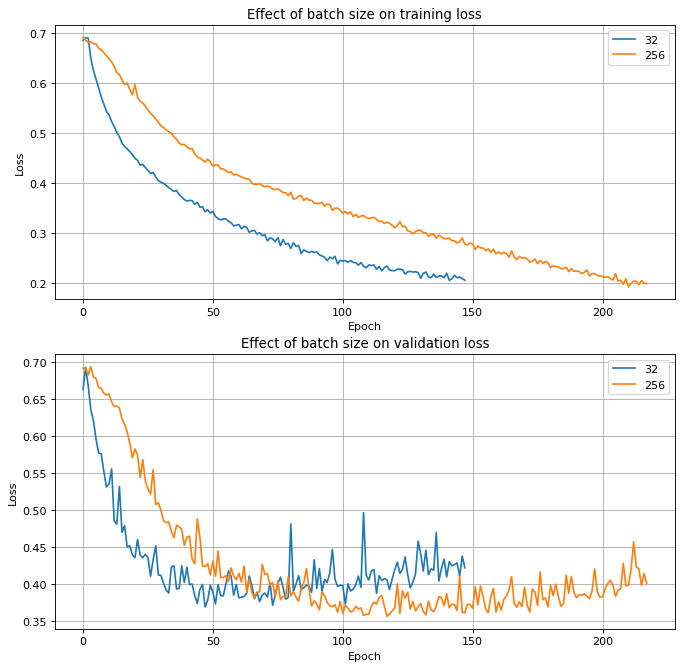

<Figure size 432x288 with 0 Axes>

In [22]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_loss_trial_1')

We see that indeed the large batch size trains faster (~8s vs ~13s). However, the larger batch size actually achieves a better validation loss than the small batch size! One possible cause is that the learning rate is too high - in general, the accepted rule of thumb is to scale learning rate linearly with batch size. Let's try a smaller learning rate and see.

But before we do that, let's also evaluate two claims made by the paper linked above:
1) Large batch size runs converge to weights that tend to be closer to the initial weights.
2) Large batch size runs find sharp minimizers (minima that vary sharply as you move away from them), whereas small batch sizes find flat minimizers.

In [ ]:
save_model_state(model_state_by_batch_size_trial_1, 'model_state_by_batch_size_trial_1')

In [23]:
model = ml_utils.build_model()
initial_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_32_best_weights_trial_1.h5')
batch_32_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_256_best_weights_trial_1.h5')
batch_256_weights = model.get_weights()

In [37]:
for i in range(len(initial_weights)):
    print("Parameter set:", i)
    print("\tDistance from batch 32 to initial: ", np.linalg.norm(batch_32_weights[i] - initial_weights[i]))
    print("\tDistance from batch 256 to initial: ", np.linalg.norm(batch_256_weights[i] - initial_weights[i]))

Parameter set: 0
	Distance from batch 32 to initial:  7.0809193
	Distance from batch 256 to initial:  4.9866548
Parameter set: 1
	Distance from batch 32 to initial:  1.2448872
	Distance from batch 256 to initial:  0.72424906
Parameter set: 2
	Distance from batch 32 to initial:  3.9699647
	Distance from batch 256 to initial:  3.505941
Parameter set: 3
	Distance from batch 32 to initial:  1.7034668
	Distance from batch 256 to initial:  0.6810975
Parameter set: 4
	Distance from batch 32 to initial:  6.8601875
	Distance from batch 256 to initial:  3.4972727
Parameter set: 5
	Distance from batch 32 to initial:  1.5244346
	Distance from batch 256 to initial:  0.7644117
Parameter set: 6
	Distance from batch 32 to initial:  8.274157
	Distance from batch 256 to initial:  4.067089
Parameter set: 7
	Distance from batch 32 to initial:  2.392697
	Distance from batch 256 to initial:  1.2040703
Parameter set: 8
	Distance from batch 32 to initial:  11.903623
	Distance from batch 256 to initial:  5.589

In [43]:
flattened_initial_weights = np.concatenate([x.flatten() for x in initial_weights])
flattened_32_weights = np.concatenate([x.flatten() for x in batch_32_weights])
flattened_256_weights = np.concatenate([x.flatten() for x in batch_256_weights])

In [45]:
print(
    "Distance from flattened batch 32 weights to initial weights: ",
    np.linalg.norm(flattened_32_weights - flattened_initial_weights)
)

Distance from flattened batch 32 weights to initial weights:  25.83745


In [46]:
print(
    "Distance from flattened batch 256 weights to initial weights: ",
    np.linalg.norm(flattened_256_weights - flattened_initial_weights)
)

Distance from flattened batch 256 weights to initial weights:  12.0583


We see that indeed, the larger batch size converged to weights that were closer to the initial weights (distance of 12 vs 25).

In [53]:
alpha_values = np.linspace(-1, 1.5, 20)
losses = []
for alpha in alpha_values:
    print("\nTesting alpha: ", alpha)
    target_weights = [batch_256_weights[i]*alpha + batch_32_weights[i]*(1-alpha) for i in range(len(batch_32_weights))]
    model.set_weights(target_weights)
    loss, accuracy = model.evaluate(validation)
    losses.append(loss)


Testing alpha:  -1.0
     19/Unknown - 1s 40ms/step - loss: 3.9624 - accuracy: 0.5969
Testing alpha:  -0.868421052631579
     19/Unknown - 1s 36ms/step - loss: 2.4595 - accuracy: 0.6101
Testing alpha:  -0.736842105263158
     19/Unknown - 1s 36ms/step - loss: 1.5223 - accuracy: 0.6305
Testing alpha:  -0.6052631578947368
     19/Unknown - 1s 36ms/step - loss: 0.9792 - accuracy: 0.6808
Testing alpha:  -0.4736842105263158
     19/Unknown - 1s 36ms/step - loss: 0.6811 - accuracy: 0.7330
Testing alpha:  -0.3421052631578948
     19/Unknown - 1s 37ms/step - loss: 0.5017 - accuracy: 0.7863
Testing alpha:  -0.21052631578947367
     19/Unknown - 1s 36ms/step - loss: 0.4040 - accuracy: 0.8201
Testing alpha:  -0.07894736842105265
     19/Unknown - 1s 36ms/step - loss: 0.3639 - accuracy: 0.8310
Testing alpha:  0.05263157894736836
     19/Unknown - 1s 37ms/step - loss: 0.3717 - accuracy: 0.8201
Testing alpha:  0.18421052631578938
     19/Unknown - 1s 36ms/step - loss: 0.4202 - accuracy: 0.8014
Test

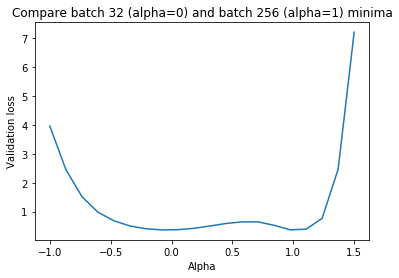

<Figure size 432x288 with 0 Axes>

In [57]:
plt.plot(alpha_values, losses)
plt.title("Compare batch 32 (alpha=0) and batch 256 (alpha=1) minima")
plt.xlabel("Alpha")
plt.ylabel("Validation loss")
plt.show()
plt.savefig('graphs/batch_size_alpha_trial_1')

Additionally, we observe that the large batch size found a sharp minimizer, as predicted by the paper. Compare the minimum for batch size 256 (alpha=1) and that of batch size 32 (alpha=0).

## Use smaller learning rate

Now, let's use a smaller learning rate and see if that resolves the weird behavior we observed previously (large batch size outperforming small one).

In [58]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_2 = {}
        
for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(0.02))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/batch_size_{}_best_weights_trial_2.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_2[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10000,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10000
    582/Unknown - 25s 43ms/step - loss: 0.6902 - accuracy: 0.5350
Saving weights for epoch 0

Epoch 00001: val_loss improved from inf to 0.68862, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 31s 54ms/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6886 - val_accuracy: 0.5202
Epoch 2/10000
580/582 [============================>.] - ETA: 0s - loss: 0.6795 - accuracy: 0.5776
Epoch 00002: val_loss improved from 0.68862 to 0.68747, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.6794 - 

Epoch 23/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.7781
Epoch 00023: val_loss improved from 0.45270 to 0.45264, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4635 - accuracy: 0.7779 - val_loss: 0.4526 - val_accuracy: 0.7893
Epoch 24/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4602 - accuracy: 0.7824
Epoch 00024: val_loss improved from 0.45264 to 0.44685, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4605 - accuracy: 0.7820 - val_loss: 0.4469 - val_accuracy: 0.7951
Epoch 25/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.7836
Epoch 00025: val_loss improved from 0.44685 to 0.44369, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step

Epoch 48/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8253
Epoch 00048: val_loss did not improve from 0.39124
582/582 [==============================] - 12s 21ms/step - loss: 0.3812 - accuracy: 0.8250 - val_loss: 0.3967 - val_accuracy: 0.8201
Epoch 49/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.8284
Epoch 00049: val_loss improved from 0.39124 to 0.38379, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3787 - accuracy: 0.8283 - val_loss: 0.3838 - val_accuracy: 0.8224
Epoch 50/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8310
Epoch 00050: val_loss improved from 0.38379 to 0.38313, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3729 - accuracy: 0.8310 - val_loss: 0.3831 - val_accuracy: 0.821

Epoch 102/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.8902
Epoch 00102: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2590 - accuracy: 0.8902 - val_loss: 0.3678 - val_accuracy: 0.8383
Epoch 103/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.8899
Epoch 00103: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2585 - accuracy: 0.8897 - val_loss: 0.3884 - val_accuracy: 0.8263
Epoch 104/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.8890
Epoch 00104: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2602 - accuracy: 0.8890 - val_loss: 0.3767 - val_accuracy: 0.8334
Epoch 105/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.8884
Epoch 00105: val_loss did not improve from 0

580/582 [============================>.] - ETA: 0s - loss: 0.1730 - accuracy: 0.9318
Epoch 00158: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1726 - accuracy: 0.9319 - val_loss: 0.4273 - val_accuracy: 0.8285
Epoch 159/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9314
Epoch 00159: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1702 - accuracy: 0.9314 - val_loss: 0.4357 - val_accuracy: 0.8293
Epoch 160/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.9279
Epoch 00160: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1769 - accuracy: 0.9277 - val_loss: 0.4142 - val_accuracy: 0.8291
Epoch 161/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9340
Saving weights for epoch 160

Epoch 00161: val_loss did not 

72/73 [============================>.] - ETA: 0s - loss: 0.6672 - accuracy: 0.5995
Epoch 00015: val_loss did not improve from 0.69264
73/73 [==============================] - 8s 104ms/step - loss: 0.6670 - accuracy: 0.6000 - val_loss: 0.6963 - val_accuracy: 0.5157
Epoch 16/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6642 - accuracy: 0.6045
Saving weights for epoch 15

Epoch 00016: val_loss improved from 0.69264 to 0.69188, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 104ms/step - loss: 0.6639 - accuracy: 0.6049 - val_loss: 0.6919 - val_accuracy: 0.5277
Epoch 17/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.6030
Epoch 00017: val_loss did not improve from 0.69188
73/73 [==============================] - 8s 105ms/step - loss: 0.6615 - accuracy: 0.6031 - val_loss: 0.7072 - val_accuracy: 0.5107
Epoch 18/10000
72/73 [============================>.] - ETA: 0s - loss

Epoch 40/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6357 - accuracy: 0.6321
Epoch 00040: val_loss did not improve from 0.63857
73/73 [==============================] - 8s 104ms/step - loss: 0.6357 - accuracy: 0.6322 - val_loss: 0.6422 - val_accuracy: 0.6195
Epoch 41/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6350 - accuracy: 0.6316
Saving weights for epoch 40

Epoch 00041: val_loss improved from 0.63857 to 0.63716, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 104ms/step - loss: 0.6349 - accuracy: 0.6318 - val_loss: 0.6372 - val_accuracy: 0.6262
Epoch 42/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6382
Epoch 00042: val_loss did not improve from 0.63716
73/73 [==============================] - 7s 102ms/step - loss: 0.6327 - accuracy: 0.6384 - val_loss: 0.6390 - val_accuracy: 0.6227
Epoch 43/10000
72/73 [============================>.] -

Epoch 67/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5774 - accuracy: 0.6937
Epoch 00067: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 104ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6296 - val_accuracy: 0.6279
Epoch 68/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.6969
Epoch 00068: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 105ms/step - loss: 0.5741 - accuracy: 0.6964 - val_loss: 0.6387 - val_accuracy: 0.6249
Epoch 69/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5738 - accuracy: 0.6949
Epoch 00069: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 105ms/step - loss: 0.5745 - accuracy: 0.6941 - val_loss: 0.6308 - val_accuracy: 0.6303
Epoch 70/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5716 - accuracy: 0.6934
Epoch 00070: val_loss did not improve from 0.61423
73/73 [====

Epoch 94/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7333
Epoch 00094: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 105ms/step - loss: 0.5311 - accuracy: 0.7329 - val_loss: 0.5588 - val_accuracy: 0.6928
Epoch 95/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7296
Epoch 00095: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 104ms/step - loss: 0.5321 - accuracy: 0.7292 - val_loss: 0.5617 - val_accuracy: 0.6933
Epoch 96/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7309
Saving weights for epoch 95

Epoch 00096: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 104ms/step - loss: 0.5318 - accuracy: 0.7303 - val_loss: 0.5827 - val_accuracy: 0.6791
Epoch 97/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.7341
Epoch 00097: val_loss did not imp

Epoch 149/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.7632
Epoch 00149: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 104ms/step - loss: 0.4885 - accuracy: 0.7626 - val_loss: 0.5038 - val_accuracy: 0.7446
Epoch 150/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7611
Epoch 00150: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 103ms/step - loss: 0.4868 - accuracy: 0.7608 - val_loss: 0.5185 - val_accuracy: 0.7289
Epoch 151/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.7660
Saving weights for epoch 150

Epoch 00151: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 103ms/step - loss: 0.4834 - accuracy: 0.7659 - val_loss: 0.5031 - val_accuracy: 0.7444
Epoch 152/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.7622
Epoch 00152: val_loss did no

Epoch 205/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4574 - accuracy: 0.7798
Epoch 00205: val_loss did not improve from 0.45063
73/73 [==============================] - 8s 104ms/step - loss: 0.4576 - accuracy: 0.7800 - val_loss: 0.4823 - val_accuracy: 0.7582
Epoch 206/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7817
Saving weights for epoch 205

Epoch 00206: val_loss improved from 0.45063 to 0.45034, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.4534 - accuracy: 0.7813 - val_loss: 0.4503 - val_accuracy: 0.7771
Epoch 207/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4561 - accuracy: 0.7829
Epoch 00207: val_loss did not improve from 0.45034
73/73 [==============================] - 8s 105ms/step - loss: 0.4566 - accuracy: 0.7829 - val_loss: 0.5213 - val_accuracy: 0.7311
Epoch 208/10000
72/73 [============================

Epoch 233/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.7935
Epoch 00233: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 105ms/step - loss: 0.4400 - accuracy: 0.7936 - val_loss: 0.4647 - val_accuracy: 0.7678
Epoch 234/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.7869
Epoch 00234: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 105ms/step - loss: 0.4454 - accuracy: 0.7872 - val_loss: 0.4659 - val_accuracy: 0.7661
Epoch 235/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4442 - accuracy: 0.7860
Epoch 00235: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 103ms/step - loss: 0.4447 - accuracy: 0.7856 - val_loss: 0.4479 - val_accuracy: 0.7820
Epoch 236/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7923
Saving weights for epoch 235

Epoch 00236: val_loss did no

72/73 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8059
Epoch 00288: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 104ms/step - loss: 0.4148 - accuracy: 0.8056 - val_loss: 0.4962 - val_accuracy: 0.7491
Epoch 289/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8028
Epoch 00289: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 105ms/step - loss: 0.4189 - accuracy: 0.8030 - val_loss: 0.4533 - val_accuracy: 0.7767
Epoch 290/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4215 - accuracy: 0.8043
Epoch 00290: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 104ms/step - loss: 0.4220 - accuracy: 0.8040 - val_loss: 0.4352 - val_accuracy: 0.7908
Epoch 291/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8018
Saving weights for epoch 290

Epoch 00291: val_loss did not improve from 0

Epoch 316/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4071 - accuracy: 0.8099
Saving weights for epoch 315

Epoch 00316: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4077 - accuracy: 0.8098 - val_loss: 0.4232 - val_accuracy: 0.7969
Epoch 317/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8070
Epoch 00317: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4131 - accuracy: 0.8069 - val_loss: 0.4230 - val_accuracy: 0.7960
Epoch 318/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8103
Epoch 00318: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4067 - accuracy: 0.8103 - val_loss: 0.4310 - val_accuracy: 0.7902
Epoch 319/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8083
Epoch 00319: val_loss did no

Epoch 344/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4022 - accuracy: 0.8123
Epoch 00344: val_loss did not improve from 0.40157
73/73 [==============================] - 7s 103ms/step - loss: 0.4030 - accuracy: 0.8119 - val_loss: 0.4064 - val_accuracy: 0.8132
Epoch 345/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3929 - accuracy: 0.8155
Epoch 00345: val_loss did not improve from 0.40157
73/73 [==============================] - 8s 103ms/step - loss: 0.3931 - accuracy: 0.8153 - val_loss: 0.4068 - val_accuracy: 0.8091
Epoch 346/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.8193
Saving weights for epoch 345

Epoch 00346: val_loss did not improve from 0.40157
73/73 [==============================] - 8s 105ms/step - loss: 0.3938 - accuracy: 0.8189 - val_loss: 0.4023 - val_accuracy: 0.8147
Epoch 347/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8134
Epoch 00347: val_loss improv

Epoch 372/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8204
Epoch 00372: val_loss improved from 0.39657 to 0.39076, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3887 - accuracy: 0.8202 - val_loss: 0.3908 - val_accuracy: 0.8188
Epoch 373/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8208
Epoch 00373: val_loss did not improve from 0.39076
73/73 [==============================] - 8s 103ms/step - loss: 0.3844 - accuracy: 0.8207 - val_loss: 0.4138 - val_accuracy: 0.8085
Epoch 374/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8206
Epoch 00374: val_loss did not improve from 0.39076
73/73 [==============================] - 8s 104ms/step - loss: 0.3873 - accuracy: 0.8205 - val_loss: 0.3972 - val_accuracy: 0.8186
Epoch 375/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3821 -

Epoch 400/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8293
Epoch 00400: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 104ms/step - loss: 0.3754 - accuracy: 0.8293 - val_loss: 0.4006 - val_accuracy: 0.8151
Epoch 401/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.8324
Saving weights for epoch 400

Epoch 00401: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3729 - accuracy: 0.8320 - val_loss: 0.3890 - val_accuracy: 0.8239
Epoch 402/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8290
Epoch 00402: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3729 - accuracy: 0.8289 - val_loss: 0.4020 - val_accuracy: 0.8149
Epoch 403/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3730 - accuracy: 0.8281
Epoch 00403: val_loss did no

Epoch 428/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8355
Epoch 00428: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3603 - accuracy: 0.8355 - val_loss: 0.3869 - val_accuracy: 0.8237
Epoch 429/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8354
Epoch 00429: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3612 - accuracy: 0.8356 - val_loss: 0.3982 - val_accuracy: 0.8175
Epoch 430/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8364
Epoch 00430: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 103ms/step - loss: 0.3609 - accuracy: 0.8363 - val_loss: 0.3991 - val_accuracy: 0.8164
Epoch 431/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8314
Saving weights for epoch 430

Epoch 00431: val_loss did no

Epoch 457/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8395
Epoch 00457: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3513 - accuracy: 0.8394 - val_loss: 0.3858 - val_accuracy: 0.8244
Epoch 458/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8430
Epoch 00458: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 105ms/step - loss: 0.3494 - accuracy: 0.8427 - val_loss: 0.3944 - val_accuracy: 0.8184
Epoch 459/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8427
Epoch 00459: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3517 - accuracy: 0.8428 - val_loss: 0.4100 - val_accuracy: 0.8091
Epoch 460/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3486 - accuracy: 0.8419
Epoch 00460: val_loss improved from 0.38433 to 0.38427, sa

Epoch 485/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8447
Epoch 00485: val_loss did not improve from 0.38008
73/73 [==============================] - 7s 103ms/step - loss: 0.3416 - accuracy: 0.8450 - val_loss: 0.3914 - val_accuracy: 0.8214
Epoch 486/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8441
Saving weights for epoch 485

Epoch 00486: val_loss did not improve from 0.38008
73/73 [==============================] - 8s 104ms/step - loss: 0.3412 - accuracy: 0.8442 - val_loss: 0.4228 - val_accuracy: 0.8003
Epoch 487/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3441 - accuracy: 0.8428
Epoch 00487: val_loss did not improve from 0.38008
73/73 [==============================] - 8s 104ms/step - loss: 0.3439 - accuracy: 0.8428 - val_loss: 0.3819 - val_accuracy: 0.8250
Epoch 488/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8477
Epoch 00488: val_loss did no

Epoch 542/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.8575
Epoch 00542: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 104ms/step - loss: 0.3208 - accuracy: 0.8574 - val_loss: 0.3888 - val_accuracy: 0.8186
Epoch 543/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8611
Epoch 00543: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3159 - accuracy: 0.8610 - val_loss: 0.3911 - val_accuracy: 0.8164
Epoch 544/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8614
Epoch 00544: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3142 - accuracy: 0.8612 - val_loss: 0.3861 - val_accuracy: 0.8181
Epoch 545/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.8614
Epoch 00545: val_loss did not improve from 0.37859
73/73 [

Epoch 571/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.8660
Saving weights for epoch 570

Epoch 00571: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3056 - accuracy: 0.8660 - val_loss: 0.4049 - val_accuracy: 0.8134
Epoch 572/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.8644
Epoch 00572: val_loss did not improve from 0.37859
73/73 [==============================] - 7s 103ms/step - loss: 0.3009 - accuracy: 0.8644 - val_loss: 0.3947 - val_accuracy: 0.8162
Epoch 573/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3051 - accuracy: 0.8649
Epoch 00573: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 103ms/step - loss: 0.3050 - accuracy: 0.8651 - val_loss: 0.4198 - val_accuracy: 0.8063
Epoch 574/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.8664
Epoch 00574: val_loss did no

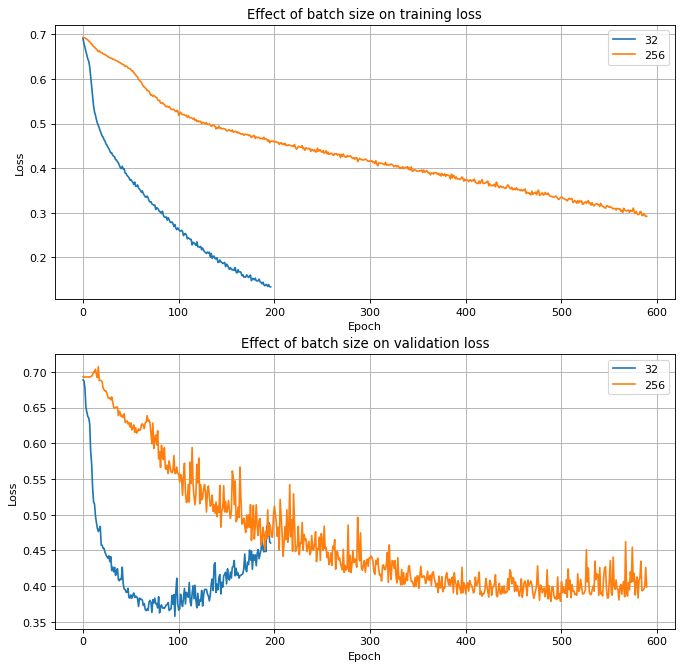

<Figure size 432x288 with 0 Axes>

In [59]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_2, 'batch size', 'batch_size_loss_trial_2')

We now observe that the small batch size outperforms the larger one. (Though, one could object by saying that the large batch size run didn't fully converge yet, seeing as it hasn't achieved the same training loss as the small one.)

Is it also true here that the large batch size finds weights close to initialization, and sharp minimizers?

In [ ]:
save_model_state(model_state_by_batch_size_trial_2, 'model_state_by_batch_size_trial_2')

In [82]:
model = ml_utils.build_model()
initial_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_32_best_weights_trial_2.h5')
batch_32_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_256_best_weights_trial_2.h5')
batch_256_weights = model.get_weights()

In [83]:
for i in range(len(initial_weights)):
    print("Parameter set:", i)
    print("\tDistance from batch 32 to initial: ", np.linalg.norm(batch_32_weights[i] - initial_weights[i]))
    print("\tDistance from batch 256 to initial: ", np.linalg.norm(batch_256_weights[i] - initial_weights[i]))

Parameter set: 0
	Distance from batch 32 to initial:  5.4449635
	Distance from batch 256 to initial:  3.971358
Parameter set: 1
	Distance from batch 32 to initial:  0.4515521
	Distance from batch 256 to initial:  0.6010699
Parameter set: 2
	Distance from batch 32 to initial:  3.6385295
	Distance from batch 256 to initial:  3.0198355
Parameter set: 3
	Distance from batch 32 to initial:  0.7692873
	Distance from batch 256 to initial:  0.37877738
Parameter set: 4
	Distance from batch 32 to initial:  3.9281173
	Distance from batch 256 to initial:  3.204115
Parameter set: 5
	Distance from batch 32 to initial:  0.8728317
	Distance from batch 256 to initial:  0.3926258
Parameter set: 6
	Distance from batch 32 to initial:  5.157456
	Distance from batch 256 to initial:  3.3155155
Parameter set: 7
	Distance from batch 32 to initial:  1.6288005
	Distance from batch 256 to initial:  0.80456364
Parameter set: 8
	Distance from batch 32 to initial:  7.22961
	Distance from batch 256 to initial:  4.524

In [85]:
flattened_initial_weights = np.concatenate([x.flatten() for x in initial_weights])
flattened_32_weights = np.concatenate([x.flatten() for x in batch_32_weights])
flattened_256_weights = np.concatenate([x.flatten() for x in batch_256_weights])

In [86]:
print(
    "Distance from flattened batch 32 weights to initial weights: ",
    np.linalg.norm(flattened_32_weights - flattened_initial_weights)
)

Distance from flattened batch 32 weights to initial weights:  15.1988735


In [87]:
print(
    "Distance from flattened batch 256 weights to initial weights: ",
    np.linalg.norm(flattened_256_weights - flattened_initial_weights)
)

Distance from flattened batch 256 weights to initial weights:  10.045458


In [90]:
alpha_values = np.linspace(-1, 2, 20)
losses = []
for alpha in alpha_values:
    print("\nTesting alpha: ", alpha)
    target_weights = [batch_256_weights[i]*alpha + batch_32_weights[i]*(1-alpha) for i in range(len(batch_32_weights))]
    model.set_weights(target_weights)
    loss, accuracy = model.evaluate(validation)
    losses.append(loss)


Testing alpha:  -1.0
     19/Unknown - 1s 40ms/step - loss: 4.2534 - accuracy: 0.5365
Testing alpha:  -0.8421052631578947
     19/Unknown - 1s 36ms/step - loss: 2.4581 - accuracy: 0.5815
Testing alpha:  -0.6842105263157895
     19/Unknown - 1s 36ms/step - loss: 1.3630 - accuracy: 0.6423
Testing alpha:  -0.5263157894736843
     19/Unknown - 1s 37ms/step - loss: 0.7839 - accuracy: 0.7259
Testing alpha:  -0.368421052631579
     19/Unknown - 1s 35ms/step - loss: 0.5164 - accuracy: 0.8012
Testing alpha:  -0.21052631578947367
     19/Unknown - 1s 36ms/step - loss: 0.4049 - accuracy: 0.8298
Testing alpha:  -0.052631578947368474
     19/Unknown - 1s 36ms/step - loss: 0.3587 - accuracy: 0.8435
Testing alpha:  0.10526315789473673
     19/Unknown - 1s 36ms/step - loss: 0.3571 - accuracy: 0.8375
Testing alpha:  0.26315789473684204
     19/Unknown - 1s 37ms/step - loss: 0.3916 - accuracy: 0.8175
Testing alpha:  0.42105263157894735
     19/Unknown - 1s 36ms/step - loss: 0.4421 - accuracy: 0.7939
Te

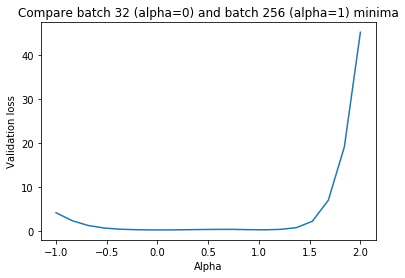

<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(alpha_values, losses)
plt.title("Compare batch 32 (alpha=0) and batch 256 (alpha=1) minima")
plt.xlabel("Alpha")
plt.ylabel("Validation loss")
plt.show()
plt.savefig('graphs/batch_size_alpha_trial_2')

We find that the large batch size still finds a solution closer to the initial weights, and that its minimizer is sharper than that of the small batch size.

**Conclusion so far**: Performance on batch size is sensitive to the learning rate. Lower learning rates are better for smaller batch sizes. Also, large batch sizes a) find solutions closer to the initial weights b) find sharp minimizers.

## Why do large batch sizes converge more slowly?

As we can see above, given the same learning rate, the larger batch size converges more slowly. Why is this the case? Maybe larger batch sizes make smaller steps. This would be in line with the observation that they find solutions closer to the initial weights.

To evaluate this hypothesis, let's measure the distance traversed per epoch and per batch.

In [3]:
class WeightHistory(keras.callbacks.Callback):
    def __init__(self):
        self.weights_per_epoch = []
        self.weights_per_batch = []
    
    def on_train_begin(self, logs={}):
        self.weights_per_epoch.append(self.model.get_weights())
        self.weights_per_batch.append(self.model.get_weights())

    def on_batch_end(self, batch, logs={}):
        self.weights_per_batch.append(self.model.get_weights())
        
    def on_epoch_end(self, epoch, logs={}):
        self.weights_per_epoch.append(self.model.get_weights())


In [4]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_3 = {}
weight_history_by_batch_size_trial_3 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(0.02))
    wh = WeightHistory()
    model_state_by_batch_size_trial_3[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10,
        extra_callbacks=[wh],
    )
    weight_history_by_batch_size_trial_3[batch_size] = wh

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10
582/582 [==============================] - 37s 64ms/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6886 - val_accuracy: 0.5202
Epoch 2/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6794 - accuracy: 0.5775 - val_loss: 0.6875 - val_accuracy: 0.5252
Epoch 3/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6709 - accuracy: 0.5879 - val_loss: 0.6768 - val_accuracy: 0.5699
Epoch 4/10
582/582 [==============================] - 17s 29ms/step - loss: 0.6619 - accuracy: 0.6026 - val_loss: 0.6507 - val_accuracy: 0.6320
Epoch 5/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6530 - a

In [47]:
# For the last layer, compute the distance between between epoch weights and epoch+1 weights
epoch_update_magnitudes_by_batch_size = {}
for batch_size in batch_sizes:
    epoch_update_magnitudes_by_batch_size[batch_size] = []
    weights_per_epoch = weight_history_by_batch_size_trial_3[batch_size].weights_per_epoch
    for i in range(len(weights_per_epoch)-1):
        curr_epoch_weights = weights_per_epoch[i][-2].flatten()
        next_epoch_weights = weights_per_epoch[i+1][-2].flatten()
        epoch_update_magnitudes_by_batch_size[batch_size].append(np.linalg.norm(next_epoch_weights - curr_epoch_weights))

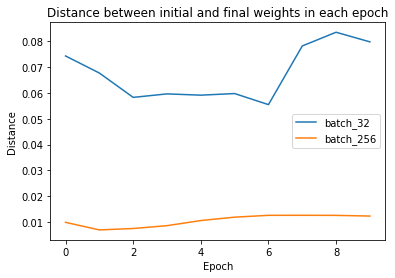

In [48]:
plt.figure()
plt.plot(epoch_update_magnitudes_by_batch_size[32], label='batch_32')
plt.plot(epoch_update_magnitudes_by_batch_size[256], label='batch_256')
plt.xlabel('Epoch')
plt.ylabel('Distance')
plt.legend()
plt.title('Distance between initial and final weights in each epoch')
plt.show()

The plot above shows that the larger batch sizes do indeed traverse less distance per epoch. In fact, this ratio looks very similar to the inverse of the batch size ratios! (256/32 = 8).

But why does it traverse less distance per epoch? Is it because we have fewer updates with a large batch size? Or is it because each batch update traverses less distance? Or both?

In [49]:
# For the last layer, compute the distance between between epoch weights and epoch+1 weights
batch_update_magnitudes_by_batch_size = {}
for batch_size in batch_sizes:
    batch_update_magnitudes_by_batch_size[batch_size] = []
    weights_per_batch = weight_history_by_batch_size_trial_3[batch_size].weights_per_batch
    for i in range(len(weights_per_batch)-1):
        curr_batch_weights = weights_per_batch[i][-2].flatten()
        next_batch_weights = weights_per_batch[i+1][-2].flatten()
        batch_update_magnitudes_by_batch_size[batch_size].append(np.linalg.norm(next_batch_weights - curr_batch_weights))

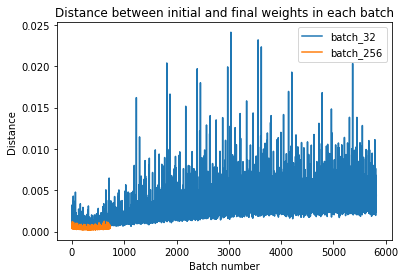

In [41]:
plt.figure()
plt.plot(batch_update_magnitudes_by_batch_size[32], label='batch_32')
plt.plot(batch_update_magnitudes_by_batch_size[256], label='batch_256')
plt.xlabel('Batch number')
plt.ylabel('Distance')
plt.legend()
plt.title('Distance between initial and final weights in each batch')
plt.show()

In [44]:
print("Average batch update norm for batch size 32: ", np.mean(batch_update_magnitudes_by_batch_size[32]))
print("Average batch update norm for batch size 256: ", np.mean(batch_update_magnitudes_by_batch_size[256]))

Average batch update norm for batch size 32:  0.0032435427
Average batch update norm for batch size 256:  0.00043920582


We can see that each batch update traverses less distance, In fact, the ratio of the batch update sizes is almost exactly the inverse of the batch size ratio!

Now we know why batch size 256 converges so much more slowly: not only is it making fewer updates, but each update is also smaller.

## How does learning rate interact with batch size?

We still haven't fully resolved the question of what batch size to use, and how important of a decision it is when training a model. When we train a model, does it really matter what batch size I use? To answer that question, let's try out more batch sizes. Since we know batch size is sensitive to learning rate, let's also try different learning rates, so we can find the optimal learning rate for each batch size.

In [3]:
batch_sizes = [32, 64, 128, 256]
learning_rates = [0.01, 0.02, 0.04, 0.08, 0.16]
model_state_by_batch_size_and_learning_rate_trial_4 = {}
        
for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )
    model_state_by_batch_size_and_learning_rate_trial_4[batch_size] = {}

    for learning_rate in learning_rates:        
        # Build and train model
        model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate))
        es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
        mc = keras.callbacks.ModelCheckpoint(
            'pickled_objects/batch_size_{}_lr_{}_best_weights_trial_4.h5'.format(batch_size, learning_rate),
            monitor='val_loss',
            mode='min',
            verbose=1,
            save_best_only=True,
            save_weights_only=True
        )
        model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate] = ml_utils.train_model(
            model,
            train,
            validation,
            epochs=10000,
            extra_callbacks=[es, mc],
        )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10000
    582/Unknown - 27s 46ms/step - loss: 0.6926 - accuracy: 0.5135- 27s 46ms/step - loss: 0.6926 - accuracy: 0.513
Epoch 00001: val_loss improved from inf to 0.69189, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 33s 57ms/step - loss: 0.6926 - accuracy: 0.5135 - val_loss: 0.6919 - val_accuracy: 0.4963
Epoch 2/10000
581/582 [============================>.] - ETA: 0s - loss: 0.6869 - accuracy: 0.5650
Epoch 00002: val_loss improved from 0.69189 to 0.69019, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [=============================

Epoch 23/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5461 - accuracy: 0.7242
Epoch 00023: val_loss improved from 0.53693 to 0.52775, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.5463 - accuracy: 0.7242 - val_loss: 0.5277 - val_accuracy: 0.7386
Epoch 24/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7334
Epoch 00024: val_loss improved from 0.52775 to 0.51654, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.5374 - accuracy: 0.7331 - val_loss: 0.5165 - val_accuracy: 0.7494
Epoch 25/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5251 - accuracy: 0.7385
Epoch 00025: val_loss improved from 0.51654 to 0.50366, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [=======================

Epoch 48/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7945
Epoch 00048: val_loss did not improve from 0.44450
582/582 [==============================] - 12s 21ms/step - loss: 0.4433 - accuracy: 0.7942 - val_loss: 0.4607 - val_accuracy: 0.7827
Epoch 49/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4387 - accuracy: 0.7952
Epoch 00049: val_loss improved from 0.44450 to 0.44247, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4391 - accuracy: 0.7949 - val_loss: 0.4425 - val_accuracy: 0.7917
Epoch 50/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.7957
Epoch 00050: val_loss improved from 0.44247 to 0.44167, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4357 - accuracy: 0.7956 - val_loss: 0.4417 - val

580/582 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8449
Epoch 00101: val_loss improved from 0.36953 to 0.35900, saving model to pickled_objects/batch_size_32_lr_0.01_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3509 - accuracy: 0.8448 - val_loss: 0.3590 - val_accuracy: 0.8373
Epoch 102/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8421
Epoch 00102: val_loss did not improve from 0.35900
582/582 [==============================] - 12s 21ms/step - loss: 0.3521 - accuracy: 0.8420 - val_loss: 0.3653 - val_accuracy: 0.8336
Epoch 103/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3504 - accuracy: 0.8425
Epoch 00103: val_loss did not improve from 0.35900
582/582 [==============================] - 12s 21ms/step - loss: 0.3506 - accuracy: 0.8423 - val_loss: 0.3676 - val_accuracy: 0.8338
Epoch 104/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3

Epoch 129/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3132 - accuracy: 0.8618
Epoch 00129: val_loss did not improve from 0.34834
582/582 [==============================] - 12s 21ms/step - loss: 0.3132 - accuracy: 0.8617 - val_loss: 0.3535 - val_accuracy: 0.8433
Epoch 130/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8595
Epoch 00130: val_loss did not improve from 0.34834
582/582 [==============================] - 12s 21ms/step - loss: 0.3138 - accuracy: 0.8595 - val_loss: 0.3778 - val_accuracy: 0.8298
Epoch 131/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3154 - accuracy: 0.8595
Epoch 00131: val_loss did not improve from 0.34834
582/582 [==============================] - 12s 21ms/step - loss: 0.3153 - accuracy: 0.8594 - val_loss: 0.3581 - val_accuracy: 0.8379
Epoch 132/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3155 - accuracy: 0.8614
Epoch 00132: val_loss did not improve from 0

Epoch 186/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8911
Epoch 00186: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2512 - accuracy: 0.8911 - val_loss: 0.3650 - val_accuracy: 0.8360
Epoch 187/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.8969
Epoch 00187: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2421 - accuracy: 0.8969 - val_loss: 0.3765 - val_accuracy: 0.8338
Epoch 188/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.8952
Epoch 00188: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2437 - accuracy: 0.8953 - val_loss: 0.3605 - val_accuracy: 0.8386
Epoch 189/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9004
Epoch 00189: val_loss did not improve from 0

Epoch 215/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9130
Epoch 00215: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2070 - accuracy: 0.9130 - val_loss: 0.3749 - val_accuracy: 0.8388
Epoch 216/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2119 - accuracy: 0.9117
Epoch 00216: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2116 - accuracy: 0.9119 - val_loss: 0.3797 - val_accuracy: 0.8362
Epoch 217/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9135
Epoch 00217: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.2081 - accuracy: 0.9135 - val_loss: 0.3816 - val_accuracy: 0.8362
Epoch 218/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2113 - accuracy: 0.9128
Epoch 00218: val_loss did not improve from 0

Epoch 244/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1830 - accuracy: 0.9251
Epoch 00244: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.1828 - accuracy: 0.9252 - val_loss: 0.3901 - val_accuracy: 0.8381
Epoch 245/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1818 - accuracy: 0.9260
Epoch 00245: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.1815 - accuracy: 0.9261 - val_loss: 0.3839 - val_accuracy: 0.8403
Epoch 246/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1779 - accuracy: 0.9259
Epoch 00246: val_loss did not improve from 0.34388
582/582 [==============================] - 12s 21ms/step - loss: 0.1776 - accuracy: 0.9260 - val_loss: 0.3784 - val_accuracy: 0.8394
Epoch 247/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.9268
Epoch 00247: val_loss did not improve from 0

Epoch 14/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5184 - accuracy: 0.7453
Epoch 00014: val_loss improved from 0.51482 to 0.49813, saving model to pickled_objects/batch_size_32_lr_0.02_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.5186 - accuracy: 0.7450 - val_loss: 0.4981 - val_accuracy: 0.7584
Epoch 15/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.7498
Epoch 00015: val_loss improved from 0.49813 to 0.48875, saving model to pickled_objects/batch_size_32_lr_0.02_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.5088 - accuracy: 0.7495 - val_loss: 0.4888 - val_accuracy: 0.7683
Epoch 16/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.7560
Epoch 00016: val_loss improved from 0.48875 to 0.48066, saving model to pickled_objects/batch_size_32_lr_0.02_best_weights_trial_4.h5
582/582 [=======================

Epoch 64/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3427 - accuracy: 0.8486
Epoch 00064: val_loss did not improve from 0.37136
582/582 [==============================] - 12s 21ms/step - loss: 0.3425 - accuracy: 0.8485 - val_loss: 0.3727 - val_accuracy: 0.8259
Epoch 65/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8483
Epoch 00065: val_loss did not improve from 0.37136
582/582 [==============================] - 12s 21ms/step - loss: 0.3393 - accuracy: 0.8482 - val_loss: 0.3753 - val_accuracy: 0.8222
Epoch 66/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8496
Epoch 00066: val_loss improved from 0.37136 to 0.36717, saving model to pickled_objects/batch_size_32_lr_0.02_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3354 - accuracy: 0.8497 - val_loss: 0.3672 - val_accuracy: 0.8323
Epoch 67/10000
580/582 [============================>.] - ETA: 0s

Epoch 92/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.8803
Epoch 00092: val_loss did not improve from 0.36234
582/582 [==============================] - 12s 21ms/step - loss: 0.2786 - accuracy: 0.8803 - val_loss: 0.3670 - val_accuracy: 0.8362
Epoch 93/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2782 - accuracy: 0.8787
Epoch 00093: val_loss did not improve from 0.36234
582/582 [==============================] - 12s 21ms/step - loss: 0.2778 - accuracy: 0.8788 - val_loss: 0.3680 - val_accuracy: 0.8358
Epoch 94/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.8792
Epoch 00094: val_loss did not improve from 0.36234
582/582 [==============================] - 12s 21ms/step - loss: 0.2791 - accuracy: 0.8791 - val_loss: 0.3868 - val_accuracy: 0.8233
Epoch 95/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2756 - accuracy: 0.8819
Epoch 00095: val_loss did not improve from 0.362

Epoch 121/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9058
Epoch 00121: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2231 - accuracy: 0.9057 - val_loss: 0.3897 - val_accuracy: 0.8334
Epoch 122/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2234 - accuracy: 0.9065
Epoch 00122: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2241 - accuracy: 0.9064 - val_loss: 0.3729 - val_accuracy: 0.8383
Epoch 123/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9064
Epoch 00123: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2218 - accuracy: 0.9064 - val_loss: 0.3803 - val_accuracy: 0.8347
Epoch 124/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9067
Epoch 00124: val_loss did not improve from 0

Epoch 150/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.9277
Epoch 00150: val_loss did not improve from 0.35756
582/582 [==============================] - 13s 21ms/step - loss: 0.1787 - accuracy: 0.9278 - val_loss: 0.4192 - val_accuracy: 0.8278
Epoch 151/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.9234
Epoch 00151: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1844 - accuracy: 0.9233 - val_loss: 0.4030 - val_accuracy: 0.8353
Epoch 152/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9267
Epoch 00152: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1819 - accuracy: 0.9268 - val_loss: 0.4242 - val_accuracy: 0.8205
Epoch 153/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.9287
Epoch 00153: val_loss did not improve from 0

Epoch 179/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1522 - accuracy: 0.9379
Epoch 00179: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1520 - accuracy: 0.9379 - val_loss: 0.4439 - val_accuracy: 0.8293
Epoch 180/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9397
Epoch 00180: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1491 - accuracy: 0.9398 - val_loss: 0.4361 - val_accuracy: 0.8282
Epoch 181/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1529 - accuracy: 0.9399
Epoch 00181: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1529 - accuracy: 0.9399 - val_loss: 0.4436 - val_accuracy: 0.8231
Epoch 182/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9405
Epoch 00182: val_loss did not improve from 0

Epoch 9/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5483 - accuracy: 0.7185
Epoch 00009: val_loss improved from 0.54363 to 0.53008, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [==============================] - 13s 22ms/step - loss: 0.5485 - accuracy: 0.7183 - val_loss: 0.5301 - val_accuracy: 0.7287
Epoch 10/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7245
Epoch 00010: val_loss improved from 0.53008 to 0.51803, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [==============================] - 13s 22ms/step - loss: 0.5391 - accuracy: 0.7242 - val_loss: 0.5180 - val_accuracy: 0.7418
Epoch 11/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.7340
Epoch 00011: val_loss improved from 0.51803 to 0.50134, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [========================

580/582 [============================>.] - ETA: 0s - loss: 0.3989 - accuracy: 0.8139
Epoch 00034: val_loss did not improve from 0.39879
582/582 [==============================] - 13s 22ms/step - loss: 0.3994 - accuracy: 0.8138 - val_loss: 0.4157 - val_accuracy: 0.8074
Epoch 35/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3913 - accuracy: 0.8225
Epoch 00035: val_loss improved from 0.39879 to 0.39776, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3913 - accuracy: 0.8226 - val_loss: 0.3978 - val_accuracy: 0.8166
Epoch 36/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3922 - accuracy: 0.8169
Epoch 00036: val_loss improved from 0.39776 to 0.39436, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3925 - accuracy: 0.8167 - val_loss: 0.3944 - val_accuracy: 0.82

Epoch 61/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3066 - accuracy: 0.8652
Epoch 00061: val_loss did not improve from 0.36219
582/582 [==============================] - 12s 21ms/step - loss: 0.3067 - accuracy: 0.8651 - val_loss: 0.3718 - val_accuracy: 0.8347
Epoch 62/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3008 - accuracy: 0.8700
Epoch 00062: val_loss did not improve from 0.36219
582/582 [==============================] - 12s 21ms/step - loss: 0.3007 - accuracy: 0.8701 - val_loss: 0.3654 - val_accuracy: 0.8383
Epoch 63/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8699
Epoch 00063: val_loss improved from 0.36219 to 0.35423, saving model to pickled_objects/batch_size_32_lr_0.04_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.2965 - accuracy: 0.8699 - val_loss: 0.3542 - val_accuracy: 0.8450
Epoch 64/10000
580/582 [============================>.] - ETA: 0s

Epoch 90/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9019
Epoch 00090: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.2309 - accuracy: 0.9019 - val_loss: 0.3799 - val_accuracy: 0.8347
Epoch 91/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9041
Epoch 00091: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.2307 - accuracy: 0.9040 - val_loss: 0.3891 - val_accuracy: 0.8315
Epoch 92/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9053
Epoch 00092: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.2275 - accuracy: 0.9053 - val_loss: 0.3745 - val_accuracy: 0.8407
Epoch 93/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2267 - accuracy: 0.9043
Epoch 00093: val_loss did not improve from 0.354

Epoch 119/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.9240
Epoch 00119: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1840 - accuracy: 0.9238 - val_loss: 0.4064 - val_accuracy: 0.8330
Epoch 120/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.9282
Epoch 00120: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1786 - accuracy: 0.9281 - val_loss: 0.4005 - val_accuracy: 0.8426
Epoch 121/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9302
Epoch 00121: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1768 - accuracy: 0.9302 - val_loss: 0.4004 - val_accuracy: 0.8332
Epoch 122/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1758 - accuracy: 0.9284
Epoch 00122: val_loss did not improve from 0

Epoch 148/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1536 - accuracy: 0.9387
Epoch 00148: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1533 - accuracy: 0.9389 - val_loss: 0.4054 - val_accuracy: 0.8358
Epoch 149/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1462 - accuracy: 0.9418
Epoch 00149: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1464 - accuracy: 0.9417 - val_loss: 0.4142 - val_accuracy: 0.8392
Epoch 150/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1435 - accuracy: 0.9413
Epoch 00150: val_loss did not improve from 0.35423
582/582 [==============================] - 12s 21ms/step - loss: 0.1433 - accuracy: 0.9413 - val_loss: 0.4084 - val_accuracy: 0.8366
Epoch 151/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1510 - accuracy: 0.9404
Epoch 00151: val_loss did not improve from 0

Epoch 11/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4924 - accuracy: 0.7586
Epoch 00011: val_loss improved from 0.48551 to 0.47884, saving model to pickled_objects/batch_size_32_lr_0.08_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4928 - accuracy: 0.7584 - val_loss: 0.4788 - val_accuracy: 0.7715
Epoch 12/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4821 - accuracy: 0.7658
Epoch 00012: val_loss did not improve from 0.47884
582/582 [==============================] - 12s 21ms/step - loss: 0.4823 - accuracy: 0.7657 - val_loss: 0.4900 - val_accuracy: 0.7584
Epoch 13/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4730 - accuracy: 0.7696
Epoch 00013: val_loss improved from 0.47884 to 0.46636, saving model to pickled_objects/batch_size_32_lr_0.08_best_weights_trial_4.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4735 - accuracy: 0.7693 - val_loss: 0.4664 - val

Epoch 64/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.8849
Epoch 00064: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2698 - accuracy: 0.8848 - val_loss: 0.3941 - val_accuracy: 0.8156
Epoch 65/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2743 - accuracy: 0.8833
Epoch 00065: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2744 - accuracy: 0.8833 - val_loss: 0.3806 - val_accuracy: 0.8252
Epoch 66/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2738 - accuracy: 0.8813
Epoch 00066: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2737 - accuracy: 0.8813 - val_loss: 0.3751 - val_accuracy: 0.8298
Epoch 67/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.8853
Epoch 00067: val_loss did not improve from 0.367

Epoch 93/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9097
Epoch 00093: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2165 - accuracy: 0.9098 - val_loss: 0.3954 - val_accuracy: 0.8272
Epoch 94/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9116
Epoch 00094: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2185 - accuracy: 0.9117 - val_loss: 0.3908 - val_accuracy: 0.8239
Epoch 95/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9099
Epoch 00095: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.2167 - accuracy: 0.9098 - val_loss: 0.3968 - val_accuracy: 0.8261
Epoch 96/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9101
Epoch 00096: val_loss did not improve from 0.367

Epoch 122/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9259
Epoch 00122: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.1841 - accuracy: 0.9260 - val_loss: 0.4421 - val_accuracy: 0.8175
Epoch 123/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9247
Epoch 00123: val_loss did not improve from 0.36728
582/582 [==============================] - 13s 22ms/step - loss: 0.1872 - accuracy: 0.9247 - val_loss: 0.4306 - val_accuracy: 0.8123
Epoch 124/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1809 - accuracy: 0.9286
Epoch 00124: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.1811 - accuracy: 0.9285 - val_loss: 0.4631 - val_accuracy: 0.8044
Epoch 125/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1848 - accuracy: 0.9266
Epoch 00125: val_loss did not improve from 0

Epoch 151/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 0.9384
Epoch 00151: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.1613 - accuracy: 0.9385 - val_loss: 0.4580 - val_accuracy: 0.8186
Epoch 152/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1588 - accuracy: 0.9382
Epoch 00152: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.1588 - accuracy: 0.9382 - val_loss: 0.4222 - val_accuracy: 0.8169
Epoch 153/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 0.9384
Epoch 00153: val_loss did not improve from 0.36728
582/582 [==============================] - 12s 21ms/step - loss: 0.1618 - accuracy: 0.9384 - val_loss: 0.4067 - val_accuracy: 0.8188
Epoch 154/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.9386
Epoch 00154: val_loss did not improve from 0

Epoch 42/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3764 - accuracy: 0.8277
Epoch 00042: val_loss did not improve from 0.38000
582/582 [==============================] - 12s 21ms/step - loss: 0.3766 - accuracy: 0.8276 - val_loss: 0.3829 - val_accuracy: 0.8222
Epoch 43/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8320
Epoch 00043: val_loss did not improve from 0.38000
582/582 [==============================] - 12s 21ms/step - loss: 0.3725 - accuracy: 0.8319 - val_loss: 0.5566 - val_accuracy: 0.7188
Epoch 44/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8297
Epoch 00044: val_loss did not improve from 0.38000
582/582 [==============================] - 12s 21ms/step - loss: 0.3731 - accuracy: 0.8298 - val_loss: 0.3980 - val_accuracy: 0.8098
Epoch 45/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3760 - accuracy: 0.8329
Epoch 00045: val_loss did not improve from 0.380

Epoch 99/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8280
Epoch 00099: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.3808 - accuracy: 0.8278 - val_loss: 0.4548 - val_accuracy: 0.7816
Epoch 100/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8304
Epoch 00100: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.3810 - accuracy: 0.8303 - val_loss: 0.4926 - val_accuracy: 0.7835
Epoch 101/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8341
Epoch 00101: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.3743 - accuracy: 0.8337 - val_loss: 0.4159 - val_accuracy: 0.8130
Epoch 102/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3767 - accuracy: 0.8313
Epoch 00102: val_loss did not improve from 0.

Epoch 128/10000
580/582 [============================>.] - ETA: 0s - loss: 0.6935 - accuracy: 0.4984
Epoch 00128: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.6934 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5125
Epoch 129/10000
580/582 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.6739
Epoch 00129: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.5335 - accuracy: 0.6742 - val_loss: 0.4503 - val_accuracy: 0.7960
Epoch 130/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.8183
Epoch 00130: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.4056 - accuracy: 0.8181 - val_loss: 0.4043 - val_accuracy: 0.8186
Epoch 131/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4142 - accuracy: 0.8144
Epoch 00131: val_loss did not improve from 0

Epoch 157/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.8039
Epoch 00157: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.4307 - accuracy: 0.8039 - val_loss: 0.4785 - val_accuracy: 0.7842
Epoch 158/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.8030
Epoch 00158: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.4297 - accuracy: 0.8026 - val_loss: 0.5654 - val_accuracy: 0.7255
Epoch 159/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8039
Epoch 00159: val_loss did not improve from 0.36385
582/582 [==============================] - 12s 21ms/step - loss: 0.4230 - accuracy: 0.8039 - val_loss: 0.4188 - val_accuracy: 0.8040
Epoch 160/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.7986
Epoch 00160: val_loss did not improve from 0

Epoch 36/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5724 - accuracy: 0.6985
Epoch 00036: val_loss improved from 0.60692 to 0.60118, saving model to pickled_objects/batch_size_64_lr_0.01_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.5727 - accuracy: 0.6984 - val_loss: 0.6012 - val_accuracy: 0.6599
Epoch 37/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5713 - accuracy: 0.6976
Epoch 00037: val_loss did not improve from 0.60118
291/291 [==============================] - 10s 34ms/step - loss: 0.5716 - accuracy: 0.6970 - val_loss: 0.6211 - val_accuracy: 0.6468
Epoch 38/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5644 - accuracy: 0.7059
Epoch 00038: val_loss improved from 0.60118 to 0.58301, saving model to pickled_objects/batch_size_64_lr_0.01_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.5648 - accuracy: 0.7052 - val_loss: 0.5830 - val

Epoch 62/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5111 - accuracy: 0.7490
Epoch 00062: val_loss did not improve from 0.51000
291/291 [==============================] - 10s 34ms/step - loss: 0.5117 - accuracy: 0.7486 - val_loss: 0.5242 - val_accuracy: 0.7315
Epoch 63/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.7476
Epoch 00063: val_loss did not improve from 0.51000
291/291 [==============================] - 10s 34ms/step - loss: 0.5062 - accuracy: 0.7471 - val_loss: 0.5375 - val_accuracy: 0.7182
Epoch 64/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5042 - accuracy: 0.7511
Epoch 00064: val_loss did not improve from 0.51000
291/291 [==============================] - 10s 34ms/step - loss: 0.5046 - accuracy: 0.7509 - val_loss: 0.5520 - val_accuracy: 0.7094
Epoch 65/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.7491
Epoch 00065: val_loss did not improve from 0.510

Epoch 90/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.7684
Epoch 00090: val_loss did not improve from 0.47133
291/291 [==============================] - 10s 34ms/step - loss: 0.4742 - accuracy: 0.7680 - val_loss: 0.4738 - val_accuracy: 0.7698
Epoch 91/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4774 - accuracy: 0.7666
Epoch 00091: val_loss did not improve from 0.47133
291/291 [==============================] - 10s 34ms/step - loss: 0.4782 - accuracy: 0.7664 - val_loss: 0.4733 - val_accuracy: 0.7689
Epoch 92/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4725 - accuracy: 0.7674
Epoch 00092: val_loss improved from 0.47133 to 0.46766, saving model to pickled_objects/batch_size_64_lr_0.01_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4732 - accuracy: 0.7674 - val_loss: 0.4677 - val_accuracy: 0.7747
Epoch 93/10000
289/291 [============================>.] - ETA: 0s

Epoch 118/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4475 - accuracy: 0.7890
Epoch 00118: val_loss did not improve from 0.44543
291/291 [==============================] - 10s 34ms/step - loss: 0.4482 - accuracy: 0.7889 - val_loss: 0.4754 - val_accuracy: 0.7635
Epoch 119/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.7843
Epoch 00119: val_loss did not improve from 0.44543
291/291 [==============================] - 10s 33ms/step - loss: 0.4455 - accuracy: 0.7840 - val_loss: 0.4840 - val_accuracy: 0.7588
Epoch 120/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.7879
Epoch 00120: val_loss did not improve from 0.44543
291/291 [==============================] - 10s 34ms/step - loss: 0.4457 - accuracy: 0.7876 - val_loss: 0.4545 - val_accuracy: 0.7773
Epoch 121/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.7861
Epoch 00121: val_loss did not improve from 0

Epoch 146/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.8018
Epoch 00146: val_loss did not improve from 0.43174
291/291 [==============================] - 10s 33ms/step - loss: 0.4233 - accuracy: 0.8013 - val_loss: 0.4326 - val_accuracy: 0.7939
Epoch 147/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4226 - accuracy: 0.8006
Epoch 00147: val_loss did not improve from 0.43174
291/291 [==============================] - 10s 33ms/step - loss: 0.4231 - accuracy: 0.8004 - val_loss: 0.4340 - val_accuracy: 0.7911
Epoch 148/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8018
Epoch 00148: val_loss did not improve from 0.43174
291/291 [==============================] - 10s 33ms/step - loss: 0.4237 - accuracy: 0.8016 - val_loss: 0.4405 - val_accuracy: 0.7874
Epoch 149/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.8029
Epoch 00149: val_loss did not improve from 0

Epoch 201/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8205
Epoch 00201: val_loss improved from 0.40282 to 0.40271, saving model to pickled_objects/batch_size_64_lr_0.01_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3860 - accuracy: 0.8202 - val_loss: 0.4027 - val_accuracy: 0.8147
Epoch 202/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3782 - accuracy: 0.8249
Epoch 00202: val_loss did not improve from 0.40271
291/291 [==============================] - 10s 34ms/step - loss: 0.3786 - accuracy: 0.8247 - val_loss: 0.4450 - val_accuracy: 0.7865
Epoch 203/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3767 - accuracy: 0.8262
Epoch 00203: val_loss did not improve from 0.40271
291/291 [==============================] - 10s 34ms/step - loss: 0.3770 - accuracy: 0.8261 - val_loss: 0.4085 - val_accuracy: 0.8100
Epoch 204/10000
289/291 [============================>.] - ETA

Epoch 256/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.8467
Epoch 00256: val_loss did not improve from 0.38514
291/291 [==============================] - 10s 34ms/step - loss: 0.3402 - accuracy: 0.8461 - val_loss: 0.4014 - val_accuracy: 0.8128
Epoch 257/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3344 - accuracy: 0.8522
Epoch 00257: val_loss did not improve from 0.38514
291/291 [==============================] - 10s 34ms/step - loss: 0.3355 - accuracy: 0.8514 - val_loss: 0.3911 - val_accuracy: 0.8164
Epoch 258/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3338 - accuracy: 0.8513
Epoch 00258: val_loss did not improve from 0.38514
291/291 [==============================] - 10s 34ms/step - loss: 0.3340 - accuracy: 0.8513 - val_loss: 0.4017 - val_accuracy: 0.8130
Epoch 259/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3382 - accuracy: 0.8489
Epoch 00259: val_loss did not improve from 0

Epoch 313/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.8716
Epoch 00313: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2940 - accuracy: 0.8711 - val_loss: 0.3867 - val_accuracy: 0.8184
Epoch 314/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2931 - accuracy: 0.8728
Epoch 00314: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2935 - accuracy: 0.8725 - val_loss: 0.4128 - val_accuracy: 0.8085
Epoch 315/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2950 - accuracy: 0.8694
Epoch 00315: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2952 - accuracy: 0.8693 - val_loss: 0.3991 - val_accuracy: 0.8104
Epoch 316/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.8679
Epoch 00316: val_loss did not improve from 0

Epoch 342/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2717 - accuracy: 0.8844
Epoch 00342: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 33ms/step - loss: 0.2717 - accuracy: 0.8845 - val_loss: 0.4022 - val_accuracy: 0.8132
Epoch 343/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.8851
Epoch 00343: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 33ms/step - loss: 0.2681 - accuracy: 0.8851 - val_loss: 0.4182 - val_accuracy: 0.8113
Epoch 344/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8828
Epoch 00344: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2706 - accuracy: 0.8826 - val_loss: 0.3935 - val_accuracy: 0.8186
Epoch 345/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.8844
Epoch 00345: val_loss did not improve from 0

Epoch 371/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8958
Epoch 00371: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2498 - accuracy: 0.8958 - val_loss: 0.3924 - val_accuracy: 0.8237
Epoch 372/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2483 - accuracy: 0.8929
Epoch 00372: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2483 - accuracy: 0.8930 - val_loss: 0.4075 - val_accuracy: 0.8173
Epoch 373/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8926
Epoch 00373: val_loss did not improve from 0.38295
291/291 [==============================] - 10s 34ms/step - loss: 0.2513 - accuracy: 0.8923 - val_loss: 0.4665 - val_accuracy: 0.7945
Epoch 374/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8895
Epoch 00374: val_loss did not improve from 0

289/291 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.7714
Epoch 00035: val_loss did not improve from 0.46028
291/291 [==============================] - 10s 34ms/step - loss: 0.4739 - accuracy: 0.7714 - val_loss: 0.4620 - val_accuracy: 0.7814
Epoch 36/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4695 - accuracy: 0.7762
Epoch 00036: val_loss improved from 0.46028 to 0.45223, saving model to pickled_objects/batch_size_64_lr_0.02_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4702 - accuracy: 0.7756 - val_loss: 0.4522 - val_accuracy: 0.7923
Epoch 37/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4725 - accuracy: 0.7736
Epoch 00037: val_loss did not improve from 0.45223
291/291 [==============================] - 10s 34ms/step - loss: 0.4728 - accuracy: 0.7733 - val_loss: 0.4566 - val_accuracy: 0.7868
Epoch 38/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4644

Epoch 61/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4166 - accuracy: 0.8061
Epoch 00061: val_loss did not improve from 0.40573
291/291 [==============================] - 10s 34ms/step - loss: 0.4168 - accuracy: 0.8060 - val_loss: 0.4077 - val_accuracy: 0.8113
Epoch 62/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4178 - accuracy: 0.8061
Epoch 00062: val_loss did not improve from 0.40573
291/291 [==============================] - 10s 34ms/step - loss: 0.4179 - accuracy: 0.8062 - val_loss: 0.4200 - val_accuracy: 0.8012
Epoch 63/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4122 - accuracy: 0.8102
Epoch 00063: val_loss improved from 0.40573 to 0.40416, saving model to pickled_objects/batch_size_64_lr_0.02_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4125 - accuracy: 0.8101 - val_loss: 0.4042 - val_accuracy: 0.8128
Epoch 64/10000
289/291 [============================>.] - ETA: 0s

Epoch 87/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8304
Epoch 00087: val_loss improved from 0.37810 to 0.37701, saving model to pickled_objects/batch_size_64_lr_0.02_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3737 - accuracy: 0.8304 - val_loss: 0.3770 - val_accuracy: 0.8280
Epoch 88/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3768 - accuracy: 0.8294
Epoch 00088: val_loss improved from 0.37701 to 0.37317, saving model to pickled_objects/batch_size_64_lr_0.02_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3772 - accuracy: 0.8292 - val_loss: 0.3732 - val_accuracy: 0.8278
Epoch 89/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3648 - accuracy: 0.8316
Epoch 00089: val_loss did not improve from 0.37317
291/291 [==============================] - 10s 34ms/step - loss: 0.3647 - accuracy: 0.8316 - val_loss: 0.3766 - val

Epoch 113/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8480
Epoch 00113: val_loss improved from 0.36087 to 0.35839, saving model to pickled_objects/batch_size_64_lr_0.02_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3362 - accuracy: 0.8477 - val_loss: 0.3584 - val_accuracy: 0.8353
Epoch 114/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3336 - accuracy: 0.8519
Epoch 00114: val_loss did not improve from 0.35839
291/291 [==============================] - 10s 34ms/step - loss: 0.3337 - accuracy: 0.8521 - val_loss: 0.3630 - val_accuracy: 0.8356
Epoch 115/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3308 - accuracy: 0.8539
Epoch 00115: val_loss did not improve from 0.35839
291/291 [==============================] - 10s 33ms/step - loss: 0.3307 - accuracy: 0.8539 - val_loss: 0.3666 - val_accuracy: 0.8289
Epoch 116/10000
289/291 [============================>.] - ETA

Epoch 140/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3014 - accuracy: 0.8671
Epoch 00140: val_loss did not improve from 0.34970
291/291 [==============================] - 10s 34ms/step - loss: 0.3015 - accuracy: 0.8670 - val_loss: 0.3579 - val_accuracy: 0.8330
Epoch 141/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.8674
Epoch 00141: val_loss did not improve from 0.34970
291/291 [==============================] - 10s 34ms/step - loss: 0.2971 - accuracy: 0.8673 - val_loss: 0.3544 - val_accuracy: 0.8396
Epoch 142/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.8673
Epoch 00142: val_loss did not improve from 0.34970
291/291 [==============================] - 10s 34ms/step - loss: 0.2987 - accuracy: 0.8675 - val_loss: 0.3667 - val_accuracy: 0.8302
Epoch 143/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8740
Epoch 00143: val_loss did not improve from 0

Epoch 197/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9040
Epoch 00197: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.2303 - accuracy: 0.9041 - val_loss: 0.3734 - val_accuracy: 0.8381
Epoch 198/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.9045
Epoch 00198: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 35ms/step - loss: 0.2290 - accuracy: 0.9046 - val_loss: 0.3700 - val_accuracy: 0.8407
Epoch 199/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2273 - accuracy: 0.9057
Epoch 00199: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.2271 - accuracy: 0.9058 - val_loss: 0.3828 - val_accuracy: 0.8366
Epoch 200/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2285 - accuracy: 0.9033
Epoch 00200: val_loss did not improve from 0

Epoch 226/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9191
Epoch 00226: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.1974 - accuracy: 0.9189 - val_loss: 0.3747 - val_accuracy: 0.8407
Epoch 227/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2021 - accuracy: 0.9153
Epoch 00227: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.2021 - accuracy: 0.9152 - val_loss: 0.3834 - val_accuracy: 0.8388
Epoch 228/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1944 - accuracy: 0.9197
Epoch 00228: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.1948 - accuracy: 0.9196 - val_loss: 0.4054 - val_accuracy: 0.8300
Epoch 229/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1974 - accuracy: 0.9184
Epoch 00229: val_loss did not improve from 0

Epoch 255/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1683 - accuracy: 0.9321
Epoch 00255: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.1686 - accuracy: 0.9321 - val_loss: 0.4194 - val_accuracy: 0.8280
Epoch 256/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9298
Epoch 00256: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.1722 - accuracy: 0.9300 - val_loss: 0.3927 - val_accuracy: 0.8399
Epoch 257/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1701 - accuracy: 0.9311
Epoch 00257: val_loss did not improve from 0.34904
291/291 [==============================] - 10s 34ms/step - loss: 0.1698 - accuracy: 0.9311 - val_loss: 0.4186 - val_accuracy: 0.8353
Epoch 258/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1707 - accuracy: 0.9317
Epoch 00258: val_loss did not improve from 0

Epoch 19/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4820 - accuracy: 0.7665
Epoch 00019: val_loss did not improve from 0.47298
291/291 [==============================] - 10s 34ms/step - loss: 0.4824 - accuracy: 0.7664 - val_loss: 0.4755 - val_accuracy: 0.7803
Epoch 20/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.7682
Epoch 00020: val_loss improved from 0.47298 to 0.46616, saving model to pickled_objects/batch_size_64_lr_0.04_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4802 - accuracy: 0.7679 - val_loss: 0.4662 - val_accuracy: 0.7833
Epoch 21/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7727
Epoch 00021: val_loss improved from 0.46616 to 0.45819, saving model to pickled_objects/batch_size_64_lr_0.04_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4729 - accuracy: 0.7719 - val_loss: 0.4582 - val

Epoch 43/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3986 - accuracy: 0.8136
Epoch 00043: val_loss did not improve from 0.39302
291/291 [==============================] - 10s 33ms/step - loss: 0.3989 - accuracy: 0.8132 - val_loss: 0.4157 - val_accuracy: 0.8093
Epoch 44/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3982 - accuracy: 0.8165
Epoch 00044: val_loss did not improve from 0.39302
291/291 [==============================] - 10s 33ms/step - loss: 0.3983 - accuracy: 0.8164 - val_loss: 0.3985 - val_accuracy: 0.8166
Epoch 45/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8170
Epoch 00045: val_loss did not improve from 0.39302
291/291 [==============================] - 10s 33ms/step - loss: 0.3960 - accuracy: 0.8170 - val_loss: 0.4010 - val_accuracy: 0.8091
Epoch 46/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3907 - accuracy: 0.8232
Epoch 00046: val_loss did not improve from 0.393

Epoch 98/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.8809
Epoch 00098: val_loss did not improve from 0.35049
291/291 [==============================] - 10s 34ms/step - loss: 0.2748 - accuracy: 0.8809 - val_loss: 0.3575 - val_accuracy: 0.8386
Epoch 99/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2758 - accuracy: 0.8821
Epoch 00099: val_loss improved from 0.35049 to 0.35010, saving model to pickled_objects/batch_size_64_lr_0.04_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.2760 - accuracy: 0.8818 - val_loss: 0.3501 - val_accuracy: 0.8386
Epoch 100/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.8804
Epoch 00100: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.2762 - accuracy: 0.8805 - val_loss: 0.3602 - val_accuracy: 0.8310
Epoch 101/10000
289/291 [============================>.] - ETA: 

Epoch 127/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2228 - accuracy: 0.9066
Epoch 00127: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.2225 - accuracy: 0.9067 - val_loss: 0.3656 - val_accuracy: 0.8424
Epoch 128/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9061
Epoch 00128: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 33ms/step - loss: 0.2212 - accuracy: 0.9061 - val_loss: 0.3693 - val_accuracy: 0.8433
Epoch 129/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9077
Epoch 00129: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 33ms/step - loss: 0.2201 - accuracy: 0.9077 - val_loss: 0.3780 - val_accuracy: 0.8334
Epoch 130/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2136 - accuracy: 0.9101
Epoch 00130: val_loss did not improve from 0

Epoch 156/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1850 - accuracy: 0.9230
Epoch 00156: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.1848 - accuracy: 0.9231 - val_loss: 0.3996 - val_accuracy: 0.8224
Epoch 157/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1798 - accuracy: 0.9290
Epoch 00157: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.1792 - accuracy: 0.9293 - val_loss: 0.3883 - val_accuracy: 0.8340
Epoch 158/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9300
Epoch 00158: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.1787 - accuracy: 0.9300 - val_loss: 0.4005 - val_accuracy: 0.8248
Epoch 159/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1767 - accuracy: 0.9285
Epoch 00159: val_loss did not improve from 0

Epoch 185/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1519 - accuracy: 0.9401
Epoch 00185: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 34ms/step - loss: 0.1520 - accuracy: 0.9400 - val_loss: 0.4170 - val_accuracy: 0.8310
Epoch 186/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1480 - accuracy: 0.9418
Epoch 00186: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 33ms/step - loss: 0.1482 - accuracy: 0.9416 - val_loss: 0.4147 - val_accuracy: 0.8353
Epoch 187/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1525 - accuracy: 0.9391
Epoch 00187: val_loss did not improve from 0.35010
291/291 [==============================] - 10s 33ms/step - loss: 0.1520 - accuracy: 0.9394 - val_loss: 0.4179 - val_accuracy: 0.8345
Epoch 188/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1476 - accuracy: 0.9411
Epoch 00188: val_loss did not improve from 0

Epoch 12/10000
289/291 [============================>.] - ETA: 0s - loss: 0.5076 - accuracy: 0.7446
Epoch 00012: val_loss improved from 0.47554 to 0.47532, saving model to pickled_objects/batch_size_64_lr_0.08_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.5077 - accuracy: 0.7444 - val_loss: 0.4753 - val_accuracy: 0.7769
Epoch 13/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4973 - accuracy: 0.7566
Epoch 00013: val_loss did not improve from 0.47532
291/291 [==============================] - 10s 34ms/step - loss: 0.4977 - accuracy: 0.7562 - val_loss: 0.4765 - val_accuracy: 0.7633
Epoch 14/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.7594
Epoch 00014: val_loss improved from 0.47532 to 0.47185, saving model to pickled_objects/batch_size_64_lr_0.08_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4876 - accuracy: 0.7593 - val_loss: 0.4719 - val

Epoch 37/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3710 - accuracy: 0.8315
Epoch 00037: val_loss did not improve from 0.36718
291/291 [==============================] - 10s 34ms/step - loss: 0.3710 - accuracy: 0.8311 - val_loss: 0.3820 - val_accuracy: 0.8257
Epoch 38/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3652 - accuracy: 0.8342
Epoch 00038: val_loss did not improve from 0.36718
291/291 [==============================] - 10s 34ms/step - loss: 0.3654 - accuracy: 0.8339 - val_loss: 0.4136 - val_accuracy: 0.8067
Epoch 39/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3592 - accuracy: 0.8372
Epoch 00039: val_loss improved from 0.36718 to 0.36598, saving model to pickled_objects/batch_size_64_lr_0.08_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3594 - accuracy: 0.8370 - val_loss: 0.3660 - val_accuracy: 0.8358
Epoch 40/10000
289/291 [============================>.] - ETA: 0s

Epoch 93/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2259 - accuracy: 0.9058
Epoch 00093: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 33ms/step - loss: 0.2260 - accuracy: 0.9057 - val_loss: 0.4005 - val_accuracy: 0.8261
Epoch 94/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2249 - accuracy: 0.9048
Epoch 00094: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 34ms/step - loss: 0.2251 - accuracy: 0.9048 - val_loss: 0.3761 - val_accuracy: 0.8364
Epoch 95/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9077
Epoch 00095: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 34ms/step - loss: 0.2144 - accuracy: 0.9079 - val_loss: 0.3754 - val_accuracy: 0.8263
Epoch 96/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2177 - accuracy: 0.9086
Epoch 00096: val_loss did not improve from 0.344

Epoch 122/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1752 - accuracy: 0.9293
Epoch 00122: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 33ms/step - loss: 0.1750 - accuracy: 0.9293 - val_loss: 0.4003 - val_accuracy: 0.8390
Epoch 123/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1731 - accuracy: 0.9285
Epoch 00123: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 33ms/step - loss: 0.1735 - accuracy: 0.9285 - val_loss: 0.4013 - val_accuracy: 0.8323
Epoch 124/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1694 - accuracy: 0.9308
Epoch 00124: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 33ms/step - loss: 0.1698 - accuracy: 0.9307 - val_loss: 0.3917 - val_accuracy: 0.8431
Epoch 125/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1693 - accuracy: 0.9322
Epoch 00125: val_loss did not improve from 0

Epoch 151/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1440 - accuracy: 0.9441
Epoch 00151: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 34ms/step - loss: 0.1438 - accuracy: 0.9441 - val_loss: 0.4079 - val_accuracy: 0.8332
Epoch 152/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1369 - accuracy: 0.9456
Epoch 00152: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 34ms/step - loss: 0.1366 - accuracy: 0.9457 - val_loss: 0.4402 - val_accuracy: 0.8261
Epoch 153/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9483
Epoch 00153: val_loss did not improve from 0.34422
291/291 [==============================] - 10s 34ms/step - loss: 0.1350 - accuracy: 0.9480 - val_loss: 0.4136 - val_accuracy: 0.8343
Epoch 154/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9498
Epoch 00154: val_loss did not improve from 0

Epoch 18/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4721 - accuracy: 0.7722
Epoch 00018: val_loss improved from 0.43919 to 0.43596, saving model to pickled_objects/batch_size_64_lr_0.16_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4721 - accuracy: 0.7722 - val_loss: 0.4360 - val_accuracy: 0.7994
Epoch 19/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.7731
Epoch 00019: val_loss improved from 0.43596 to 0.43561, saving model to pickled_objects/batch_size_64_lr_0.16_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.4679 - accuracy: 0.7729 - val_loss: 0.4356 - val_accuracy: 0.7975
Epoch 20/10000
289/291 [============================>.] - ETA: 0s - loss: 0.4591 - accuracy: 0.7814
Epoch 00020: val_loss improved from 0.43561 to 0.43261, saving model to pickled_objects/batch_size_64_lr_0.16_best_weights_trial_4.h5
291/291 [=======================

Epoch 44/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3679 - accuracy: 0.8358
Epoch 00044: val_loss did not improve from 0.39098
291/291 [==============================] - 10s 34ms/step - loss: 0.3683 - accuracy: 0.8357 - val_loss: 0.4099 - val_accuracy: 0.8046
Epoch 45/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8323
Epoch 00045: val_loss improved from 0.39098 to 0.38738, saving model to pickled_objects/batch_size_64_lr_0.16_best_weights_trial_4.h5
291/291 [==============================] - 10s 34ms/step - loss: 0.3626 - accuracy: 0.8324 - val_loss: 0.3874 - val_accuracy: 0.8231
Epoch 46/10000
289/291 [============================>.] - ETA: 0s - loss: 0.3551 - accuracy: 0.8413
Epoch 00046: val_loss did not improve from 0.38738
291/291 [==============================] - 10s 34ms/step - loss: 0.3547 - accuracy: 0.8416 - val_loss: 0.4048 - val_accuracy: 0.8151
Epoch 47/10000
289/291 [============================>.] - ETA: 0s

Epoch 101/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9093
Epoch 00101: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 33ms/step - loss: 0.2210 - accuracy: 0.9092 - val_loss: 0.4210 - val_accuracy: 0.8184
Epoch 102/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2286 - accuracy: 0.9061
Epoch 00102: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 34ms/step - loss: 0.2292 - accuracy: 0.9059 - val_loss: 0.4119 - val_accuracy: 0.8119
Epoch 103/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9101
Epoch 00103: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 33ms/step - loss: 0.2194 - accuracy: 0.9102 - val_loss: 0.4218 - val_accuracy: 0.8087
Epoch 104/10000
289/291 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9078
Epoch 00104: val_loss did not improve from 0

Epoch 130/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9245
Epoch 00130: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 34ms/step - loss: 0.1892 - accuracy: 0.9244 - val_loss: 0.4556 - val_accuracy: 0.8063
Epoch 131/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1846 - accuracy: 0.9264
Epoch 00131: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 34ms/step - loss: 0.1845 - accuracy: 0.9263 - val_loss: 0.4512 - val_accuracy: 0.8102
Epoch 132/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1814 - accuracy: 0.9279
Epoch 00132: val_loss did not improve from 0.38363
291/291 [==============================] - 10s 34ms/step - loss: 0.1811 - accuracy: 0.9280 - val_loss: 0.4834 - val_accuracy: 0.8136
Epoch 133/10000
289/291 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9227
Epoch 00133: val_loss did not improve from 0

145/146 [============================>.] - ETA: 0s - loss: 0.6827 - accuracy: 0.5824
Epoch 00008: val_loss improved from 0.69259 to 0.69237, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.6826 - accuracy: 0.5823 - val_loss: 0.6924 - val_accuracy: 0.4961
Epoch 9/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6805 - accuracy: 0.5835
Epoch 00009: val_loss did not improve from 0.69237
146/146 [==============================] - 8s 57ms/step - loss: 0.6805 - accuracy: 0.5835 - val_loss: 0.6934 - val_accuracy: 0.4968
Epoch 10/10000
144/146 [============================>.] - ETA: 0s - loss: 0.6778 - accuracy: 0.5870
Epoch 00010: val_loss did not improve from 0.69237
146/146 [==============================] - 8s 57ms/step - loss: 0.6776 - accuracy: 0.5870 - val_loss: 0.6933 - val_accuracy: 0.4998
Epoch 11/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6759 - 

Epoch 34/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6407 - accuracy: 0.6254
Epoch 00034: val_loss improved from 0.65002 to 0.63971, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 56ms/step - loss: 0.6406 - accuracy: 0.6253 - val_loss: 0.6397 - val_accuracy: 0.6303
Epoch 35/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6392 - accuracy: 0.6255
Epoch 00035: val_loss did not improve from 0.63971
146/146 [==============================] - 8s 56ms/step - loss: 0.6394 - accuracy: 0.6253 - val_loss: 0.6464 - val_accuracy: 0.6180
Epoch 36/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6385 - accuracy: 0.6270
Epoch 00036: val_loss improved from 0.63971 to 0.63875, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.6383 - accuracy: 0.6269 - val_loss: 0.6388 - val_

Epoch 58/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6059 - accuracy: 0.6626
Epoch 00058: val_loss improved from 0.60683 to 0.60055, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.6060 - accuracy: 0.6624 - val_loss: 0.6006 - val_accuracy: 0.6660
Epoch 59/10000
144/146 [============================>.] - ETA: 0s - loss: 0.6040 - accuracy: 0.6662
Epoch 00059: val_loss did not improve from 0.60055
146/146 [==============================] - 8s 57ms/step - loss: 0.6044 - accuracy: 0.6657 - val_loss: 0.6061 - val_accuracy: 0.6606
Epoch 60/10000
144/146 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.6689
Epoch 00060: val_loss did not improve from 0.60055
146/146 [==============================] - 8s 57ms/step - loss: 0.6001 - accuracy: 0.6684 - val_loss: 0.6103 - val_accuracy: 0.6511
Epoch 61/10000
144/146 [============================>.] - ETA: 0s -

Epoch 112/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5097 - accuracy: 0.7466
Epoch 00112: val_loss did not improve from 0.49215
146/146 [==============================] - 8s 57ms/step - loss: 0.5104 - accuracy: 0.7464 - val_loss: 0.5001 - val_accuracy: 0.7539
Epoch 113/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.7513
Epoch 00113: val_loss did not improve from 0.49215
146/146 [==============================] - 8s 57ms/step - loss: 0.5062 - accuracy: 0.7510 - val_loss: 0.5000 - val_accuracy: 0.7554
Epoch 114/10000
144/146 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.7485
Epoch 00114: val_loss did not improve from 0.49215
146/146 [==============================] - 8s 57ms/step - loss: 0.5067 - accuracy: 0.7483 - val_loss: 0.4982 - val_accuracy: 0.7620
Epoch 115/10000
144/146 [============================>.] - ETA: 0s - loss: 0.5034 - accuracy: 0.7518
Epoch 00115: val_loss did not improve from 0.49

145/146 [============================>.] - ETA: 0s - loss: 0.4742 - accuracy: 0.7725
Epoch 00167: val_loss did not improve from 0.46878
146/146 [==============================] - 8s 57ms/step - loss: 0.4747 - accuracy: 0.7723 - val_loss: 0.5151 - val_accuracy: 0.7375
Epoch 168/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4702 - accuracy: 0.7738
Epoch 00168: val_loss did not improve from 0.46878
146/146 [==============================] - 8s 57ms/step - loss: 0.4705 - accuracy: 0.7738 - val_loss: 0.4851 - val_accuracy: 0.7586
Epoch 169/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.7681
Epoch 00169: val_loss did not improve from 0.46878
146/146 [==============================] - 8s 57ms/step - loss: 0.4736 - accuracy: 0.7678 - val_loss: 0.4842 - val_accuracy: 0.7571
Epoch 170/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7716
Epoch 00170: val_loss did not improve from 0.46878
146/146 [===

144/146 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.7750
Epoch 00195: val_loss did not improve from 0.45236
146/146 [==============================] - 8s 57ms/step - loss: 0.4617 - accuracy: 0.7748 - val_loss: 0.4816 - val_accuracy: 0.7577
Epoch 196/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4563 - accuracy: 0.7790
Epoch 00196: val_loss did not improve from 0.45236
146/146 [==============================] - 8s 57ms/step - loss: 0.4568 - accuracy: 0.7787 - val_loss: 0.4993 - val_accuracy: 0.7459
Epoch 197/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4551 - accuracy: 0.7822
Epoch 00197: val_loss did not improve from 0.45236
146/146 [==============================] - 8s 58ms/step - loss: 0.4558 - accuracy: 0.7820 - val_loss: 0.5209 - val_accuracy: 0.7341
Epoch 198/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4589 - accuracy: 0.7797
Epoch 00198: val_loss did not improve from 0.45236
146/146 [===

Epoch 251/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7950
Epoch 00251: val_loss did not improve from 0.43158
146/146 [==============================] - 8s 57ms/step - loss: 0.4357 - accuracy: 0.7947 - val_loss: 0.4508 - val_accuracy: 0.7807
Epoch 252/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.7960
Epoch 00252: val_loss did not improve from 0.43158
146/146 [==============================] - 8s 57ms/step - loss: 0.4366 - accuracy: 0.7959 - val_loss: 0.4426 - val_accuracy: 0.7865
Epoch 253/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.7942
Epoch 00253: val_loss did not improve from 0.43158
146/146 [==============================] - 8s 57ms/step - loss: 0.4357 - accuracy: 0.7940 - val_loss: 0.4494 - val_accuracy: 0.7827
Epoch 254/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.7933 ETA: 0s - loss: 0.4
Epoch 00254: val_loss did n

145/146 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.8006
Epoch 00307: val_loss did not improve from 0.41184
146/146 [==============================] - 8s 57ms/step - loss: 0.4193 - accuracy: 0.8006 - val_loss: 0.4498 - val_accuracy: 0.7790
Epoch 308/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4113 - accuracy: 0.8102
Epoch 00308: val_loss did not improve from 0.41184
146/146 [==============================] - 8s 57ms/step - loss: 0.4122 - accuracy: 0.8100 - val_loss: 0.4518 - val_accuracy: 0.7777
Epoch 309/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4106 - accuracy: 0.8068
Epoch 00309: val_loss did not improve from 0.41184
146/146 [==============================] - 8s 57ms/step - loss: 0.4108 - accuracy: 0.8068 - val_loss: 0.4713 - val_accuracy: 0.7663
Epoch 310/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.8098
Epoch 00310: val_loss did not improve from 0.41184
146/146 [===

Epoch 336/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8122
Epoch 00336: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 57ms/step - loss: 0.4010 - accuracy: 0.8120 - val_loss: 0.4258 - val_accuracy: 0.7975
Epoch 337/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4017 - accuracy: 0.8172
Epoch 00337: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 57ms/step - loss: 0.4023 - accuracy: 0.8170 - val_loss: 0.4225 - val_accuracy: 0.7977
Epoch 338/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4010 - accuracy: 0.8134
Epoch 00338: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 57ms/step - loss: 0.4010 - accuracy: 0.8134 - val_loss: 0.4432 - val_accuracy: 0.7837
Epoch 339/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.8119 ETA: 1s -
Epoch 00339: val_loss did not improve

Epoch 365/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3913 - accuracy: 0.8202
Epoch 00365: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 58ms/step - loss: 0.3919 - accuracy: 0.8199 - val_loss: 0.4787 - val_accuracy: 0.7580
Epoch 366/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3901 - accuracy: 0.8210
Epoch 00366: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 56ms/step - loss: 0.3903 - accuracy: 0.8209 - val_loss: 0.4483 - val_accuracy: 0.7812
Epoch 367/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8170
Epoch 00367: val_loss did not improve from 0.41163
146/146 [==============================] - 8s 57ms/step - loss: 0.3948 - accuracy: 0.8169 - val_loss: 0.4421 - val_accuracy: 0.7801
Epoch 368/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3906 - accuracy: 0.8212
Epoch 00368: val_loss did not improve from 0.41

Epoch 394/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3790 - accuracy: 0.8232
Epoch 00394: val_loss did not improve from 0.41067
146/146 [==============================] - 8s 56ms/step - loss: 0.3791 - accuracy: 0.8232 - val_loss: 0.4284 - val_accuracy: 0.7926
Epoch 395/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3785 - accuracy: 0.8301
Epoch 00395: val_loss improved from 0.41067 to 0.40726, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3789 - accuracy: 0.8297 - val_loss: 0.4073 - val_accuracy: 0.8108
Epoch 396/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8234
Epoch 00396: val_loss improved from 0.40726 to 0.40291, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3846 - accuracy: 0.8230 - val_loss: 0.4029 - v

Epoch 422/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3732 - accuracy: 0.8294
Epoch 00422: val_loss did not improve from 0.39434
146/146 [==============================] - 8s 57ms/step - loss: 0.3730 - accuracy: 0.8296 - val_loss: 0.4075 - val_accuracy: 0.8063
Epoch 423/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3691 - accuracy: 0.8315
Epoch 00423: val_loss did not improve from 0.39434
146/146 [==============================] - 8s 57ms/step - loss: 0.3687 - accuracy: 0.8318 - val_loss: 0.4034 - val_accuracy: 0.8128
Epoch 424/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3708 - accuracy: 0.8318
Epoch 00424: val_loss did not improve from 0.39434
146/146 [==============================] - 8s 57ms/step - loss: 0.3709 - accuracy: 0.8317 - val_loss: 0.4290 - val_accuracy: 0.7921
Epoch 425/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8269
Epoch 00425: val_loss did not improve from 0.39

Epoch 451/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.8346 ETA: 0s - loss: 0.3597 - accuracy: 0.83
Epoch 00451: val_loss did not improve from 0.39134
146/146 [==============================] - 8s 56ms/step - loss: 0.3593 - accuracy: 0.8346 - val_loss: 0.4191 - val_accuracy: 0.7999
Epoch 452/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8379
Epoch 00452: val_loss did not improve from 0.39134
146/146 [==============================] - 8s 57ms/step - loss: 0.3610 - accuracy: 0.8377 - val_loss: 0.3947 - val_accuracy: 0.8151
Epoch 453/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8343
Epoch 00453: val_loss did not improve from 0.39134
146/146 [==============================] - 8s 57ms/step - loss: 0.3575 - accuracy: 0.8342 - val_loss: 0.4029 - val_accuracy: 0.8091
Epoch 454/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8364
Epoch 0

Epoch 480/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3482 - accuracy: 0.8435
Epoch 00480: val_loss did not improve from 0.39134
146/146 [==============================] - 8s 58ms/step - loss: 0.3487 - accuracy: 0.8433 - val_loss: 0.3950 - val_accuracy: 0.8130
Epoch 481/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3493 - accuracy: 0.8419
Epoch 00481: val_loss did not improve from 0.39134
146/146 [==============================] - 8s 57ms/step - loss: 0.3495 - accuracy: 0.8419 - val_loss: 0.4221 - val_accuracy: 0.7939
Epoch 482/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3484 - accuracy: 0.8421
Epoch 00482: val_loss improved from 0.39134 to 0.39130, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3484 - accuracy: 0.8421 - val_loss: 0.3913 - val_accuracy: 0.8162
Epoch 483/10000
145/146 [============================>.] - ETA: 

Epoch 537/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3286 - accuracy: 0.8523
Epoch 00537: val_loss did not improve from 0.38601
146/146 [==============================] - 8s 57ms/step - loss: 0.3277 - accuracy: 0.8527 - val_loss: 0.4577 - val_accuracy: 0.7810
Epoch 538/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3308 - accuracy: 0.8528
Epoch 00538: val_loss did not improve from 0.38601
146/146 [==============================] - 8s 57ms/step - loss: 0.3308 - accuracy: 0.8529 - val_loss: 0.4159 - val_accuracy: 0.8018
Epoch 539/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3266 - accuracy: 0.85 - ETA: 0s - loss: 0.3268 - accuracy: 0.8547
Epoch 00539: val_loss did not improve from 0.38601
146/146 [==============================] - 8s 57ms/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.3886 - val_accuracy: 0.8209
Epoch 540/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3260 - accuracy: 0.8529
Epoch

Epoch 566/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8613
Epoch 00566: val_loss did not improve from 0.38303
146/146 [==============================] - 8s 57ms/step - loss: 0.3139 - accuracy: 0.8614 - val_loss: 0.3984 - val_accuracy: 0.8121
Epoch 567/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3247 - accuracy: 0.8541
Epoch 00567: val_loss did not improve from 0.38303
146/146 [==============================] - 8s 57ms/step - loss: 0.3235 - accuracy: 0.8545 - val_loss: 0.4468 - val_accuracy: 0.7861
Epoch 568/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3171 - accuracy: 0.8594
Epoch 00568: val_loss did not improve from 0.38303
146/146 [==============================] - 8s 57ms/step - loss: 0.3167 - accuracy: 0.8595 - val_loss: 0.4081 - val_accuracy: 0.8067
Epoch 569/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3146 - accuracy: 0.8596
Epoch 00569: val_loss did not improve from 0.38

Epoch 623/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.8737
Epoch 00623: val_loss did not improve from 0.38281
146/146 [==============================] - 8s 57ms/step - loss: 0.2920 - accuracy: 0.8739 - val_loss: 0.4135 - val_accuracy: 0.8046
Epoch 624/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2944 - accuracy: 0.8698
Epoch 00624: val_loss did not improve from 0.38281
146/146 [==============================] - 8s 57ms/step - loss: 0.2942 - accuracy: 0.8697 - val_loss: 0.4447 - val_accuracy: 0.7911
Epoch 625/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8717
Epoch 00625: val_loss improved from 0.38281 to 0.38265, saving model to pickled_objects/batch_size_128_lr_0.01_best_weights_trial_4.h5
146/146 [==============================] - 8s 58ms/step - loss: 0.2922 - accuracy: 0.8716 - val_loss: 0.3826 - val_accuracy: 0.8257
Epoch 626/10000
145/146 [============================>.] - ETA: 

Epoch 652/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.8748
Epoch 00652: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 57ms/step - loss: 0.2816 - accuracy: 0.8750 - val_loss: 0.4341 - val_accuracy: 0.7979
Epoch 653/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2880 - accuracy: 0.8737
Epoch 00653: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 57ms/step - loss: 0.2877 - accuracy: 0.8737 - val_loss: 0.4365 - val_accuracy: 0.7962
Epoch 654/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2861 - accuracy: 0.8732
Epoch 00654: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 57ms/step - loss: 0.2858 - accuracy: 0.8733 - val_loss: 0.4117 - val_accuracy: 0.8078
Epoch 655/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8770
Epoch 00655: val_loss did not improve from 0.38

Epoch 681/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8837
Epoch 00681: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 57ms/step - loss: 0.2690 - accuracy: 0.8839 - val_loss: 0.4114 - val_accuracy: 0.8121
Epoch 682/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8836
Epoch 00682: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 56ms/step - loss: 0.2684 - accuracy: 0.8838 - val_loss: 0.3961 - val_accuracy: 0.8179
Epoch 683/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.8849
Epoch 00683: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 56ms/step - loss: 0.2698 - accuracy: 0.8852 - val_loss: 0.4155 - val_accuracy: 0.8091
Epoch 684/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2721 - accuracy: 0.8815
Epoch 00684: val_loss did not improve from 0.38

Epoch 710/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2639 - accuracy: 0.8857
Epoch 00710: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 56ms/step - loss: 0.2635 - accuracy: 0.8860 - val_loss: 0.4781 - val_accuracy: 0.7829
Epoch 711/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.8886
Epoch 00711: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 56ms/step - loss: 0.2595 - accuracy: 0.8886 - val_loss: 0.4198 - val_accuracy: 0.8061
Epoch 712/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.8874
Epoch 00712: val_loss did not improve from 0.38265
146/146 [==============================] - 8s 57ms/step - loss: 0.2636 - accuracy: 0.8875 - val_loss: 0.4249 - val_accuracy: 0.8052
Epoch 713/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2589 - accuracy: 0.8890
Epoch 00713: val_loss did not improve from 0.38

Epoch 35/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5856 - accuracy: 0.6874 ETA: 0s - los
Epoch 00035: val_loss did not improve from 0.59332
146/146 [==============================] - 8s 57ms/step - loss: 0.5865 - accuracy: 0.6869 - val_loss: 0.5940 - val_accuracy: 0.6668
Epoch 36/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5808 - accuracy: 0.6879
Epoch 00036: val_loss improved from 0.59332 to 0.57283, saving model to pickled_objects/batch_size_128_lr_0.02_best_weights_trial_4.h5
146/146 [==============================] - 8s 56ms/step - loss: 0.5814 - accuracy: 0.6875 - val_loss: 0.5728 - val_accuracy: 0.6984
Epoch 37/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5725 - accuracy: 0.6971
Epoch 00037: val_loss improved from 0.57283 to 0.56390, saving model to pickled_objects/batch_size_128_lr_0.02_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.5731 - accuracy: 0.6968 - val_loss:

Epoch 60/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.7436
Epoch 00060: val_loss did not improve from 0.49509
146/146 [==============================] - 8s 57ms/step - loss: 0.5115 - accuracy: 0.7433 - val_loss: 0.5271 - val_accuracy: 0.7246
Epoch 61/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5089 - accuracy: 0.7466
Epoch 00061: val_loss did not improve from 0.49509
146/146 [==============================] - 8s 56ms/step - loss: 0.5099 - accuracy: 0.7463 - val_loss: 0.5066 - val_accuracy: 0.7455
Epoch 62/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5099 - accuracy: 0.7475
Epoch 00062: val_loss did not improve from 0.49509
146/146 [==============================] - 8s 57ms/step - loss: 0.5110 - accuracy: 0.7471 - val_loss: 0.5055 - val_accuracy: 0.7558
Epoch 63/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.7517
Epoch 00063: val_loss did not improve from 0.49509


Epoch 88/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4812 - accuracy: 0.7630
Epoch 00088: val_loss did not improve from 0.46310
146/146 [==============================] - 8s 56ms/step - loss: 0.4816 - accuracy: 0.7631 - val_loss: 0.4695 - val_accuracy: 0.7721
Epoch 89/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4769 - accuracy: 0.7680
Epoch 00089: val_loss did not improve from 0.46310
146/146 [==============================] - 8s 57ms/step - loss: 0.4777 - accuracy: 0.7677 - val_loss: 0.4968 - val_accuracy: 0.7485
Epoch 90/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.7711
Epoch 00090: val_loss improved from 0.46310 to 0.46080, saving model to pickled_objects/batch_size_128_lr_0.02_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.4749 - accuracy: 0.7709 - val_loss: 0.4608 - val_accuracy: 0.7792
Epoch 91/10000
145/146 [============================>.] - ETA: 0s -

Epoch 116/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4534 - accuracy: 0.7823
Epoch 00116: val_loss did not improve from 0.43798
146/146 [==============================] - 8s 57ms/step - loss: 0.4540 - accuracy: 0.7820 - val_loss: 0.4714 - val_accuracy: 0.7661
Epoch 117/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4497 - accuracy: 0.7857
Epoch 00117: val_loss did not improve from 0.43798
146/146 [==============================] - 8s 57ms/step - loss: 0.4510 - accuracy: 0.7854 - val_loss: 0.4549 - val_accuracy: 0.7812
Epoch 118/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4489 - accuracy: 0.7883
Epoch 00118: val_loss did not improve from 0.43798
146/146 [==============================] - 8s 57ms/step - loss: 0.4497 - accuracy: 0.7882 - val_loss: 0.4983 - val_accuracy: 0.7455
Epoch 119/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.7872
Epoch 00119: val_loss did not improve from 0.43

Epoch 144/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.7984
Epoch 00144: val_loss did not improve from 0.42252
146/146 [==============================] - 8s 57ms/step - loss: 0.4277 - accuracy: 0.7983 - val_loss: 0.4832 - val_accuracy: 0.7549
Epoch 145/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.7986
Epoch 00145: val_loss did not improve from 0.42252
146/146 [==============================] - 8s 57ms/step - loss: 0.4270 - accuracy: 0.7982 - val_loss: 0.4900 - val_accuracy: 0.7543
Epoch 146/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.8011
Epoch 00146: val_loss did not improve from 0.42252
146/146 [==============================] - 8s 57ms/step - loss: 0.4260 - accuracy: 0.8010 - val_loss: 0.4236 - val_accuracy: 0.8025
Epoch 147/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4212 - accuracy: 0.8009
Epoch 00147: val_loss improved from 0.42252 to 

Epoch 172/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4084 - accuracy: 0.8081
Epoch 00172: val_loss did not improve from 0.40980
146/146 [==============================] - 8s 57ms/step - loss: 0.4090 - accuracy: 0.8081 - val_loss: 0.4212 - val_accuracy: 0.8035
Epoch 173/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4056 - accuracy: 0.8109
Epoch 00173: val_loss did not improve from 0.40980
146/146 [==============================] - 8s 57ms/step - loss: 0.4058 - accuracy: 0.8107 - val_loss: 0.4152 - val_accuracy: 0.8076
Epoch 174/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4037 - accuracy: 0.8096
Epoch 00174: val_loss did not improve from 0.40980
146/146 [==============================] - 8s 57ms/step - loss: 0.4037 - accuracy: 0.8097 - val_loss: 0.4341 - val_accuracy: 0.7923
Epoch 175/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8143
Epoch 00175: val_loss did not improve from 0.40

Epoch 200/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3825 - accuracy: 0.8270
Epoch 00200: val_loss improved from 0.40399 to 0.39685, saving model to pickled_objects/batch_size_128_lr_0.02_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3833 - accuracy: 0.8266 - val_loss: 0.3968 - val_accuracy: 0.8220
Epoch 201/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3874 - accuracy: 0.8235 ETA: 0s - loss: 0.3877 - accuracy: 0.82
Epoch 00201: val_loss did not improve from 0.39685
146/146 [==============================] - 8s 57ms/step - loss: 0.3882 - accuracy: 0.8233 - val_loss: 0.4045 - val_accuracy: 0.8132
Epoch 202/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3795 - accuracy: 0.8235
Epoch 00202: val_loss did not improve from 0.39685
146/146 [==============================] - 8s 57ms/step - loss: 0.3793 - accuracy: 0.8236 - val_loss: 0.4332 - val_accuracy: 0.7941
Epoch 203/10000
145/146 

Epoch 228/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8354 ETA: 0s - loss: 0.3573 - accura
Epoch 00228: val_loss did not improve from 0.39034
146/146 [==============================] - 8s 57ms/step - loss: 0.3581 - accuracy: 0.8353 - val_loss: 0.3974 - val_accuracy: 0.8169
Epoch 229/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3587 - accuracy: 0.8363
Epoch 00229: val_loss did not improve from 0.39034
146/146 [==============================] - 8s 57ms/step - loss: 0.3585 - accuracy: 0.8365 - val_loss: 0.3910 - val_accuracy: 0.8181
Epoch 230/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.8379
Epoch 00230: val_loss did not improve from 0.39034
146/146 [==============================] - 8s 57ms/step - loss: 0.3592 - accuracy: 0.8380 - val_loss: 0.3909 - val_accuracy: 0.8186
Epoch 231/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.8408
Epoch 00231: va

Epoch 285/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3127 - accuracy: 0.8598
Epoch 00285: val_loss did not improve from 0.38244
146/146 [==============================] - 8s 57ms/step - loss: 0.3131 - accuracy: 0.8598 - val_loss: 0.3941 - val_accuracy: 0.8147
Epoch 286/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8597
Epoch 00286: val_loss did not improve from 0.38244
146/146 [==============================] - 8s 57ms/step - loss: 0.3152 - accuracy: 0.8598 - val_loss: 0.3909 - val_accuracy: 0.8166
Epoch 287/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3156 - accuracy: 0.8622
Epoch 00287: val_loss did not improve from 0.38244
146/146 [==============================] - 8s 57ms/step - loss: 0.3156 - accuracy: 0.8622 - val_loss: 0.3923 - val_accuracy: 0.8147
Epoch 288/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8572
Epoch 00288: val_loss did not improve from 0.38

Epoch 313/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8709
Epoch 00313: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2918 - accuracy: 0.8709 - val_loss: 0.4003 - val_accuracy: 0.8123
Epoch 314/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2938 - accuracy: 0.8710
Epoch 00314: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2933 - accuracy: 0.8710 - val_loss: 0.4090 - val_accuracy: 0.8095
Epoch 315/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8691
Epoch 00315: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2935 - accuracy: 0.8693 - val_loss: 0.3961 - val_accuracy: 0.8162
Epoch 316/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8692
Epoch 00316: val_loss did not improve from 0.37

Epoch 342/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.8840
Epoch 00342: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2688 - accuracy: 0.8843 - val_loss: 0.3906 - val_accuracy: 0.8259
Epoch 343/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2742 - accuracy: 0.8823
Epoch 00343: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2738 - accuracy: 0.8824 - val_loss: 0.3944 - val_accuracy: 0.8203
Epoch 344/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.8807
Epoch 00344: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2709 - accuracy: 0.8809 - val_loss: 0.4214 - val_accuracy: 0.8061
Epoch 345/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8841
Epoch 00345: val_loss did not improve from 0.37

Epoch 371/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2473 - accuracy: 0.8938
Epoch 00371: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2469 - accuracy: 0.8937 - val_loss: 0.4134 - val_accuracy: 0.8087
Epoch 372/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.8908
Epoch 00372: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2535 - accuracy: 0.8911 - val_loss: 0.3970 - val_accuracy: 0.8227
Epoch 373/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2468 - accuracy: 0.8943
Epoch 00373: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2460 - accuracy: 0.8945 - val_loss: 0.4226 - val_accuracy: 0.8080
Epoch 374/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2517 - accuracy: 0.8925
Epoch 00374: val_loss did not improve from 0.37

Epoch 400/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9027
Epoch 00400: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2304 - accuracy: 0.9028 - val_loss: 0.4178 - val_accuracy: 0.8156
Epoch 401/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9054
Epoch 00401: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2277 - accuracy: 0.9054 - val_loss: 0.4334 - val_accuracy: 0.8083
Epoch 402/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9015
Epoch 00402: val_loss did not improve from 0.37574
146/146 [==============================] - 8s 57ms/step - loss: 0.2274 - accuracy: 0.9016 - val_loss: 0.4217 - val_accuracy: 0.8138
Epoch 403/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9048
Epoch 00403: val_loss did not improve from 0.37

Epoch 18/10000
144/146 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.6835
Epoch 00018: val_loss improved from 0.58468 to 0.56688, saving model to pickled_objects/batch_size_128_lr_0.04_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.5905 - accuracy: 0.6832 - val_loss: 0.5669 - val_accuracy: 0.7186
Epoch 19/10000
145/146 [============================>.] - ETA: 0s - loss: 0.5844 - accuracy: 0.6890
Epoch 00019: val_loss improved from 0.56688 to 0.55816, saving model to pickled_objects/batch_size_128_lr_0.04_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.5850 - accuracy: 0.6887 - val_loss: 0.5582 - val_accuracy: 0.7259
Epoch 20/10000
144/146 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.6906
Epoch 00020: val_loss improved from 0.55816 to 0.55669, saving model to pickled_objects/batch_size_128_lr_0.04_best_weights_trial_4.h5
146/146 [======================

Epoch 43/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4607 - accuracy: 0.7807
Epoch 00043: val_loss improved from 0.44923 to 0.44482, saving model to pickled_objects/batch_size_128_lr_0.04_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.4614 - accuracy: 0.7802 - val_loss: 0.4448 - val_accuracy: 0.7936
Epoch 44/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4601 - accuracy: 0.7822
Epoch 00044: val_loss did not improve from 0.44482
146/146 [==============================] - 8s 57ms/step - loss: 0.4604 - accuracy: 0.7819 - val_loss: 0.4472 - val_accuracy: 0.7887
Epoch 45/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.7846
Epoch 00045: val_loss did not improve from 0.44482
146/146 [==============================] - 8s 57ms/step - loss: 0.4537 - accuracy: 0.7844 - val_loss: 0.4558 - val_accuracy: 0.7829
Epoch 46/10000
145/146 [============================>.] - ETA: 0s -

Epoch 96/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8280
Epoch 00096: val_loss did not improve from 0.38634
146/146 [==============================] - 8s 57ms/step - loss: 0.3768 - accuracy: 0.8279 - val_loss: 0.3995 - val_accuracy: 0.8143
Epoch 97/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3668 - accuracy: 0.8344
Epoch 00097: val_loss did not improve from 0.38634
146/146 [==============================] - 8s 57ms/step - loss: 0.3666 - accuracy: 0.8345 - val_loss: 0.3914 - val_accuracy: 0.8229
Epoch 98/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3678 - accuracy: 0.8322 ETA: 1s -
Epoch 00098: val_loss did not improve from 0.38634
146/146 [==============================] - 8s 57ms/step - loss: 0.3676 - accuracy: 0.8325 - val_loss: 0.3922 - val_accuracy: 0.8199
Epoch 99/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3664 - accuracy: 0.8339
Epoch 00099: val_loss did not improve fro

Epoch 151/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3008 - accuracy: 0.8659
Epoch 00151: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.3003 - accuracy: 0.8660 - val_loss: 0.3823 - val_accuracy: 0.8319
Epoch 152/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8708
Epoch 00152: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2972 - accuracy: 0.8709 - val_loss: 0.3768 - val_accuracy: 0.8310
Epoch 153/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2965 - accuracy: 0.8701
Epoch 00153: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2957 - accuracy: 0.8702 - val_loss: 0.3727 - val_accuracy: 0.8308
Epoch 154/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.8740
Epoch 00154: val_loss did not improve from 0.36

Epoch 180/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8864
Epoch 00180: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2639 - accuracy: 0.8863 - val_loss: 0.3751 - val_accuracy: 0.8325
Epoch 181/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.8893
Epoch 00181: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2663 - accuracy: 0.8894 - val_loss: 0.3932 - val_accuracy: 0.8233
Epoch 182/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8862
Epoch 00182: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2636 - accuracy: 0.8864 - val_loss: 0.3773 - val_accuracy: 0.8304
Epoch 183/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.8854
Epoch 00183: val_loss did not improve from 0.36

Epoch 209/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9036
Epoch 00209: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2290 - accuracy: 0.9036 - val_loss: 0.4078 - val_accuracy: 0.8242
Epoch 210/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2310 - accuracy: 0.9023
Epoch 00210: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2303 - accuracy: 0.9024 - val_loss: 0.3831 - val_accuracy: 0.8396
Epoch 211/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9011
Epoch 00211: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2335 - accuracy: 0.9014 - val_loss: 0.3923 - val_accuracy: 0.8255
Epoch 212/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9046
Epoch 00212: val_loss did not improve from 0.36

Epoch 238/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2032 - accuracy: 0.9172
Epoch 00238: val_loss did not improve from 0.36807
146/146 [==============================] - 8s 57ms/step - loss: 0.2029 - accuracy: 0.9173 - val_loss: 0.4131 - val_accuracy: 0.8313
Epoch 00238: early stopping
Epoch 1/10000
    146/Unknown - 9s 59ms/step - loss: 0.6897 - accuracy: 0.5386
Epoch 00001: val_loss improved from inf to 0.68772, saving model to pickled_objects/batch_size_128_lr_0.08_best_weights_trial_4.h5
146/146 [==============================] - 9s 65ms/step - loss: 0.6897 - accuracy: 0.5386 - val_loss: 0.6877 - val_accuracy: 0.5312
Epoch 2/10000
145/146 [============================>.] - ETA: 0s - loss: 0.6809 - accuracy: 0.5680
Epoch 00002: val_loss improved from 0.68772 to 0.67178, saving model to pickled_objects/batch_size_128_lr_0.08_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.6808 - accuracy: 0.5680 - val_loss: 0.6718 - v

Epoch 24/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.7712
Epoch 00024: val_loss improved from 0.46387 to 0.45196, saving model to pickled_objects/batch_size_128_lr_0.08_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.4726 - accuracy: 0.7710 - val_loss: 0.4520 - val_accuracy: 0.7857
Epoch 25/10000
144/146 [============================>.] - ETA: 0s - loss: 0.4663 - accuracy: 0.7770
Epoch 00025: val_loss did not improve from 0.45196
146/146 [==============================] - 8s 57ms/step - loss: 0.4670 - accuracy: 0.7765 - val_loss: 0.5047 - val_accuracy: 0.7526
Epoch 26/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4647 - accuracy: 0.7771
Epoch 00026: val_loss did not improve from 0.45196
146/146 [==============================] - 8s 57ms/step - loss: 0.4651 - accuracy: 0.7771 - val_loss: 0.4682 - val_accuracy: 0.7698
Epoch 27/10000
144/146 [============================>.] - ETA: 0s -

Epoch 50/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8200
Epoch 00050: val_loss improved from 0.39313 to 0.38845, saving model to pickled_objects/batch_size_128_lr_0.08_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3903 - accuracy: 0.8200 - val_loss: 0.3884 - val_accuracy: 0.8220
Epoch 51/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8246
Epoch 00051: val_loss improved from 0.38845 to 0.38572, saving model to pickled_objects/batch_size_128_lr_0.08_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3844 - accuracy: 0.8244 - val_loss: 0.3857 - val_accuracy: 0.8207
Epoch 52/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8279
Epoch 00052: val_loss did not improve from 0.38572
146/146 [==============================] - 8s 57ms/step - loss: 0.3803 - accuracy: 0.8282 - val_loss: 0.3892 - val_

145/146 [============================>.] - ETA: 0s - loss: 0.2731 - accuracy: 0.8835
Epoch 00104: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.2723 - accuracy: 0.8837 - val_loss: 0.3600 - val_accuracy: 0.8448
Epoch 105/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2728 - accuracy: 0.8835
Epoch 00105: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 56ms/step - loss: 0.2720 - accuracy: 0.8837 - val_loss: 0.3743 - val_accuracy: 0.8319
Epoch 106/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.8840
Epoch 00106: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 56ms/step - loss: 0.2669 - accuracy: 0.8844 - val_loss: 0.3827 - val_accuracy: 0.8302
Epoch 107/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.8841
Epoch 00107: val_loss did not improve from 0.35528
146/146 [===

Epoch 133/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9077
Epoch 00133: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.2214 - accuracy: 0.9078 - val_loss: 0.3979 - val_accuracy: 0.8293
Epoch 134/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.91 - ETA: 0s - loss: 0.2160 - accuracy: 0.9101
Epoch 00134: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.2151 - accuracy: 0.9103 - val_loss: 0.3992 - val_accuracy: 0.8261
Epoch 135/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9110
Epoch 00135: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.2137 - accuracy: 0.9113 - val_loss: 0.3889 - val_accuracy: 0.8300
Epoch 136/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9099
Epoch

Epoch 162/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1823 - accuracy: 0.9258
Epoch 00162: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.1818 - accuracy: 0.9259 - val_loss: 0.4388 - val_accuracy: 0.8151
Epoch 163/10000
144/146 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9276
Epoch 00163: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 56ms/step - loss: 0.1811 - accuracy: 0.9276 - val_loss: 0.4106 - val_accuracy: 0.8298
Epoch 164/10000
144/146 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.9269
Epoch 00164: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.1774 - accuracy: 0.9269 - val_loss: 0.4255 - val_accuracy: 0.8280
Epoch 165/10000
144/146 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.9278
Epoch 00165: val_loss did not improve from 0.35

Epoch 191/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1530 - accuracy: 0.9406
Epoch 00191: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.1525 - accuracy: 0.9407 - val_loss: 0.4380 - val_accuracy: 0.8315
Epoch 192/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1494 - accuracy: 0.9395
Epoch 00192: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 57ms/step - loss: 0.1487 - accuracy: 0.9397 - val_loss: 0.4441 - val_accuracy: 0.8278
Epoch 193/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.9412
Epoch 00193: val_loss did not improve from 0.35528
146/146 [==============================] - 8s 58ms/step - loss: 0.1464 - accuracy: 0.9413 - val_loss: 0.4554 - val_accuracy: 0.8252
Epoch 00193: early stopping
Epoch 1/10000
    146/Unknown - 8s 57ms/step - loss: 0.6889 - accuracy: 0.5422
Epoch 00001: val_loss improved from inf t

Epoch 23/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4423 - accuracy: 0.7905
Epoch 00023: val_loss improved from 0.43917 to 0.42364, saving model to pickled_objects/batch_size_128_lr_0.16_best_weights_trial_4.h5
146/146 [==============================] - 8s 56ms/step - loss: 0.4424 - accuracy: 0.7903 - val_loss: 0.4236 - val_accuracy: 0.8083
Epoch 24/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.7922
Epoch 00024: val_loss improved from 0.42364 to 0.41052, saving model to pickled_objects/batch_size_128_lr_0.16_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.4358 - accuracy: 0.7924 - val_loss: 0.4105 - val_accuracy: 0.8126
Epoch 25/10000
145/146 [============================>.] - ETA: 0s - loss: 0.4332 - accuracy: 0.7951
Epoch 00025: val_loss did not improve from 0.41052
146/146 [==============================] - 8s 56ms/step - loss: 0.4339 - accuracy: 0.7948 - val_loss: 0.4739 - val_

Epoch 50/10000
144/146 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8464
Epoch 00050: val_loss did not improve from 0.38044
146/146 [==============================] - 8s 57ms/step - loss: 0.3387 - accuracy: 0.8466 - val_loss: 0.3846 - val_accuracy: 0.8212
Epoch 51/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3372 - accuracy: 0.8496 ETA: 0s - loss: 0.3378 
Epoch 00051: val_loss did not improve from 0.38044
146/146 [==============================] - 8s 56ms/step - loss: 0.3367 - accuracy: 0.8499 - val_loss: 0.3851 - val_accuracy: 0.8192
Epoch 52/10000
145/146 [============================>.] - ETA: 0s - loss: 0.3316 - accuracy: 0.8515
Epoch 00052: val_loss improved from 0.38044 to 0.37161, saving model to pickled_objects/batch_size_128_lr_0.16_best_weights_trial_4.h5
146/146 [==============================] - 8s 57ms/step - loss: 0.3307 - accuracy: 0.8517 - val_loss: 0.3716 - val_accuracy: 0.8295
Epoch 53/10000
145/146 [===================

Epoch 79/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2717 - accuracy: 0.8813
Epoch 00079: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 57ms/step - loss: 0.2708 - accuracy: 0.8815 - val_loss: 0.3923 - val_accuracy: 0.8231
Epoch 80/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.8886
Epoch 00080: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.2621 - accuracy: 0.8886 - val_loss: 0.4092 - val_accuracy: 0.8196
Epoch 81/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.8876
Epoch 00081: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.2606 - accuracy: 0.8879 - val_loss: 0.3951 - val_accuracy: 0.8265
Epoch 82/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2614 - accuracy: 0.8879
Epoch 00082: val_loss did not improve from 0.37161


Epoch 108/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9166
Epoch 00108: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 57ms/step - loss: 0.2023 - accuracy: 0.9165 - val_loss: 0.4310 - val_accuracy: 0.8173
Epoch 109/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2081 - accuracy: 0.9126
Epoch 00109: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 57ms/step - loss: 0.2072 - accuracy: 0.9128 - val_loss: 0.3966 - val_accuracy: 0.8300
Epoch 110/10000
144/146 [============================>.] - ETA: 0s - loss: 0.2004 - accuracy: 0.9149
Epoch 00110: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.2012 - accuracy: 0.9143 - val_loss: 0.4119 - val_accuracy: 0.8181
Epoch 111/10000
145/146 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9167
Epoch 00111: val_loss did not improve from 0.37

Epoch 137/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1710 - accuracy: 0.9289
Epoch 00137: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.1702 - accuracy: 0.9290 - val_loss: 0.4615 - val_accuracy: 0.8089
Epoch 138/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1652 - accuracy: 0.9336
Epoch 00138: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.1645 - accuracy: 0.9338 - val_loss: 0.4431 - val_accuracy: 0.8138
Epoch 139/10000
144/146 [============================>.] - ETA: 0s - loss: 0.1589 - accuracy: 0.9359
Epoch 00139: val_loss did not improve from 0.37161
146/146 [==============================] - 8s 56ms/step - loss: 0.1578 - accuracy: 0.9362 - val_loss: 0.4519 - val_accuracy: 0.8153
Epoch 140/10000
145/146 [============================>.] - ETA: 0s - loss: 0.1693 - accuracy: 0.9293
Epoch 00140: val_loss did not improve from 0.37

72/73 [============================>.] - ETA: 0s - loss: 0.6551 - accuracy: 0.6099
Epoch 00040: val_loss did not improve from 0.69268
73/73 [==============================] - 8s 106ms/step - loss: 0.6548 - accuracy: 0.6105 - val_loss: 0.6937 - val_accuracy: 0.5421
Epoch 41/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6540 - accuracy: 0.6125
Epoch 00041: val_loss did not improve from 0.69268
73/73 [==============================] - 8s 106ms/step - loss: 0.6537 - accuracy: 0.6131 - val_loss: 0.6931 - val_accuracy: 0.5439
Epoch 42/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6537 - accuracy: 0.6122
Epoch 00042: val_loss did not improve from 0.69268
73/73 [==============================] - 8s 105ms/step - loss: 0.6533 - accuracy: 0.6127 - val_loss: 0.6951 - val_accuracy: 0.5417
Epoch 43/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6527 - accuracy: 0.6122
Epoch 00043: val_loss did not improve from 0.69268
73/73 [===================

Epoch 66/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6391 - accuracy: 0.6274
Epoch 00066: val_loss improved from 0.65835 to 0.65666, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6388 - accuracy: 0.6277 - val_loss: 0.6567 - val_accuracy: 0.6012
Epoch 67/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6392 - accuracy: 0.6229
Epoch 00067: val_loss did not improve from 0.65666
73/73 [==============================] - 8s 104ms/step - loss: 0.6388 - accuracy: 0.6235 - val_loss: 0.6598 - val_accuracy: 0.5946
Epoch 68/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6378 - accuracy: 0.6270
Epoch 00068: val_loss improved from 0.65666 to 0.65070, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6375 - accuracy: 0.6274 - val_loss: 0.6507 - val_accuracy:

Epoch 92/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6235 - accuracy: 0.6441
Epoch 00092: val_loss improved from 0.62358 to 0.62310, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6232 - accuracy: 0.6442 - val_loss: 0.6231 - val_accuracy: 0.6406
Epoch 93/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6236 - accuracy: 0.6387
Epoch 00093: val_loss did not improve from 0.62310
73/73 [==============================] - 8s 105ms/step - loss: 0.6236 - accuracy: 0.6386 - val_loss: 0.6289 - val_accuracy: 0.6339
Epoch 94/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6227 - accuracy: 0.6426
Epoch 00094: val_loss did not improve from 0.62310
73/73 [==============================] - 8s 106ms/step - loss: 0.6225 - accuracy: 0.6429 - val_loss: 0.6300 - val_accuracy: 0.6337
Epoch 95/10000
72/73 [============================>.] - ETA: 0s - loss: 0.62

Epoch 119/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6014 - accuracy: 0.6705
Epoch 00119: val_loss did not improve from 0.60979
73/73 [==============================] - 8s 106ms/step - loss: 0.6014 - accuracy: 0.6703 - val_loss: 0.6134 - val_accuracy: 0.6414
Epoch 120/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6002 - accuracy: 0.6696
Epoch 00120: val_loss improved from 0.60979 to 0.60913, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6003 - accuracy: 0.6692 - val_loss: 0.6091 - val_accuracy: 0.6500
Epoch 121/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5982 - accuracy: 0.6733
Epoch 00121: val_loss did not improve from 0.60913
73/73 [==============================] - 8s 105ms/step - loss: 0.5985 - accuracy: 0.6729 - val_loss: 0.6165 - val_accuracy: 0.6387
Epoch 122/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 148/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7137
Epoch 00148: val_loss did not improve from 0.60834
73/73 [==============================] - 8s 106ms/step - loss: 0.5570 - accuracy: 0.7128 - val_loss: 0.6675 - val_accuracy: 0.6116
Epoch 149/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7091
Epoch 00149: val_loss did not improve from 0.60834
73/73 [==============================] - 8s 106ms/step - loss: 0.5558 - accuracy: 0.7083 - val_loss: 0.6407 - val_accuracy: 0.6210
Epoch 150/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7103
Epoch 00150: val_loss did not improve from 0.60834
73/73 [==============================] - 8s 106ms/step - loss: 0.5562 - accuracy: 0.7102 - val_loss: 0.6576 - val_accuracy: 0.6197
Epoch 151/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5504 - accuracy: 0.7169
Epoch 00151: val_loss did not improve from 0.60834
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.7464
Epoch 00204: val_loss improved from 0.55283 to 0.55237, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.5149 - accuracy: 0.7455 - val_loss: 0.5524 - val_accuracy: 0.7016
Epoch 205/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.7459
Epoch 00205: val_loss did not improve from 0.55237
73/73 [==============================] - 8s 106ms/step - loss: 0.5148 - accuracy: 0.7455 - val_loss: 0.5611 - val_accuracy: 0.6954
Epoch 206/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5145 - accuracy: 0.7438
Epoch 00206: val_loss did not improve from 0.55237
73/73 [==============================] - 8s 105ms/step - loss: 0.5154 - accuracy: 0.7434 - val_loss: 0.5673 - val_accuracy: 0.6926
Epoch 207/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5128 - accurac

Epoch 261/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4917 - accuracy: 0.7599
Epoch 00261: val_loss did not improve from 0.50923
73/73 [==============================] - 8s 105ms/step - loss: 0.4923 - accuracy: 0.7596 - val_loss: 0.5353 - val_accuracy: 0.7216
Epoch 262/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4924 - accuracy: 0.7594
Epoch 00262: val_loss did not improve from 0.50923
73/73 [==============================] - 8s 105ms/step - loss: 0.4928 - accuracy: 0.7593 - val_loss: 0.5386 - val_accuracy: 0.7178
Epoch 263/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4900 - accuracy: 0.7613
Epoch 00263: val_loss did not improve from 0.50923
73/73 [==============================] - 8s 105ms/step - loss: 0.4905 - accuracy: 0.7610 - val_loss: 0.5297 - val_accuracy: 0.7259
Epoch 264/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4921 - accuracy: 0.7593
Epoch 00264: val_loss did not improve from 0.50923
73/73 [

Epoch 290/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4829 - accuracy: 0.7626
Epoch 00290: val_loss did not improve from 0.49493
73/73 [==============================] - 8s 105ms/step - loss: 0.4840 - accuracy: 0.7619 - val_loss: 0.4999 - val_accuracy: 0.7463
Epoch 291/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4843 - accuracy: 0.7639
Epoch 00291: val_loss did not improve from 0.49493
73/73 [==============================] - 8s 106ms/step - loss: 0.4848 - accuracy: 0.7635 - val_loss: 0.5638 - val_accuracy: 0.7040
Epoch 292/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4807 - accuracy: 0.7652
Epoch 00292: val_loss did not improve from 0.49493
73/73 [==============================] - 8s 104ms/step - loss: 0.4810 - accuracy: 0.7652 - val_loss: 0.5111 - val_accuracy: 0.7418
Epoch 293/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4828 - accuracy: 0.7615
Epoch 00293: val_loss did not improve from 0.49493
73/73 [

Epoch 319/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.7703
Epoch 00319: val_loss did not improve from 0.49190
73/73 [==============================] - 8s 106ms/step - loss: 0.4766 - accuracy: 0.7699 - val_loss: 0.5023 - val_accuracy: 0.7457
Epoch 320/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.7706
Epoch 00320: val_loss did not improve from 0.49190
73/73 [==============================] - 8s 105ms/step - loss: 0.4728 - accuracy: 0.7705 - val_loss: 0.5037 - val_accuracy: 0.7453
Epoch 321/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.7701
Epoch 00321: val_loss did not improve from 0.49190
73/73 [==============================] - 8s 105ms/step - loss: 0.4739 - accuracy: 0.7701 - val_loss: 0.5225 - val_accuracy: 0.7319
Epoch 322/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.7707
Epoch 00322: val_loss did not improve from 0.49190
73/73 [

Epoch 348/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.7733
Epoch 00348: val_loss did not improve from 0.48857
73/73 [==============================] - 8s 106ms/step - loss: 0.4696 - accuracy: 0.7731 - val_loss: 0.5053 - val_accuracy: 0.7451
Epoch 349/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4655 - accuracy: 0.7765
Epoch 00349: val_loss did not improve from 0.48857
73/73 [==============================] - 8s 106ms/step - loss: 0.4660 - accuracy: 0.7762 - val_loss: 0.5150 - val_accuracy: 0.7373
Epoch 350/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.7810
Epoch 00350: val_loss did not improve from 0.48857
73/73 [==============================] - 8s 105ms/step - loss: 0.4618 - accuracy: 0.7808 - val_loss: 0.4999 - val_accuracy: 0.7483
Epoch 351/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.7762
Epoch 00351: val_loss improved from 0.48857 to 0.46469, sa

Epoch 377/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.7770
Epoch 00377: val_loss did not improve from 0.46469
73/73 [==============================] - 8s 104ms/step - loss: 0.4616 - accuracy: 0.7768 - val_loss: 0.4704 - val_accuracy: 0.7655
Epoch 378/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4609 - accuracy: 0.7784
Epoch 00378: val_loss did not improve from 0.46469
73/73 [==============================] - 8s 104ms/step - loss: 0.4612 - accuracy: 0.7784 - val_loss: 0.5035 - val_accuracy: 0.7429
Epoch 379/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4592 - accuracy: 0.7815
Epoch 00379: val_loss did not improve from 0.46469
73/73 [==============================] - 8s 105ms/step - loss: 0.4594 - accuracy: 0.7814 - val_loss: 0.5088 - val_accuracy: 0.7410
Epoch 380/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4568 - accuracy: 0.7818
Epoch 00380: val_loss did not improve from 0.46469
73/73 [

Epoch 435/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4436 - accuracy: 0.7888
Epoch 00435: val_loss did not improve from 0.45754
73/73 [==============================] - 8s 106ms/step - loss: 0.4443 - accuracy: 0.7884 - val_loss: 0.4719 - val_accuracy: 0.7640
Epoch 436/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4478 - accuracy: 0.7859
Epoch 00436: val_loss did not improve from 0.45754
73/73 [==============================] - 8s 106ms/step - loss: 0.4483 - accuracy: 0.7855 - val_loss: 0.4799 - val_accuracy: 0.7580
Epoch 437/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4467 - accuracy: 0.7864
Epoch 00437: val_loss did not improve from 0.45754
73/73 [==============================] - 8s 106ms/step - loss: 0.4472 - accuracy: 0.7862 - val_loss: 0.4698 - val_accuracy: 0.7655
Epoch 438/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4486 - accuracy: 0.7882
Epoch 00438: val_loss did not improve from 0.45754
73/73 [

Epoch 464/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.7924
Epoch 00464: val_loss did not improve from 0.45481
73/73 [==============================] - 8s 104ms/step - loss: 0.4402 - accuracy: 0.7924 - val_loss: 0.4947 - val_accuracy: 0.7541
Epoch 465/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4412 - accuracy: 0.7936
Epoch 00465: val_loss improved from 0.45481 to 0.45244, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.4418 - accuracy: 0.7935 - val_loss: 0.4524 - val_accuracy: 0.7820
Epoch 466/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4376 - accuracy: 0.7915
Epoch 00466: val_loss did not improve from 0.45244
73/73 [==============================] - 8s 105ms/step - loss: 0.4379 - accuracy: 0.7916 - val_loss: 0.4626 - val_accuracy: 0.7728
Epoch 467/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 493/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.7943
Epoch 00493: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 105ms/step - loss: 0.4365 - accuracy: 0.7944 - val_loss: 0.4852 - val_accuracy: 0.7582
Epoch 494/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4344 - accuracy: 0.7968
Epoch 00494: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 105ms/step - loss: 0.4353 - accuracy: 0.7966 - val_loss: 0.4647 - val_accuracy: 0.7717
Epoch 495/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4380 - accuracy: 0.7912
Epoch 00495: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 104ms/step - loss: 0.4394 - accuracy: 0.7905 - val_loss: 0.4772 - val_accuracy: 0.7638
Epoch 496/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.7909
Epoch 00496: val_loss did not improve from 0.43616
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.7996
Epoch 00551: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 105ms/step - loss: 0.4235 - accuracy: 0.7997 - val_loss: 0.4736 - val_accuracy: 0.7659
Epoch 552/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.8006
Epoch 00552: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 106ms/step - loss: 0.4269 - accuracy: 0.8002 - val_loss: 0.4810 - val_accuracy: 0.7590
Epoch 553/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.7975
Epoch 00553: val_loss did not improve from 0.43616
73/73 [==============================] - 8s 106ms/step - loss: 0.4256 - accuracy: 0.7969 - val_loss: 0.4596 - val_accuracy: 0.7726
Epoch 554/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.7975
Epoch 00554: val_loss did not improve from 0.43616
73/73 [================

Epoch 580/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4212 - accuracy: 0.8029
Epoch 00580: val_loss did not improve from 0.43174
73/73 [==============================] - 8s 105ms/step - loss: 0.4214 - accuracy: 0.8028 - val_loss: 0.4788 - val_accuracy: 0.7635
Epoch 581/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4188 - accuracy: 0.8046
Epoch 00581: val_loss did not improve from 0.43174
73/73 [==============================] - 8s 105ms/step - loss: 0.4188 - accuracy: 0.8044 - val_loss: 0.4559 - val_accuracy: 0.7773
Epoch 582/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4188 - accuracy: 0.8056
Epoch 00582: val_loss did not improve from 0.43174
73/73 [==============================] - 8s 105ms/step - loss: 0.4190 - accuracy: 0.8057 - val_loss: 0.4547 - val_accuracy: 0.7758
Epoch 583/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8025
Epoch 00583: val_loss did not improve from 0.43174
73/73 [

Epoch 609/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4181 - accuracy: 0.8028
Epoch 00609: val_loss did not improve from 0.42960
73/73 [==============================] - 8s 106ms/step - loss: 0.4183 - accuracy: 0.8025 - val_loss: 0.4482 - val_accuracy: 0.7818
Epoch 610/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4147 - accuracy: 0.8057
Epoch 00610: val_loss did not improve from 0.42960
73/73 [==============================] - 8s 105ms/step - loss: 0.4147 - accuracy: 0.8059 - val_loss: 0.4312 - val_accuracy: 0.7941
Epoch 611/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4140 - accuracy: 0.8080
Epoch 00611: val_loss did not improve from 0.42960
73/73 [==============================] - 8s 104ms/step - loss: 0.4144 - accuracy: 0.8080 - val_loss: 0.4396 - val_accuracy: 0.7874
Epoch 612/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8078
Epoch 00612: val_loss did not improve from 0.42960
73/73 [

Epoch 638/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8113
Epoch 00638: val_loss did not improve from 0.41955
73/73 [==============================] - 8s 105ms/step - loss: 0.4074 - accuracy: 0.8111 - val_loss: 0.4341 - val_accuracy: 0.7921
Epoch 639/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4118 - accuracy: 0.8064
Epoch 00639: val_loss did not improve from 0.41955
73/73 [==============================] - 8s 106ms/step - loss: 0.4120 - accuracy: 0.8063 - val_loss: 0.4426 - val_accuracy: 0.7837
Epoch 640/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4111 - accuracy: 0.8060
Epoch 00640: val_loss did not improve from 0.41955
73/73 [==============================] - 8s 106ms/step - loss: 0.4112 - accuracy: 0.8063 - val_loss: 0.4544 - val_accuracy: 0.7743
Epoch 641/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8091
Epoch 00641: val_loss did not improve from 0.41955
73/73 [

Epoch 696/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4000 - accuracy: 0.8159
Epoch 00696: val_loss did not improve from 0.41730
73/73 [==============================] - 8s 105ms/step - loss: 0.4007 - accuracy: 0.8156 - val_loss: 0.4435 - val_accuracy: 0.7837
Epoch 697/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8137
Epoch 00697: val_loss did not improve from 0.41730
73/73 [==============================] - 8s 104ms/step - loss: 0.4013 - accuracy: 0.8138 - val_loss: 0.4451 - val_accuracy: 0.7842
Epoch 698/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8141
Epoch 00698: val_loss did not improve from 0.41730
73/73 [==============================] - 8s 104ms/step - loss: 0.3999 - accuracy: 0.8142 - val_loss: 0.4509 - val_accuracy: 0.7773
Epoch 699/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8136
Epoch 00699: val_loss did not improve from 0.41730
73/73 [

Epoch 725/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3932 - accuracy: 0.8174
Epoch 00725: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 105ms/step - loss: 0.3930 - accuracy: 0.8174 - val_loss: 0.4370 - val_accuracy: 0.7880
Epoch 726/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3957 - accuracy: 0.8170
Epoch 00726: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 105ms/step - loss: 0.3958 - accuracy: 0.8172 - val_loss: 0.4509 - val_accuracy: 0.7760
Epoch 727/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3932 - accuracy: 0.8191
Epoch 00727: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 105ms/step - loss: 0.3936 - accuracy: 0.8190 - val_loss: 0.4266 - val_accuracy: 0.7951
Epoch 728/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3970 - accuracy: 0.8162
Epoch 00728: val_loss did not improve from 0.41206
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.3836 - accuracy: 0.8223
Epoch 00783: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 104ms/step - loss: 0.3843 - accuracy: 0.8218 - val_loss: 0.4325 - val_accuracy: 0.7926
Epoch 784/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8223
Epoch 00784: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 104ms/step - loss: 0.3820 - accuracy: 0.8222 - val_loss: 0.4392 - val_accuracy: 0.7870
Epoch 785/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3817 - accuracy: 0.8247
Epoch 00785: val_loss did not improve from 0.41206
73/73 [==============================] - 8s 105ms/step - loss: 0.3820 - accuracy: 0.8243 - val_loss: 0.4318 - val_accuracy: 0.7902
Epoch 786/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3848 - accuracy: 0.8218
Epoch 00786: val_loss did not improve from 0.41206
73/73 [================

Epoch 812/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8244
Epoch 00812: val_loss did not improve from 0.40459
73/73 [==============================] - 8s 106ms/step - loss: 0.3840 - accuracy: 0.8243 - val_loss: 0.4259 - val_accuracy: 0.7954
Epoch 813/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3781 - accuracy: 0.8238
Epoch 00813: val_loss did not improve from 0.40459
73/73 [==============================] - 8s 105ms/step - loss: 0.3781 - accuracy: 0.8239 - val_loss: 0.4224 - val_accuracy: 0.7975
Epoch 814/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3779 - accuracy: 0.8263
Epoch 00814: val_loss did not improve from 0.40459
73/73 [==============================] - 8s 106ms/step - loss: 0.3784 - accuracy: 0.8262 - val_loss: 0.4343 - val_accuracy: 0.7855
Epoch 815/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.8285
Epoch 00815: val_loss did not improve from 0.40459
73/73 [

Epoch 870/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3680 - accuracy: 0.8324
Epoch 00870: val_loss did not improve from 0.40420
73/73 [==============================] - 8s 105ms/step - loss: 0.3678 - accuracy: 0.8325 - val_loss: 0.4179 - val_accuracy: 0.7984
Epoch 871/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8339
Epoch 00871: val_loss improved from 0.40420 to 0.40177, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3700 - accuracy: 0.8339 - val_loss: 0.4018 - val_accuracy: 0.8098
Epoch 872/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3694 - accuracy: 0.8280
Epoch 00872: val_loss did not improve from 0.40177
73/73 [==============================] - 8s 105ms/step - loss: 0.3691 - accuracy: 0.8282 - val_loss: 0.4166 - val_accuracy: 0.8007
Epoch 873/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 899/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8328
Epoch 00899: val_loss did not improve from 0.40177
73/73 [==============================] - 8s 106ms/step - loss: 0.3643 - accuracy: 0.8331 - val_loss: 0.4187 - val_accuracy: 0.7988
Epoch 900/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3666 - accuracy: 0.8309
Epoch 00900: val_loss did not improve from 0.40177
73/73 [==============================] - 8s 105ms/step - loss: 0.3667 - accuracy: 0.8308 - val_loss: 0.4338 - val_accuracy: 0.7883
Epoch 901/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3658 - accuracy: 0.8333
Epoch 00901: val_loss did not improve from 0.40177
73/73 [==============================] - 8s 106ms/step - loss: 0.3656 - accuracy: 0.8335 - val_loss: 0.4206 - val_accuracy: 0.7979
Epoch 902/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3624 - accuracy: 0.8335
Epoch 00902: val_loss did not improve from 0.40177
73/73 [

Epoch 957/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8415
Epoch 00957: val_loss did not improve from 0.39513
73/73 [==============================] - 8s 105ms/step - loss: 0.3500 - accuracy: 0.8418 - val_loss: 0.4398 - val_accuracy: 0.7870
Epoch 958/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8401
Epoch 00958: val_loss did not improve from 0.39513
73/73 [==============================] - 8s 106ms/step - loss: 0.3520 - accuracy: 0.8397 - val_loss: 0.4163 - val_accuracy: 0.7990
Epoch 959/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8435
Epoch 00959: val_loss improved from 0.39513 to 0.39496, saving model to pickled_objects/batch_size_256_lr_0.01_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3515 - accuracy: 0.8436 - val_loss: 0.3950 - val_accuracy: 0.8143
Epoch 960/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 986/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8458
Epoch 00986: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 105ms/step - loss: 0.3444 - accuracy: 0.8458 - val_loss: 0.4142 - val_accuracy: 0.8022
Epoch 987/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8414
Epoch 00987: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 105ms/step - loss: 0.3496 - accuracy: 0.8414 - val_loss: 0.3976 - val_accuracy: 0.8110
Epoch 988/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3461 - accuracy: 0.8423
Epoch 00988: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 105ms/step - loss: 0.3461 - accuracy: 0.8423 - val_loss: 0.4201 - val_accuracy: 0.7951
Epoch 989/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3416 - accuracy: 0.8463
Epoch 00989: val_loss did not improve from 0.39496
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.8519
Epoch 01044: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 106ms/step - loss: 0.3329 - accuracy: 0.8521 - val_loss: 0.4299 - val_accuracy: 0.7906
Epoch 1045/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3352 - accuracy: 0.8510
Epoch 01045: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 106ms/step - loss: 0.3350 - accuracy: 0.8509 - val_loss: 0.4313 - val_accuracy: 0.7908
Epoch 1046/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3346 - accuracy: 0.8508
Epoch 01046: val_loss did not improve from 0.39496
73/73 [==============================] - 8s 105ms/step - loss: 0.3344 - accuracy: 0.8509 - val_loss: 0.4158 - val_accuracy: 0.8020
Epoch 1047/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3348 - accuracy: 0.8514
Epoch 01047: val_loss did not improve from 0.39496
73/73 [=============

72/73 [============================>.] - ETA: 0s - loss: 0.6718 - accuracy: 0.5926
Epoch 00013: val_loss did not improve from 0.69264
73/73 [==============================] - 8s 104ms/step - loss: 0.6717 - accuracy: 0.5930 - val_loss: 0.6992 - val_accuracy: 0.5034
Epoch 14/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6686 - accuracy: 0.5965
Epoch 00014: val_loss did not improve from 0.69264
73/73 [==============================] - 8s 106ms/step - loss: 0.6685 - accuracy: 0.5967 - val_loss: 0.7036 - val_accuracy: 0.5037
Epoch 15/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6672 - accuracy: 0.5995
Epoch 00015: val_loss did not improve from 0.69264
73/73 [==============================] - 8s 105ms/step - loss: 0.6670 - accuracy: 0.6000 - val_loss: 0.6963 - val_accuracy: 0.5157
Epoch 16/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6642 - accuracy: 0.6045
Epoch 00016: val_loss improved from 0.69264 to 0.69188, saving model to pickl

Epoch 65/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5812 - accuracy: 0.6873
Epoch 00065: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 106ms/step - loss: 0.5819 - accuracy: 0.6863 - val_loss: 0.6206 - val_accuracy: 0.6361
Epoch 66/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.6898
Epoch 00066: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 106ms/step - loss: 0.5803 - accuracy: 0.6895 - val_loss: 0.6283 - val_accuracy: 0.6305
Epoch 67/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5774 - accuracy: 0.6937
Epoch 00067: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 106ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6296 - val_accuracy: 0.6279
Epoch 68/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.6969
Epoch 00068: val_loss did not improve from 0.61423
73/73 [====

Epoch 92/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7296
Epoch 00092: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 106ms/step - loss: 0.5352 - accuracy: 0.7291 - val_loss: 0.5666 - val_accuracy: 0.6853
Epoch 93/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7310
Epoch 00093: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 105ms/step - loss: 0.5324 - accuracy: 0.7304 - val_loss: 0.5599 - val_accuracy: 0.6928
Epoch 94/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7333
Epoch 00094: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 105ms/step - loss: 0.5311 - accuracy: 0.7329 - val_loss: 0.5588 - val_accuracy: 0.6928
Epoch 95/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7296
Epoch 00095: val_loss did not improve from 0.55753
73/73 [====

Epoch 120/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5039 - accuracy: 0.7486
Epoch 00120: val_loss did not improve from 0.51377
73/73 [==============================] - 8s 105ms/step - loss: 0.5044 - accuracy: 0.7486 - val_loss: 0.5705 - val_accuracy: 0.6917
Epoch 121/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.7511
Epoch 00121: val_loss did not improve from 0.51377
73/73 [==============================] - 8s 106ms/step - loss: 0.5069 - accuracy: 0.7506 - val_loss: 0.5445 - val_accuracy: 0.7100
Epoch 122/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5034 - accuracy: 0.7516
Epoch 00122: val_loss did not improve from 0.51377
73/73 [==============================] - 8s 104ms/step - loss: 0.5040 - accuracy: 0.7516 - val_loss: 0.5793 - val_accuracy: 0.6847
Epoch 123/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5044 - accuracy: 0.7515
Epoch 00123: val_loss did not improve from 0.51377
73/73 [

Epoch 148/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4881 - accuracy: 0.7617
Epoch 00148: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 105ms/step - loss: 0.4888 - accuracy: 0.7616 - val_loss: 0.5405 - val_accuracy: 0.7150
Epoch 149/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.7632
Epoch 00149: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 106ms/step - loss: 0.4885 - accuracy: 0.7626 - val_loss: 0.5038 - val_accuracy: 0.7446
Epoch 150/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7611
Epoch 00150: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 105ms/step - loss: 0.4868 - accuracy: 0.7608 - val_loss: 0.5185 - val_accuracy: 0.7289
Epoch 151/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.7660
Epoch 00151: val_loss did not improve from 0.48245
73/73 [

Epoch 177/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.7744
Epoch 00177: val_loss improved from 0.47492 to 0.46389, saving model to pickled_objects/batch_size_256_lr_0.02_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.4688 - accuracy: 0.7737 - val_loss: 0.4639 - val_accuracy: 0.7696
Epoch 178/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4713 - accuracy: 0.7706
Epoch 00178: val_loss did not improve from 0.46389
73/73 [==============================] - 8s 105ms/step - loss: 0.4719 - accuracy: 0.7704 - val_loss: 0.4859 - val_accuracy: 0.7549
Epoch 179/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4716 - accuracy: 0.7742
Epoch 00179: val_loss did not improve from 0.46389
73/73 [==============================] - 8s 105ms/step - loss: 0.4718 - accuracy: 0.7742 - val_loss: 0.5128 - val_accuracy: 0.7354
Epoch 180/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 234/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.7869
Epoch 00234: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 106ms/step - loss: 0.4454 - accuracy: 0.7872 - val_loss: 0.4659 - val_accuracy: 0.7661
Epoch 235/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4442 - accuracy: 0.7860
Epoch 00235: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 105ms/step - loss: 0.4447 - accuracy: 0.7856 - val_loss: 0.4479 - val_accuracy: 0.7820
Epoch 236/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7923
Epoch 00236: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 106ms/step - loss: 0.4432 - accuracy: 0.7922 - val_loss: 0.4549 - val_accuracy: 0.7756
Epoch 237/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4438 - accuracy: 0.7896
Epoch 00237: val_loss did not improve from 0.44169
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.4215 - accuracy: 0.8043
Epoch 00290: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 106ms/step - loss: 0.4220 - accuracy: 0.8040 - val_loss: 0.4352 - val_accuracy: 0.7908
Epoch 291/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8018
Epoch 00291: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 106ms/step - loss: 0.4195 - accuracy: 0.8017 - val_loss: 0.4744 - val_accuracy: 0.7623
Epoch 292/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8042
Epoch 00292: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 105ms/step - loss: 0.4191 - accuracy: 0.8044 - val_loss: 0.4248 - val_accuracy: 0.7975
Epoch 293/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4184 - accuracy: 0.8059
Epoch 00293: val_loss did not improve from 0.41883
73/73 [================

72/73 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.8193
Epoch 00346: val_loss did not improve from 0.40157
73/73 [==============================] - 8s 106ms/step - loss: 0.3938 - accuracy: 0.8189 - val_loss: 0.4023 - val_accuracy: 0.8147
Epoch 347/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8134
Epoch 00347: val_loss improved from 0.40157 to 0.39875, saving model to pickled_objects/batch_size_256_lr_0.02_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3969 - accuracy: 0.8132 - val_loss: 0.3988 - val_accuracy: 0.8194
Epoch 348/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3958 - accuracy: 0.8161
Epoch 00348: val_loss did not improve from 0.39875
73/73 [==============================] - 8s 107ms/step - loss: 0.3956 - accuracy: 0.8159 - val_loss: 0.4121 - val_accuracy: 0.8035
Epoch 349/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3942 - accurac

Epoch 403/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3730 - accuracy: 0.8281
Epoch 00403: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 106ms/step - loss: 0.3731 - accuracy: 0.8279 - val_loss: 0.4045 - val_accuracy: 0.8110
Epoch 404/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3693 - accuracy: 0.8308
Epoch 00404: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3697 - accuracy: 0.8305 - val_loss: 0.3928 - val_accuracy: 0.8190
Epoch 405/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8268
Epoch 00405: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3730 - accuracy: 0.8271 - val_loss: 0.4076 - val_accuracy: 0.8080
Epoch 406/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8308
Epoch 00406: val_loss did not improve from 0.38848
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.3486 - accuracy: 0.8419
Epoch 00460: val_loss improved from 0.38433 to 0.38427, saving model to pickled_objects/batch_size_256_lr_0.02_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3489 - accuracy: 0.8419 - val_loss: 0.3843 - val_accuracy: 0.8242
Epoch 461/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3497 - accuracy: 0.8404
Epoch 00461: val_loss did not improve from 0.38427
73/73 [==============================] - 8s 106ms/step - loss: 0.3513 - accuracy: 0.8400 - val_loss: 0.3935 - val_accuracy: 0.8175
Epoch 462/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8424
Epoch 00462: val_loss did not improve from 0.38427
73/73 [==============================] - 8s 106ms/step - loss: 0.3493 - accuracy: 0.8428 - val_loss: 0.4050 - val_accuracy: 0.8130
Epoch 463/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3533 - accurac

Epoch 517/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3212 - accuracy: 0.8563
Epoch 00517: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 106ms/step - loss: 0.3214 - accuracy: 0.8562 - val_loss: 0.3871 - val_accuracy: 0.8205
Epoch 518/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3271 - accuracy: 0.8552
Epoch 00518: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 106ms/step - loss: 0.3271 - accuracy: 0.8551 - val_loss: 0.4172 - val_accuracy: 0.8033
Epoch 519/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3219 - accuracy: 0.8555
Epoch 00519: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 106ms/step - loss: 0.3217 - accuracy: 0.8556 - val_loss: 0.3925 - val_accuracy: 0.8188
Epoch 520/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3265 - accuracy: 0.8560
Epoch 00520: val_loss did not improve from 0.37859
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8656
Epoch 00575: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 106ms/step - loss: 0.3030 - accuracy: 0.8658 - val_loss: 0.4543 - val_accuracy: 0.7865
Epoch 576/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8602
Epoch 00576: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3101 - accuracy: 0.8604 - val_loss: 0.4062 - val_accuracy: 0.8102
Epoch 577/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3029 - accuracy: 0.8668
Epoch 00577: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 106ms/step - loss: 0.3024 - accuracy: 0.8671 - val_loss: 0.4177 - val_accuracy: 0.8059
Epoch 578/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8678
Epoch 00578: val_loss did not improve from 0.37859
73/73 [================

Epoch 13/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6628 - accuracy: 0.6017
Epoch 00013: val_loss improved from 0.67055 to 0.66391, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 107ms/step - loss: 0.6625 - accuracy: 0.6020 - val_loss: 0.6639 - val_accuracy: 0.5942
Epoch 14/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6587 - accuracy: 0.6045
Epoch 00014: val_loss did not improve from 0.66391
73/73 [==============================] - 8s 106ms/step - loss: 0.6585 - accuracy: 0.6048 - val_loss: 0.6654 - val_accuracy: 0.5894
Epoch 15/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6566 - accuracy: 0.6057
Epoch 00015: val_loss improved from 0.66391 to 0.65509, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6562 - accuracy: 0.6062 - val_loss: 0.6551 - val_accuracy:

Epoch 38/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5678 - accuracy: 0.7021
Epoch 00038: val_loss improved from 0.58667 to 0.57060, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.5683 - accuracy: 0.7013 - val_loss: 0.5706 - val_accuracy: 0.6905
Epoch 39/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7042
Epoch 00039: val_loss improved from 0.57060 to 0.55211, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 107ms/step - loss: 0.5670 - accuracy: 0.7033 - val_loss: 0.5521 - val_accuracy: 0.7122
Epoch 40/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5643 - accuracy: 0.7083
Epoch 00040: val_loss improved from 0.55211 to 0.54958, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] 

Epoch 64/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5129 - accuracy: 0.7464
Epoch 00064: val_loss improved from 0.49771 to 0.49513, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.5131 - accuracy: 0.7461 - val_loss: 0.4951 - val_accuracy: 0.7515
Epoch 65/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5105 - accuracy: 0.7442
Epoch 00065: val_loss did not improve from 0.49513
73/73 [==============================] - 8s 105ms/step - loss: 0.5116 - accuracy: 0.7434 - val_loss: 0.5256 - val_accuracy: 0.7276
Epoch 66/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5070 - accuracy: 0.7499
Epoch 00066: val_loss did not improve from 0.49513
73/73 [==============================] - 8s 105ms/step - loss: 0.5076 - accuracy: 0.7494 - val_loss: 0.5318 - val_accuracy: 0.7253
Epoch 67/10000
72/73 [============================>.] - ETA: 0s - loss: 0.50

Epoch 118/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.7941
Epoch 00118: val_loss did not improve from 0.42912
73/73 [==============================] - 8s 105ms/step - loss: 0.4348 - accuracy: 0.7937 - val_loss: 0.4327 - val_accuracy: 0.7921
Epoch 119/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4342 - accuracy: 0.7961
Epoch 00119: val_loss did not improve from 0.42912
73/73 [==============================] - 8s 106ms/step - loss: 0.4350 - accuracy: 0.7957 - val_loss: 0.4301 - val_accuracy: 0.7966
Epoch 120/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.7958
Epoch 00120: val_loss did not improve from 0.42912
73/73 [==============================] - 8s 105ms/step - loss: 0.4321 - accuracy: 0.7956 - val_loss: 0.4331 - val_accuracy: 0.7941
Epoch 121/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4340 - accuracy: 0.7951
Epoch 00121: val_loss did not improve from 0.42912
73/73 [

Epoch 172/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8252
Epoch 00172: val_loss did not improve from 0.38963
73/73 [==============================] - 8s 106ms/step - loss: 0.3843 - accuracy: 0.8244 - val_loss: 0.3913 - val_accuracy: 0.8212
Epoch 173/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.8253
Epoch 00173: val_loss did not improve from 0.38963
73/73 [==============================] - 8s 106ms/step - loss: 0.3825 - accuracy: 0.8251 - val_loss: 0.4081 - val_accuracy: 0.8104
Epoch 174/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3829 - accuracy: 0.8239
Epoch 00174: val_loss did not improve from 0.38963
73/73 [==============================] - 8s 105ms/step - loss: 0.3828 - accuracy: 0.8240 - val_loss: 0.4025 - val_accuracy: 0.8136
Epoch 175/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.8261
Epoch 00175: val_loss did not improve from 0.38963
73/73 [

Epoch 200/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.8371
Epoch 00200: val_loss did not improve from 0.37850
73/73 [==============================] - 8s 106ms/step - loss: 0.3600 - accuracy: 0.8368 - val_loss: 0.3826 - val_accuracy: 0.8252
Epoch 201/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8400
Epoch 00201: val_loss improved from 0.37850 to 0.37153, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3596 - accuracy: 0.8397 - val_loss: 0.3715 - val_accuracy: 0.8278
Epoch 202/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8407
Epoch 00202: val_loss did not improve from 0.37153
73/73 [==============================] - 8s 106ms/step - loss: 0.3584 - accuracy: 0.8402 - val_loss: 0.3909 - val_accuracy: 0.8199
Epoch 203/10000
72/73 [============================>.] - ETA: 0s - loss: 

Epoch 229/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8499
Epoch 00229: val_loss did not improve from 0.37153
73/73 [==============================] - 8s 105ms/step - loss: 0.3407 - accuracy: 0.8498 - val_loss: 0.3942 - val_accuracy: 0.8209
Epoch 230/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.8456
Epoch 00230: val_loss did not improve from 0.37153
73/73 [==============================] - 8s 104ms/step - loss: 0.3476 - accuracy: 0.8456 - val_loss: 0.3837 - val_accuracy: 0.8242
Epoch 231/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8471
Epoch 00231: val_loss did not improve from 0.37153
73/73 [==============================] - 8s 105ms/step - loss: 0.3428 - accuracy: 0.8470 - val_loss: 0.3839 - val_accuracy: 0.8237
Epoch 232/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8491
Epoch 00232: val_loss did not improve from 0.37153
73/73 [

Epoch 258/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3222 - accuracy: 0.8587
Epoch 00258: val_loss improved from 0.36901 to 0.36894, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3217 - accuracy: 0.8588 - val_loss: 0.3689 - val_accuracy: 0.8317
Epoch 259/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3223 - accuracy: 0.8568
Epoch 00259: val_loss improved from 0.36894 to 0.36804, saving model to pickled_objects/batch_size_256_lr_0.04_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3224 - accuracy: 0.8567 - val_loss: 0.3680 - val_accuracy: 0.8308
Epoch 260/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3212 - accuracy: 0.8582
Epoch 00260: val_loss did not improve from 0.36804
73/73 [==============================] - 8s 105ms/step - loss: 0.3209 - accuracy: 0.8584 - val_loss: 0.3805 - val_accura

Epoch 315/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750
Epoch 00315: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 104ms/step - loss: 0.2834 - accuracy: 0.8749 - val_loss: 0.3685 - val_accuracy: 0.8302
Epoch 316/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.8804
Epoch 00316: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 105ms/step - loss: 0.2801 - accuracy: 0.8804 - val_loss: 0.3837 - val_accuracy: 0.8205
Epoch 317/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2861 - accuracy: 0.8791
Epoch 00317: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 105ms/step - loss: 0.2848 - accuracy: 0.8796 - val_loss: 0.3781 - val_accuracy: 0.8227
Epoch 318/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8812
Epoch 00318: val_loss did not improve from 0.36428
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.8979
Epoch 00373: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 105ms/step - loss: 0.2385 - accuracy: 0.8981 - val_loss: 0.3875 - val_accuracy: 0.8302
Epoch 374/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.8923
Epoch 00374: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 105ms/step - loss: 0.2465 - accuracy: 0.8926 - val_loss: 0.3920 - val_accuracy: 0.8239
Epoch 375/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.8995
Epoch 00375: val_loss did not improve from 0.36428
73/73 [==============================] - 8s 106ms/step - loss: 0.2379 - accuracy: 0.8996 - val_loss: 0.3885 - val_accuracy: 0.8242
Epoch 376/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2445 - accuracy: 0.8981
Epoch 00376: val_loss did not improve from 0.36428
73/73 [================

Epoch 12/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6575 - accuracy: 0.6109
Epoch 00012: val_loss improved from 0.66276 to 0.64849, saving model to pickled_objects/batch_size_256_lr_0.08_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6573 - accuracy: 0.6111 - val_loss: 0.6485 - val_accuracy: 0.6227
Epoch 13/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6486 - accuracy: 0.6255
Epoch 00013: val_loss improved from 0.64849 to 0.64068, saving model to pickled_objects/batch_size_256_lr_0.08_best_weights_trial_4.h5
73/73 [==============================] - 8s 104ms/step - loss: 0.6485 - accuracy: 0.6254 - val_loss: 0.6407 - val_accuracy: 0.6395
Epoch 14/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6392 - accuracy: 0.6338
Epoch 00014: val_loss did not improve from 0.64068
73/73 [==============================] - 8s 105ms/step - loss: 0.6393 - accuracy: 0.6332 - val_loss: 0.6420 - val_accuracy:

Epoch 36/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5167 - accuracy: 0.7421
Epoch 00036: val_loss improved from 0.48915 to 0.47767, saving model to pickled_objects/batch_size_256_lr_0.08_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.5171 - accuracy: 0.7418 - val_loss: 0.4777 - val_accuracy: 0.7760
Epoch 37/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5126 - accuracy: 0.7469
Epoch 00037: val_loss did not improve from 0.47767
73/73 [==============================] - 8s 103ms/step - loss: 0.5128 - accuracy: 0.7467 - val_loss: 0.4808 - val_accuracy: 0.7724
Epoch 38/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5047 - accuracy: 0.7491
Epoch 00038: val_loss did not improve from 0.47767
73/73 [==============================] - 8s 105ms/step - loss: 0.5047 - accuracy: 0.7488 - val_loss: 0.4810 - val_accuracy: 0.7683
Epoch 39/10000
72/73 [============================>.] - ETA: 0s - loss: 0.49

Epoch 62/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.8014
Epoch 00062: val_loss did not improve from 0.41281
73/73 [==============================] - 8s 104ms/step - loss: 0.4287 - accuracy: 0.8013 - val_loss: 0.4291 - val_accuracy: 0.8012
Epoch 63/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4293 - accuracy: 0.7990
Epoch 00063: val_loss did not improve from 0.41281
73/73 [==============================] - 8s 105ms/step - loss: 0.4287 - accuracy: 0.7994 - val_loss: 0.4263 - val_accuracy: 0.7977
Epoch 64/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8001
Epoch 00064: val_loss improved from 0.41281 to 0.40409, saving model to pickled_objects/batch_size_256_lr_0.08_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.4276 - accuracy: 0.8003 - val_loss: 0.4041 - val_accuracy: 0.8164
Epoch 65/10000
72/73 [============================>.] - ETA: 0s - loss: 0.42

Epoch 116/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8390
Epoch 00116: val_loss did not improve from 0.36598
73/73 [==============================] - 8s 106ms/step - loss: 0.3516 - accuracy: 0.8390 - val_loss: 0.3683 - val_accuracy: 0.8349
Epoch 117/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.8429
Epoch 00117: val_loss did not improve from 0.36598
73/73 [==============================] - 8s 106ms/step - loss: 0.3498 - accuracy: 0.8432 - val_loss: 0.3695 - val_accuracy: 0.8291
Epoch 118/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3506 - accuracy: 0.8422
Epoch 00118: val_loss did not improve from 0.36598
73/73 [==============================] - 8s 106ms/step - loss: 0.3499 - accuracy: 0.8423 - val_loss: 0.3720 - val_accuracy: 0.8276
Epoch 119/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8434
Epoch 00119: val_loss did not improve from 0.36598
73/73 [

Epoch 144/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3166 - accuracy: 0.8613
Epoch 00144: val_loss did not improve from 0.35507
73/73 [==============================] - 8s 105ms/step - loss: 0.3165 - accuracy: 0.8615 - val_loss: 0.3610 - val_accuracy: 0.8343
Epoch 145/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8615
Epoch 00145: val_loss did not improve from 0.35507
73/73 [==============================] - 8s 105ms/step - loss: 0.3133 - accuracy: 0.8617 - val_loss: 0.3750 - val_accuracy: 0.8291
Epoch 146/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3195 - accuracy: 0.8589
Epoch 00146: val_loss did not improve from 0.35507
73/73 [==============================] - 8s 105ms/step - loss: 0.3188 - accuracy: 0.8592 - val_loss: 0.3572 - val_accuracy: 0.8424
Epoch 147/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8606
Epoch 00147: val_loss did not improve from 0.35507
73/73 [

Epoch 173/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2826 - accuracy: 0.8802
Epoch 00173: val_loss did not improve from 0.35295
73/73 [==============================] - 8s 105ms/step - loss: 0.2822 - accuracy: 0.8803 - val_loss: 0.3589 - val_accuracy: 0.8407
Epoch 174/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.8773
Epoch 00174: val_loss did not improve from 0.35295
73/73 [==============================] - 8s 105ms/step - loss: 0.2796 - accuracy: 0.8774 - val_loss: 0.3711 - val_accuracy: 0.8358
Epoch 175/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2802 - accuracy: 0.8779
Epoch 00175: val_loss did not improve from 0.35295
73/73 [==============================] - 8s 106ms/step - loss: 0.2794 - accuracy: 0.8783 - val_loss: 0.3572 - val_accuracy: 0.8396
Epoch 176/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2842 - accuracy: 0.8763
Epoch 00176: val_loss did not improve from 0.35295
73/73 [

Epoch 202/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.8971
Epoch 00202: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 104ms/step - loss: 0.2438 - accuracy: 0.8967 - val_loss: 0.3894 - val_accuracy: 0.8330
Epoch 203/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2449 - accuracy: 0.8942
Epoch 00203: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 105ms/step - loss: 0.2457 - accuracy: 0.8940 - val_loss: 0.3740 - val_accuracy: 0.8388
Epoch 204/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.8955
Epoch 00204: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 106ms/step - loss: 0.2433 - accuracy: 0.8958 - val_loss: 0.3782 - val_accuracy: 0.8340
Epoch 205/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.8950
Epoch 00205: val_loss did not improve from 0.35291
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9208
Epoch 00260: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 105ms/step - loss: 0.1904 - accuracy: 0.9209 - val_loss: 0.3836 - val_accuracy: 0.8399
Epoch 261/10000
72/73 [============================>.] - ETA: 0s - loss: 0.1890 - accuracy: 0.9236
Epoch 00261: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 106ms/step - loss: 0.1879 - accuracy: 0.9239 - val_loss: 0.3947 - val_accuracy: 0.8416
Epoch 262/10000
72/73 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.9221
Epoch 00262: val_loss did not improve from 0.35291
73/73 [==============================] - 8s 106ms/step - loss: 0.1874 - accuracy: 0.9224 - val_loss: 0.3984 - val_accuracy: 0.8381
Epoch 263/10000
72/73 [============================>.] - ETA: 0s - loss: 0.1936 - accuracy: 0.9197
Epoch 00263: val_loss did not improve from 0.35291
73/73 [================

Epoch 3/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5616
Epoch 00003: val_loss improved from 0.69083 to 0.67703, saving model to pickled_objects/batch_size_256_lr_0.16_best_weights_trial_4.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.6835 - accuracy: 0.5621 - val_loss: 0.6770 - val_accuracy: 0.5933
Epoch 4/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6925 - accuracy: 0.5208
Epoch 00004: val_loss did not improve from 0.67703
73/73 [==============================] - 8s 105ms/step - loss: 0.6925 - accuracy: 0.5208 - val_loss: 0.6917 - val_accuracy: 0.5739
Epoch 5/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6830 - accuracy: 0.5707
Epoch 00005: val_loss did not improve from 0.67703
73/73 [==============================] - 8s 106ms/step - loss: 0.6828 - accuracy: 0.5707 - val_loss: 0.6774 - val_accuracy: 0.5638
Epoch 6/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6749 -

Epoch 28/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5236 - accuracy: 0.7369
Epoch 00028: val_loss did not improve from 0.50709
73/73 [==============================] - 8s 107ms/step - loss: 0.5238 - accuracy: 0.7366 - val_loss: 0.5140 - val_accuracy: 0.7339
Epoch 29/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7326
Epoch 00029: val_loss improved from 0.50709 to 0.49721, saving model to pickled_objects/batch_size_256_lr_0.16_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.5250 - accuracy: 0.7323 - val_loss: 0.4972 - val_accuracy: 0.7629
Epoch 30/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5177 - accuracy: 0.7404
Epoch 00030: val_loss improved from 0.49721 to 0.48645, saving model to pickled_objects/batch_size_256_lr_0.16_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.5178 - accuracy: 0.7401 - val_loss: 0.4864 - val_accuracy:

Epoch 55/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4443 - accuracy: 0.7853
Epoch 00055: val_loss improved from 0.44071 to 0.43698, saving model to pickled_objects/batch_size_256_lr_0.16_best_weights_trial_4.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.4439 - accuracy: 0.7855 - val_loss: 0.4370 - val_accuracy: 0.7880
Epoch 56/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4416 - accuracy: 0.7892
Epoch 00056: val_loss did not improve from 0.43698
73/73 [==============================] - 8s 104ms/step - loss: 0.4420 - accuracy: 0.7891 - val_loss: 0.4446 - val_accuracy: 0.7855
Epoch 57/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4360 - accuracy: 0.7911
Epoch 00057: val_loss did not improve from 0.43698
73/73 [==============================] - 8s 105ms/step - loss: 0.4360 - accuracy: 0.7910 - val_loss: 0.4603 - val_accuracy: 0.7758
Epoch 58/10000
72/73 [============================>.] - ETA: 0s - loss: 0.44

Epoch 111/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3039 - accuracy: 0.8650
Epoch 00111: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 106ms/step - loss: 0.3040 - accuracy: 0.8650 - val_loss: 0.4776 - val_accuracy: 0.7687
Epoch 112/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.8625
Epoch 00112: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 106ms/step - loss: 0.3087 - accuracy: 0.8631 - val_loss: 0.4337 - val_accuracy: 0.7960
Epoch 113/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8657
Epoch 00113: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 106ms/step - loss: 0.3030 - accuracy: 0.8657 - val_loss: 0.4350 - val_accuracy: 0.7997
Epoch 114/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8697
Epoch 00114: val_loss did not improve from 0.40710
73/73 [

72/73 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9113
Epoch 00169: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 106ms/step - loss: 0.2101 - accuracy: 0.9116 - val_loss: 0.4898 - val_accuracy: 0.7833
Epoch 170/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9182
Epoch 00170: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 106ms/step - loss: 0.2027 - accuracy: 0.9181 - val_loss: 0.4894 - val_accuracy: 0.7868
Epoch 171/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2068 - accuracy: 0.9134
Epoch 00171: val_loss did not improve from 0.40710
73/73 [==============================] - 8s 105ms/step - loss: 0.2060 - accuracy: 0.9139 - val_loss: 0.4904 - val_accuracy: 0.7891
Epoch 172/10000
72/73 [============================>.] - ETA: 0s - loss: 0.2033 - accuracy: 0.9163
Epoch 00172: val_loss did not improve from 0.40710
73/73 [================

In [6]:
ml_utils.save_model_state(model_state_by_batch_size_and_learning_rate_trial_4, 'model_state_by_batch_size_and_learning_rate_trial_4')

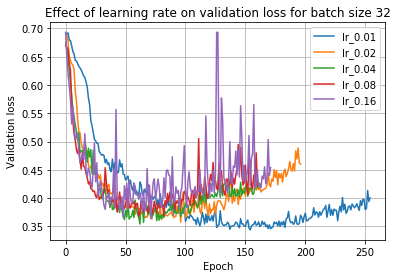

<Figure size 432x288 with 0 Axes>

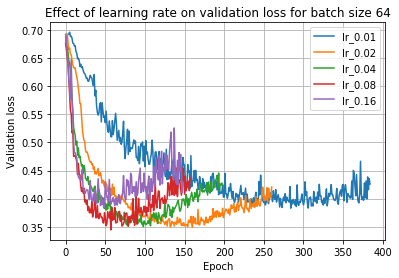

<Figure size 432x288 with 0 Axes>

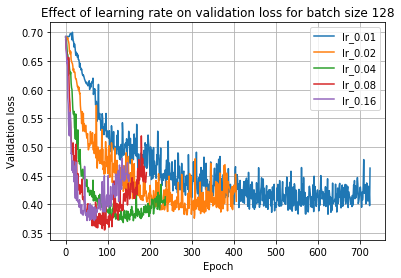

<Figure size 432x288 with 0 Axes>

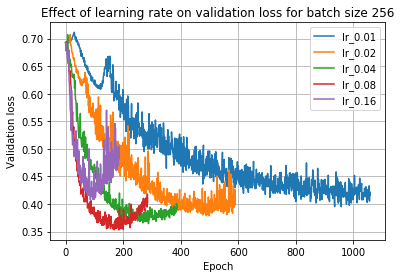

<Figure size 432x288 with 0 Axes>

In [16]:
# Visualize effect of learning rate for each batch size
for batch_size in batch_sizes:
    plt.figure()
    for learning_rate in learning_rates:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        plt.plot(history['val_loss'], label='lr_{}'.format(learning_rate))
        plt.xlabel('Epoch')
        plt.ylabel('Validation loss')
        plt.title('Effect of learning rate on validation loss for batch size {}'.format(batch_size))
        plt.grid(True)
        plt.legend(loc='best')
    plt.show()
    plt.savefig('graphs/batch_size_{}_lr_all'.format(batch_size))

We can see the effect of learning rate on different batch sizes above. Looking at the smallest batch size, 32, we see that the optimal learning rate is 0.01. On the other hand, for batch size 256, the optimal value is 0.08.

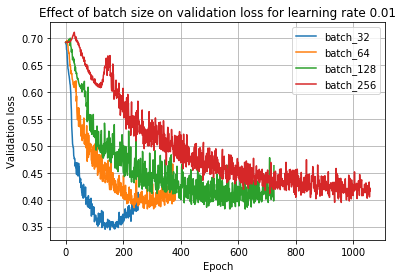

<Figure size 432x288 with 0 Axes>

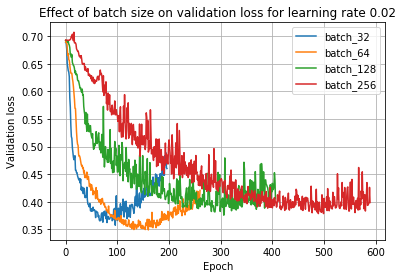

<Figure size 432x288 with 0 Axes>

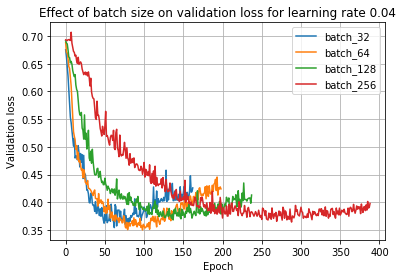

<Figure size 432x288 with 0 Axes>

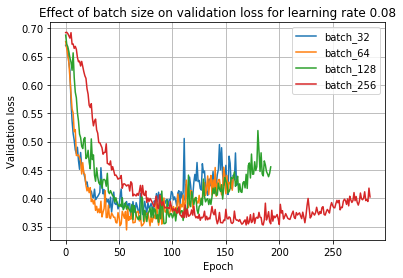

<Figure size 432x288 with 0 Axes>

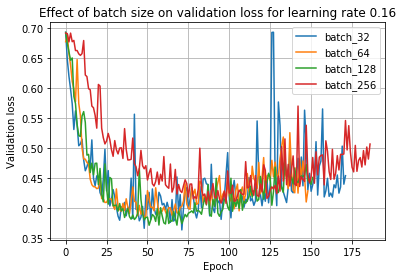

<Figure size 432x288 with 0 Axes>

In [35]:
# Visualize effect of batch size for each learning rate
for learning_rate in learning_rates:
    plt.figure()
    for batch_size in batch_sizes:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        plt.plot(history['val_loss'], label='batch_{}'.format(batch_size))
        plt.xlabel('Epoch')
        plt.ylabel('Validation loss')
        plt.title('Effect of batch size on validation loss for learning rate {}'.format(learning_rate))
        plt.grid(True)
        plt.legend(loc='best')
    plt.show()
    plt.savefig('graphs/batch_size_all_lr_{:.0f}_e-2'.format(learning_rate*100))

We can see a similar relationship when we invert the grouping (plot different batch sizes in one graph). For low learning rates such as 0.01, small batch sizes perform the best, whereas for higher learning rates, the larger batch sizes perform better.

The graphs below attempt to visualize this more succintly.

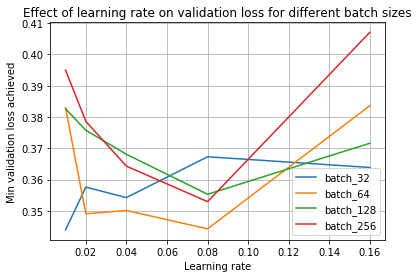

<Figure size 432x288 with 0 Axes>

In [50]:
# Visualize min val loss achieved by learning rate, for each batch size
plt.figure()
for batch_size in batch_sizes:
    min_val_losses = []
    for learning_rate in learning_rates:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        min_val_losses.append(np.min(history['val_loss']))
    plt.plot(learning_rates, min_val_losses, label='batch_{}'.format(batch_size))
    plt.xlabel('Learning rate')
    plt.ylabel('Min validation loss achieved')
    plt.title('Effect of learning rate on validation loss for different batch sizes')
    plt.grid(True)
    plt.legend(loc='best')
plt.show()
plt.savefig("graphs/min_val_loss_group_by_batch_size")

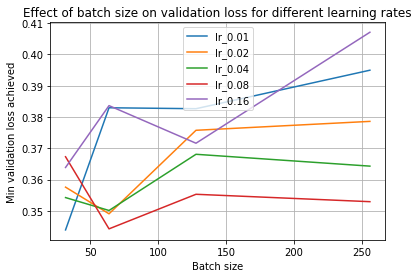

<Figure size 432x288 with 0 Axes>

In [51]:
# Visualize min val loss achieved by learning rate, for each batch size
plt.figure()
for learning_rate in learning_rates:
    min_val_losses = []
    for batch_size in batch_sizes:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        min_val_losses.append(np.min(history['val_loss']))
    plt.plot(batch_sizes, min_val_losses, label='lr_{}'.format(learning_rate))
    plt.xlabel('Batch size')
    plt.ylabel('Min validation loss achieved')
    plt.title('Effect of batch size on validation loss for different learning rates')
    plt.grid(True)
    plt.legend(loc='best')
plt.show()
plt.savefig("graphs/min_val_loss_group_by_learning_rate")

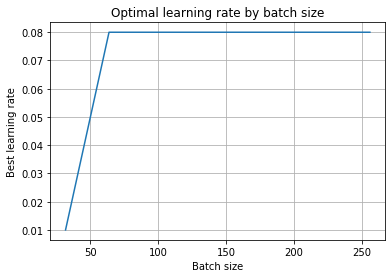

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure()
y_values = []
for batch_size in batch_sizes:
    min_val_losses = {}
    for learning_rate in learning_rates:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        min_val_losses[learning_rate] = np.min(history['val_loss'])
    best_learning_rate = min(min_val_losses.items(), key=lambda x: x[1])[0]
    y_values.append(best_learning_rate)

plt.plot(batch_sizes, y_values)
plt.xlabel('Batch size')
plt.ylabel('Best learning rate')
plt.title('Optimal learning rate by batch size')
plt.grid(True)
plt.show()
plt.savefig("graphs/optimal_lr_by_batch_size")

So, what does this all mean? Does batch size matter when I'm training a model? Let's look at the best validation loss we achieved on each batch size and see.

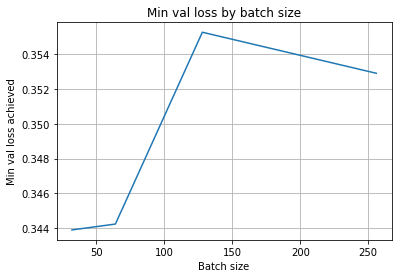

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure()
y_values = []
for batch_size in batch_sizes:
    min_val_losses = {}
    for learning_rate in learning_rates:
        history = model_state_by_batch_size_and_learning_rate_trial_4[batch_size][learning_rate].history
        min_val_losses[learning_rate] = np.min(history['val_loss'])
    min_val_loss_overall = min(min_val_losses.items(), key=lambda x: x[1])[1]
    y_values.append(min_val_loss_overall)

plt.plot(batch_sizes, y_values)
plt.xlabel('Batch size')
plt.ylabel('Min val loss achieved')
plt.title('Min val loss by batch size')
plt.grid(True)
plt.show()
plt.savefig("graphs/min_val_loss_by_batch_size")

Surprisingly, performance across different batch sizes is quite close! We do see that generally the larger the batch size the worse the performance, but the difference is not that large, compared to the difference observed with learning rate, for example. This suggests that as long as you find the right learning rate for your batch size, you should be fine; you can concentrate on other aspects of training. However, if you want to wring out every last drop of performance, you can do so by reducing the batch size.

**The tl;dr from the batch experiments so far is that batch size is closely linked to learning rate - the larger the batch size, the larger the optimal learning rate. The experiments suggest that as long as you find the optimal learning rate for a given batch size, the difference in performance between batch sizes is actually not that large.**

Some other questions to explore:
- How does Keras handle batch udpates? Does it average the gradients over a batch, or sum them?
- Why is the ratio of the batch-level update magnitude almost exactly the inverse of the batch size?

## Old runs

In [80]:
from sklearn.manifold import TSNE

weights_across_epochs = []
for epoch, weights in model_state_by_batch_size_trial_1[32].weights_by_epoch.items():
    weights_across_epochs.append(weights[-2].flatten())
tsne = TSNE(n_components=2, verbose=1)
transformed_weights = tsne.fit_transform(weights_across_epochs)

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.379154
[t-SNE] KL divergence after 1000 iterations: 0.501490


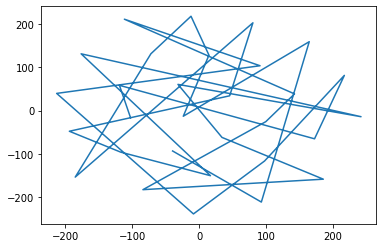

In [81]:
plt.plot(transformed_weights[:,0], transformed_weights[:,1])
plt.show()

In [3]:
batch_sizes = [32, 128, 512]
model_state_by_batch_size_trial_1 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model()
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = ModelCheckpoint(
        'pickled_objects/batch_size_{}_trial_1_weights.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_1[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1500,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/1500
    582/Unknown - 27s 46ms/step - loss: 0.6860 - accuracy: 0.5435
Saving weights for epoch 0
582/582 [==============================] - 33s 57ms/step - loss: 0.6860 - accuracy: 0.5435 - val_loss: 0.6627 - val_accuracy: 0.6279
Epoch 2/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6911 - accuracy: 0.5155 - val_loss: 0.6928 - val_accuracy: 0.5099
Epoch 3/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6900 - accuracy: 0.5264 - val_loss: 0.6677 - val_accuracy: 0.6131
Epoch 4/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6494 - accuracy: 0.6271 - val_loss: 0.6357 - val_ac

Epoch 47/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3523 - accuracy: 0.8424 - val_loss: 0.3995 - val_accuracy: 0.8164
Epoch 48/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3422 - accuracy: 0.8476 - val_loss: 0.3691 - val_accuracy: 0.8261
Epoch 49/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3462 - accuracy: 0.8440 - val_loss: 0.3781 - val_accuracy: 0.8214
Epoch 50/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3397 - accuracy: 0.8486 - val_loss: 0.3985 - val_accuracy: 0.8126
Epoch 51/1500
580/582 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8477
Saving weights for epoch 50
582/582 [==============================] - 12s 21ms/step - loss: 0.3431 - accuracy: 0.8475 - val_loss: 0.3889 - val_accuracy: 0.8222
Epoch 52/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.3731 - val_accuracy: 0.8265
Epoch

Epoch 96/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2509 - accuracy: 0.8962
Saving weights for epoch 95
582/582 [==============================] - 12s 21ms/step - loss: 0.2512 - accuracy: 0.8961 - val_loss: 0.4149 - val_accuracy: 0.8138
Epoch 97/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2482 - accuracy: 0.8976 - val_loss: 0.4469 - val_accuracy: 0.8042
Epoch 98/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2530 - accuracy: 0.8927 - val_loss: 0.4063 - val_accuracy: 0.8188
Epoch 99/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2378 - accuracy: 0.9014 - val_loss: 0.3968 - val_accuracy: 0.8248
Epoch 100/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2451 - accuracy: 0.8955 - val_loss: 0.3981 - val_accuracy: 0.8285
Epoch 101/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.9038
Saving weights for epoch 100
582/582 [=============

Epoch 144/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2150 - accuracy: 0.9119 - val_loss: 0.4260 - val_accuracy: 0.8020
Epoch 145/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2101 - accuracy: 0.9164 - val_loss: 0.4286 - val_accuracy: 0.8164
Epoch 146/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9159
Saving weights for epoch 145
582/582 [==============================] - 12s 21ms/step - loss: 0.2113 - accuracy: 0.9160 - val_loss: 0.4109 - val_accuracy: 0.8153
Epoch 147/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2081 - accuracy: 0.9143 - val_loss: 0.4378 - val_accuracy: 0.8227
Epoch 148/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2049 - accuracy: 0.9173 - val_loss: 0.4219 - val_accuracy: 0.8237
Epoch 00148: early stopping
Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::

Epoch 42/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3898 - accuracy: 0.8211 - val_loss: 0.4042 - val_accuracy: 0.8055
Epoch 43/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3886 - accuracy: 0.8207 - val_loss: 0.4051 - val_accuracy: 0.8087
Epoch 44/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3861 - accuracy: 0.8230 - val_loss: 0.4191 - val_accuracy: 0.8040
Epoch 45/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3816 - accuracy: 0.8245 - val_loss: 0.3921 - val_accuracy: 0.8143
Epoch 46/1500
144/146 [============================>.] - ETA: 0s - loss: 0.3755 - accuracy: 0.8304 ETA: 
Saving weights for epoch 45
146/146 [==============================] - 8s 56ms/step - loss: 0.3757 - accuracy: 0.8302 - val_loss: 0.4069 - val_accuracy: 0.8048
Epoch 47/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3818 - accuracy: 0.8263 - val_loss: 0.3898 - val_accuracy: 0.8199
Epoch

145/146 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8829
Saving weights for epoch 90
146/146 [==============================] - 8s 56ms/step - loss: 0.2701 - accuracy: 0.8831 - val_loss: 0.3762 - val_accuracy: 0.8285
Epoch 92/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2599 - accuracy: 0.8898 - val_loss: 0.4021 - val_accuracy: 0.8218
Epoch 93/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2639 - accuracy: 0.8849 - val_loss: 0.3738 - val_accuracy: 0.8293
Epoch 94/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2650 - accuracy: 0.8852 - val_loss: 0.3639 - val_accuracy: 0.8336
Epoch 95/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2557 - accuracy: 0.8912 - val_loss: 0.3869 - val_accuracy: 0.8343
Epoch 96/1500
144/146 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.8899 ETA: 0s - loss: 0
Saving weights for epoch 95
146/146 [=================

Epoch 139/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1809 - accuracy: 0.9231 - val_loss: 0.4211 - val_accuracy: 0.8216
Epoch 140/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1848 - accuracy: 0.9234 - val_loss: 0.4026 - val_accuracy: 0.8308
Epoch 141/1500
144/146 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.9295
Saving weights for epoch 140
146/146 [==============================] - 8s 57ms/step - loss: 0.1753 - accuracy: 0.9294 - val_loss: 0.4578 - val_accuracy: 0.8102
Epoch 142/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1830 - accuracy: 0.9250 - val_loss: 0.4445 - val_accuracy: 0.8203
Epoch 143/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1721 - accuracy: 0.9300 - val_loss: 0.4417 - val_accuracy: 0.8239
Epoch 144/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1731 - accuracy: 0.9281 - val_loss: 0.4341 - val_accuracy: 0.8222
Epoc

Epoch 187/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1314 - accuracy: 0.9490 - val_loss: 0.4667 - val_accuracy: 0.8201
Epoch 188/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1328 - accuracy: 0.9478 - val_loss: 0.4988 - val_accuracy: 0.8083
Epoch 189/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1388 - accuracy: 0.9454 - val_loss: 0.4462 - val_accuracy: 0.8282
Epoch 190/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1318 - accuracy: 0.9462 - val_loss: 0.4596 - val_accuracy: 0.8278
Epoch 191/1500
145/146 [============================>.] - ETA: 0s - loss: 0.1262 - accuracy: 0.9498
Saving weights for epoch 190
146/146 [==============================] - 8s 57ms/step - loss: 0.1259 - accuracy: 0.9499 - val_loss: 0.4933 - val_accuracy: 0.8033
Epoch 192/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1344 - accuracy: 0.9492 - val_loss: 0.4917 - val_accuracy: 0.8209
Epoc

Epoch 89/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4542 - accuracy: 0.7836 - val_loss: 0.4479 - val_accuracy: 0.7861
Epoch 90/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4520 - accuracy: 0.7855 - val_loss: 0.4451 - val_accuracy: 0.7853
Epoch 91/1500
36/37 [============================>.] - ETA: 0s - loss: 0.4475 - accuracy: 0.7874
Saving weights for epoch 90
37/37 [==============================] - 7s 196ms/step - loss: 0.4478 - accuracy: 0.7874 - val_loss: 0.5100 - val_accuracy: 0.7438
Epoch 92/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4510 - accuracy: 0.7858 - val_loss: 0.4266 - val_accuracy: 0.8003
Epoch 93/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4545 - accuracy: 0.7818 - val_loss: 0.4413 - val_accuracy: 0.7900
Epoch 94/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4429 - accuracy: 0.7887 - val_loss: 0.4343 - val_accuracy: 0.7928
Epoch 95/1500
37/37

36/37 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8442
Saving weights for epoch 185
37/37 [==============================] - 7s 197ms/step - loss: 0.3424 - accuracy: 0.8451 - val_loss: 0.3608 - val_accuracy: 0.8356
Epoch 187/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3400 - accuracy: 0.8444 - val_loss: 0.3568 - val_accuracy: 0.8347
Epoch 188/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3398 - accuracy: 0.8474 - val_loss: 0.3724 - val_accuracy: 0.8272
Epoch 189/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3468 - accuracy: 0.8433 - val_loss: 0.3686 - val_accuracy: 0.8280
Epoch 190/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.3404 - accuracy: 0.8452 - val_loss: 0.3770 - val_accuracy: 0.8252
Epoch 191/1500
36/37 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8474
Saving weights for epoch 190
37/37 [==============================] - 7s 19

37/37 [==============================] - 7s 198ms/step - loss: 0.2675 - accuracy: 0.8824 - val_loss: 0.3805 - val_accuracy: 0.8209
Epoch 283/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.2583 - accuracy: 0.8864 - val_loss: 0.3672 - val_accuracy: 0.8285
Epoch 284/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.2533 - accuracy: 0.8868 - val_loss: 0.3456 - val_accuracy: 0.8457
Epoch 285/1500
37/37 [==============================] - 7s 198ms/step - loss: 0.2540 - accuracy: 0.8908 - val_loss: 0.3546 - val_accuracy: 0.8392
Epoch 286/1500
36/37 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.8886
Saving weights for epoch 285
37/37 [==============================] - 7s 197ms/step - loss: 0.2556 - accuracy: 0.8889 - val_loss: 0.3566 - val_accuracy: 0.8338
Epoch 287/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.2496 - accuracy: 0.8940 - val_loss: 0.3552 - val_accuracy: 0.8392
Epoch 288/1500
37/37 [=====

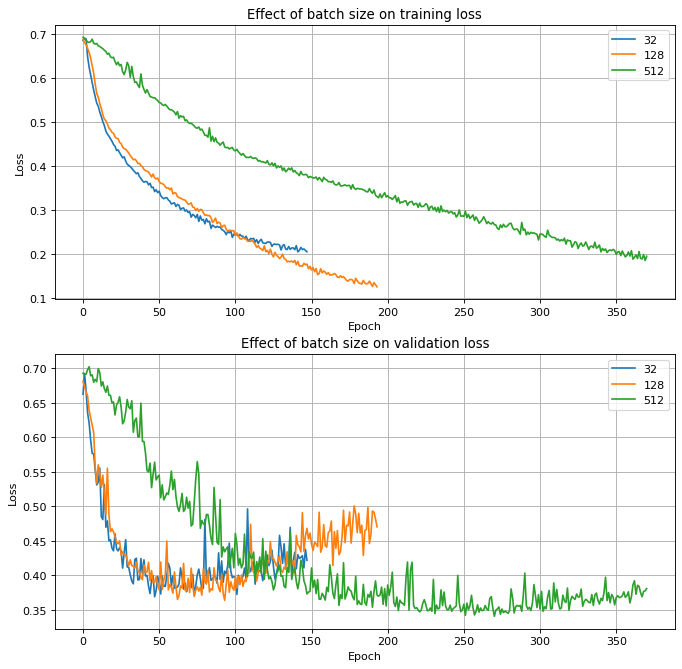

<Figure size 432x288 with 0 Axes>

In [4]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_loss_trial_1')

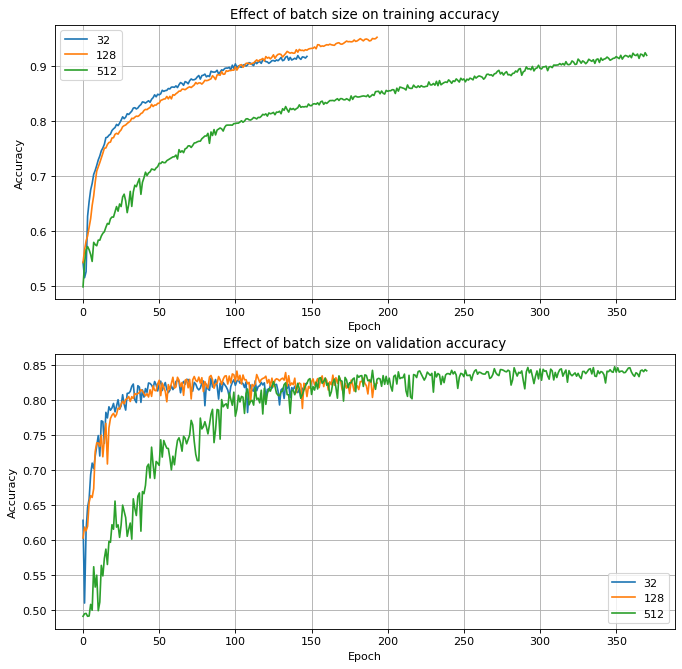

<Figure size 432x288 with 0 Axes>

In [6]:
ml_utils.plot_accuracies_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_accuracy_trial_1')

In [8]:
ml_utils.save_model_state(model_state_by_batch_size_trial_1, 'model_state_by_batch_size_trial_1')

Surprisingly, batch sizes 32 and 128 performed worse than 512. Could this be because the learning rate is too high? Let's try a lower learning rate of 0.01.

In [10]:
batch_sizes = [32, 128, 512]
model_state_by_batch_size_trial_2 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.01))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    model_state_by_batch_size_trial_2[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10000,
        extra_callbacks=[es],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10000
    582/Unknown - 25s 43ms/step - loss: 0.6926 - accuracy: 0.5135
Saving weights for epoch 0
582/582 [==============================] - 31s 54ms/step - loss: 0.6926 - accuracy: 0.5135 - val_loss: 0.6919 - val_accuracy: 0.4963
Epoch 2/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6869 - accuracy: 0.5651 - val_loss: 0.6902 - val_accuracy: 0.5045
Epoch 3/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6785 - accuracy: 0.5801 - val_loss: 0.6920 - val_accuracy: 0.5103
Epoch 4/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6716 - accuracy: 0.5861 - val_loss: 0.6793 - va

KeyboardInterrupt: 

Since batch size 8 performed poorly, the learning rate may be too high for small batch sizes. On the other hand, 32 and 128 didn't converge, so we may need to up the number of epochs. So, let's try a lower learning rate and more epochs.

In [10]:
batch_sizes = [8, 32, 128, 512, 2048]
model_state_by_type_trial_2 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.05))
    model_state_by_type_trial_2[batch_size] = ml_utils.train_model(model, train, validation, epochs=100)

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/100
2327/2327 [==============================] - 55s 24ms/step - loss: 0.6840 - accuracy: 0.5558 - val_loss: 0.6565 - val_accuracy: 0.6187
Epoch 2/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.6485 - accuracy: 0.6257 - val_loss: 0.6115 - val_accuracy: 0.6829
Epoch 3/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6004 - accuracy: 0.6779 - val_loss: 0.5513 - val_accuracy: 0.7291
Epoch 4/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.5560 - accuracy: 0.7195 - val_loss: 0.5134 - val_accuracy: 0.7517
Epoch 5/100
2327/2327 [==============================] - 27s 12ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2327/2327 [==============================] - 27s 12ms/step - loss: 0.4089 - accuracy: 0.8139 - val_loss: 0.4056 - val_accuracy: 0.8123
Epoch 78/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4135 - accuracy: 0.8120 - val_loss: 0.4086 - val_accuracy: 0.8113
Epoch 79/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4138 - accuracy: 0.8142 - val_loss: 0.4367 - val_accuracy: 0.7904
Epoch 80/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4150 - accuracy: 0.8098 - val_loss: 0.4156 - val_accuracy: 0.8087
Epoch 81/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4067 - accuracy: 0.8132 - val_loss: 0.3997 - val_accuracy: 0.8199
Epoch 82/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.4170 - accuracy: 0.8093 - val_loss: 0.4154 - val_accuracy: 0.8091
Epoch 83/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4151 - accuracy: 0.8108 - val_loss: 0.4222 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2327/2327 [==============================] - 27s 12ms/step - loss: 0.4341 - accuracy: 0.8047 - val_loss: 0.4436 - val_accuracy: 0.7954
Epoch 90/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4243 - accuracy: 0.8070 - val_loss: 0.4081 - val_accuracy: 0.8113
Epoch 91/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4140 - accuracy: 0.8110 - val_loss: 0.4288 - val_accuracy: 0.8076
Epoch 92/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4260 - accuracy: 0.8085 - val_loss: 0.4102 - val_accuracy: 0.8205
Epoch 93/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4138 - accuracy: 0.8118 - val_loss: 0.4240 - val_accuracy: 0.8134
Epoch 94/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4352 - accuracy: 0.7985 - val_loss: 0.4065 - val_accuracy: 0.8147
Epoch 95/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.4286 - accuracy: 0.8045 - val_loss: 0.4016 

Epoch 43/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3329 - accuracy: 0.8528 - val_loss: 0.3802 - val_accuracy: 0.8282
Epoch 44/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3314 - accuracy: 0.8499 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 45/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3312 - accuracy: 0.8523 - val_loss: 0.3679 - val_accuracy: 0.8272
Epoch 46/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3298 - accuracy: 0.8523 - val_loss: 0.3598 - val_accuracy: 0.8313
Epoch 47/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3248 - accuracy: 0.8544 - val_loss: 0.3730 - val_accuracy: 0.8319
Epoch 48/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3236 - accuracy: 0.8559 - val_loss: 0.3497 - val_accuracy: 0.8424
Epoch 49/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3210 - accuracy: 0.8556 - val_loss: 0.3747 -

146/146 [==============================] - 8s 57ms/step - loss: 0.4229 - accuracy: 0.8023 - val_loss: 0.4406 - val_accuracy: 0.7945
Epoch 54/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4198 - accuracy: 0.8051 - val_loss: 0.4195 - val_accuracy: 0.8067
Epoch 55/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4168 - accuracy: 0.8069 - val_loss: 0.4276 - val_accuracy: 0.8029
Epoch 56/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4193 - accuracy: 0.8045 - val_loss: 0.4210 - val_accuracy: 0.8031
Epoch 57/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4179 - accuracy: 0.8069 - val_loss: 0.4249 - val_accuracy: 0.8016
Epoch 58/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4152 - accuracy: 0.8072 - val_loss: 0.4118 - val_accuracy: 0.8119
Epoch 59/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4114 - accuracy: 0.8071 - val_loss: 0.4280 - val_accuracy: 0.799

Epoch 64/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5743 - accuracy: 0.6960 - val_loss: 0.5574 - val_accuracy: 0.6971
Epoch 65/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5672 - accuracy: 0.7048 - val_loss: 0.5594 - val_accuracy: 0.7008
Epoch 66/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5602 - accuracy: 0.7085 - val_loss: 0.5525 - val_accuracy: 0.7038
Epoch 67/100
37/37 [==============================] - 7s 202ms/step - loss: 0.5565 - accuracy: 0.7088 - val_loss: 0.5733 - val_accuracy: 0.6866
Epoch 68/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5588 - accuracy: 0.7088 - val_loss: 0.5341 - val_accuracy: 0.7264
Epoch 69/100
37/37 [==============================] - 7s 202ms/step - loss: 0.5549 - accuracy: 0.7135 - val_loss: 0.5684 - val_accuracy: 0.6926
Epoch 70/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5509 - accuracy: 0.7167 - val_loss: 0.5791 - val_accuracy:

KeyboardInterrupt: 

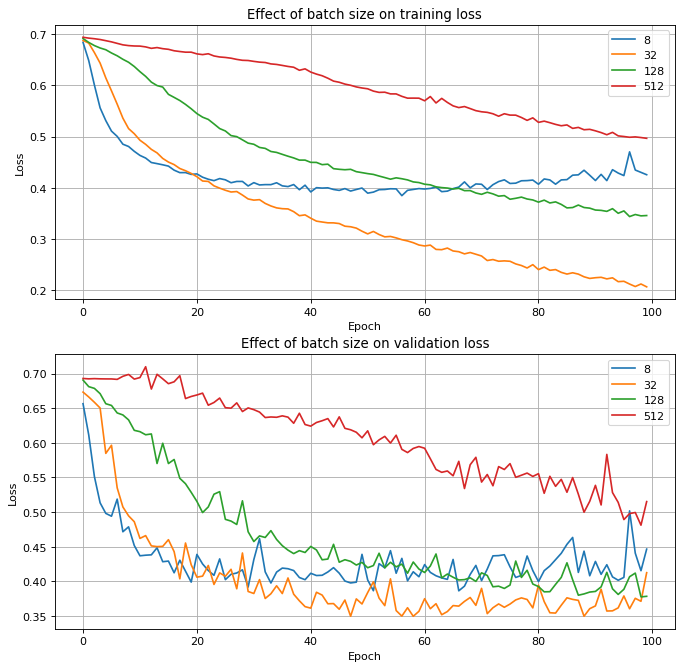

<Figure size 432x288 with 0 Axes>

In [11]:
ml_utils.plot_loss_by_param(model_state_by_type, 'batch size', 'batch_size_loss_2nd_try')

In [13]:
ml_utils.save_model_state(model_state_by_type, 'model_state_by_batch_size_2nd_try')

It looks like it may take many more iterations for larger batch sizes to converge. Let's try early stopping so we don't have to manually specify the number of iterations to run.

In [3]:
batch_sizes = [8, 32, 128, 512]
model_state_by_type_trial_3 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.01))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    model_state_by_type_trial_3[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=20000,
        extra_callbacks=[es]
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/20000
2327/2327 [==============================] - 57s 25ms/step - loss: 0.6873 - accuracy: 0.5503 - val_loss: 0.6778 - val_accuracy: 0.5929
Epoch 2/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6740 - accuracy: 0.5848 - val_loss: 0.6626 - val_accuracy: 0.6193
Epoch 3/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6580 - accuracy: 0.6114 - val_loss: 0.6377 - val_accuracy: 0.6599
Epoch 4/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6353 - accuracy: 0.6403 - val_loss: 0.6135 - val_accuracy: 0.6750
Epoch 5/20000
2327/2327 [==============================] - 27s 12m

2327/2327 [==============================] - 27s 11ms/step - loss: 0.4727 - accuracy: 0.7692


KeyboardInterrupt: 

In [45]:
for batch_size, model_state in model_state_by_type.items():
    print("Batch size {}".format(batch_size))
    for i in range(4):
        print("\tEpoch {}".format(i))
        flattened_weights = np.array([])
        curr_weights = model_state.weights_by_epoch[i]
        for j in range(len(curr_weights)):
            flattened_weights = np.concatenate((flattened_weights, curr_weights[j].flatten()))
        print("\tNorm: ", np.linalg.norm(flattened_weights))

Epoch 0
Norm:  27.4336502727029
Epoch 1
Norm:  27.449913808055737
Epoch 2
Norm:  27.466143766527928
Epoch 3
Norm:  27.4870729318222
